
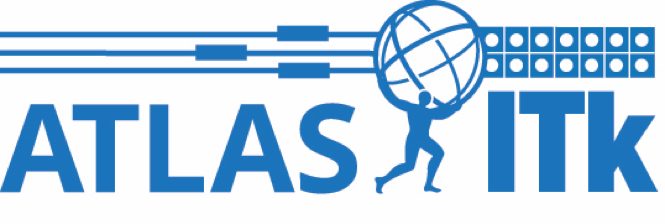

In [25]:
from IPython import display
from rich.pretty import pprint
import itkdb
import os
from rich.progress import track
from rich.console import Console

display.HTML('''<center><img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApkAAADgCAYAAABIHX1yAAAAAXNSR0IArs4c6QAAAAlwSFlzAAAXEgAAFxIBZ5/SUgAAQABJREFUeAHsvQl8H8d15/lIgrhvAiQB3vctitQtyodk2bJ8yZYdx3HizbUTZ7LJHJtJMrOZTbLZzeSTTXYnyewms5krxziJj9iyFdmSLMm6JUoUSZGUxPsEcRAkAAIgAN77+77q+qPxJwACFCmBUj/yj+6uruPVq+quX7969WrShQsXLlpGmQQyCWQSyCSQSWAsEtCQcWHSJJs8afTIjCwxThxl4nVMefHiRTt77qIdaeuzA829tqe5x9pOnraO3jPWffqc7ezst+az5+zCBeWlRKQ/o3yn6DwWzwA2RRfndXLztBKrLSywqQVTbPWsSpteXWTzppfZgsYym15bHIsd8TgcnyOFSQQ5HkbMMLuRSeB9LoFJGch8n/eArPqZBDIJZBK4Agmgn3CgxZ/RSPEApdD5cxesrWPAdhw8aW8c6bbdx09ZU88ZaxsASF6wc+fNzl68YGeFGCcJNJ5TGCBSwf4jjykKuKDshE8d5BUoTBjUgWaBUGiBQgGjk6cIik6+aMUFk61QKLRk6mS7ta7c1s6tslXzqqyhrsTqBEINFJmHfocEcQHlxQmB2d9MApkERpNABjJHk052L5NAJoFMApkEhkrA0d0kgbwAviYBIHV6UQf9v4ROSyN5sLXPTghM7heo3COQ2XxiwFq7+u2YNJYnz5y3vvOCiaRXPgBGciYvziOIjGGU4xGSOF6m/wnpFexEPNLEuADQBWWFNrO21GZJq9lYWWhza4ptZkWxLZlV7oBzcgIkkyomGXkuyjwUEvkIN7O/mQQyCYwmgQxkjiad7F4mgUwCmQQyCQyVgM9dM3mdokRbGZV956SJ7O0/Z50Clgc6+mzL3i47crzPth+V9lLAMsGEuQz8GlCY4Lnk4CAzlhTToMUEjEIxDPyHtrNA4dwCnOZ4ScIU5NPsxGO6vVqazdkCnctmVNgtS2ts1awKm15VbKVFU6y6fCrRh6UhWs5hY2SBmQQyCUQJZCAzSiI7ZhLIJJBJIJPAiBJAcwkIRNvHVHnU+qUTnBe4BGB2CFxu2dtpP9rWZg8f7LRTZy84IAT46bbbVwIGIYAiIPGMjoX6UQYg8bzCuCZ+mrC/nOT/QrqpSgxwjGCU6PzOJdPcpGfSHc2mZs+HkIK8/HM6WVdZbPesqLflsyvswzfUW8GUyTZVDE+CaSKKHGC6EJKAEJz9zSSQSWAECWQgcwTBZMGZBDIJZBLIJHCpBIbT5CV4zjbv7LCXd52wJ3e126YT/TnbyakpkJbOEWDoWkiBP8DjWa51TnSu4yKfyQKJhJ1VZIDiB+rLZGM5xcqLCmyRzv0mGQEA9f+spt93NHdbW89p2y+NKtPxpAdMkp5ydfCfDn7NPew9ywQuV0qj+aEl0+xLH55jtVVFViC7zuHqTdqMMglkEhhZAhnIHFk22Z1MApkEMglkEhhBAnHhT2//eduxr8u+80qTPd/aa70D5+20VvAMSIWIRjKfsLE8k+BBgF/UQBJ+LhV5imDhvNIptqq+whplQ7lgRpktadR5fYkv5sEWFCUjGkcnocCLAE0yFdg8K+0pwLFFYPegVq83tffZzqZu29iiFezJinWiQuQAr0zFT1YGhQoo0wr12RWF9rk1M2zNnEq7fXUdUTPKJJBJYBwSyEDmOISVRc0kkEkgk0AmgSCBk7KtPNzeb9sOn7SNB7tt26EuO9R3xs4nas3cQiBUhqJSgbY5Am3ntMK8tf+s9QqE8g+A5zPQOlZLOzmtdKrVlRfakgaBSrkfaiwvsqqyqTatosjqtVinqgJ7SaHBiBBJTwiZADITYnqfafUelYVtaFfvWWvrHLCD0m4ePNHni48Oy060ufe09cJz+O+pyQUAWzx5sq1tqLAFco1056JqW7+gxmZNL83Ze8aysmMmgUwCw0sgA5nDyyULzSSQSSCTQCaBYSQAljvWNWDbD3Xbpn2d9uyeE7a9o99jRoinKG4DWSLQV1dSaEVSDTINPbNwip3QavNDAnodApvnlRlT6dVTp1qNFtusmV5ic6pKbd60UrtlcbXNbSwfHtDlzV3nXTovHqb8cZ8UFZzMeXPd1KZV7kd7basA8hvHTtk+1ed492m3HT3vkDWATOw5AZvwvkLuju5f12h3r6yzBmlWS7RAaDi71GFElgVlEnjfSiADme/bps8qnkkgk0AmgbFLAHDJD83gt55psr957ai19aGRDJPicaEOcZjKLpLmckbxFLtv8TSbKYB24tRZ+8cdrXagL0yKY3PJVHeZtJf3aBr8vrUz7MPrZ1iRrtFCOoAbDj3msTxalHjPeVc6ACNEOKdoXTu7z9gL24/ZP2xpsZ1yr9Qr8Dug3zklgkfiQqQFdP6UFgd9/o5ZtnROhZWXTM2AZhBP9jeTwLASyEDmsGLJAjMJZBLIJJBJAAnEleT9cpjeIv+W/9vX37BnpP0DcUbwBmBj0U6hTghbKF+U/+zOObZucY39l8f32yP7O619gBiDxO48H1lWb7cvm2Y3r6jN3QDTkUcEhLkb1/AkgtEd+07arqYe+4dXm+w56jgCzSspsM/d2GCfXDfTls+vHCFWFpxJIJNABjKzPpBJIJNAJoFMAi4BB1sgPAiUl6CvnZoaf2Rrqz3x5nHbpWnlc8lq7WgXeVZJAJhxNXi5NJRz5IOyUL4o9yt+v+JfUL64A1oj5+dfuWuu3bykxuq1cruIHXlYaRPp3UCZSdksFmK3IabOf7Cp1b69+agd7NXqdPkGdX2t6lgo/i6wMEga1wbZif7KHXPsk9JsTi3QzYwyCWQSGCKBDGQOEUd2kUkgk0AmgfefBHLgchj14fPb2u0vN7XY61qZ3XHqjIBkcCfESuzEfDG3QhzbR8AYC25YLQ50HFAk3AbVaWr5vsW19lMfmmsN1SVWWVZgwpchj2HK1Z2IcTm9dhTVmJTAOQf9TmgafW9Lrz37Vru9pVXzT2krTO5Sbfxycj5V8+lLVJcHV2oK/c5ZVqOFTYWyO435vKPqWPGTUSaBiSYB3gMZZRLIJJBJIJNAJoEhEsCp+hG5/dl4oMu2y+dky6nTOR+WRMQJepWAIyvBa7VoZ0DbQ+7VFHOf7BnPCoj6ohnFi9s7AsrAktVKUyZbzSkOLAOoI7+JRNiD1suOtFia2NPys1lRNFUr4s/ZEZkL9Mg9U+Qah+/7O/vt5QOdtkxO3JdoodIs7Yk+BbSdUSaBTAI25bd/+7d/J5NDJoFMApkEMgm8fyWA+x9fhc1RujqmjI/Kvc8ff3eP/d2ONjspe0zIt27UcTIaPDks/+iSWvsnsr38pXvn2+q6MtuoXX5OnT7v2k62bixPFvGQ7pTA5wG5EDrfc9ZmCMCxOnuqVJm+o47uRwLAiY2wIvwaYDWUle7uiAIBg2lAmHc9VfzPayi3lXOqbLWcvnfI52aLZIGdqifXH04Panp9z+FuV2/OrimxcrlhIobv6+4xsz+ZBN6fEsimy9+f7Z7VOpNAJoFMAjkJAJTSM9YHWk4JYO62b+/v8DhMjQMamd0uEBBbI1vK3/r8SlsgX5YAxTflJ/P//O4u29LVb6cTAMbK8S9rZflzR05as1akM83OCnQA5Er5vfzljy6yO5fV2vSaYge4lE9SHRz35fPkjFylP+lyRsoyVz4nonM69Mo36J8KeD8s100t/Wd8Wh25AKI5zpaW9iOLauxffXap9j/Xpphpoep+RpkE3m8SyEDm+63Fs/pmEsgkkElgGAm4dk4A8ms/PGAv7++yRw52ycXPBXfjAzDETpEp7g1ykP67P77S5s4st86TZ+xFbSP5fz2+1w5rOpk8yqTlXDOj3P7ph+bbnavqrKN7wL73crNtPtJtP9C0spPKKdJU9D3zq+0TS+vtM3c15lwBAekoL4LOa4LTUigzByZVboInZUMKF6K8wgk+LU3tj14/Zn8vl0dPadU8hKsjNw/QsVY2mbdKNn/wlTVWLqCZs0nLy8sTZn8yCbzHJZBNl7/HGzirXiaBTAKZBC4nAQdaAkFff/qQ/f22NtvWfspOnw22h77IxdWLpt14Cu03P7HElmmbxWNywP7o6232d5uabU/XaQHDizaruMDuXVpnX7p9jt2iHXLKSgusRJrOudoSctXcKltYXWzHNQ3fIftN9hdvP3XOdsrus+/kgC0QeC3RXuTpGWvOrwVhEsDyJaBkxH4RbHqZkQkCU0xwyj7m9apHbfFUq5Iv0G1aFAQhJ+5rgbp1aGvNtmN9tnJWhZVJu4l5QUaZBN6PEshA5vux1bM6ZxLIJJBJICUBFrA8vVXaOQHGNwUCewQCIaARGkzAU71A1UrZXf7ch+fZqTPn7Jsbm+1H7PbT1mPnNJ/OVPGP38yOOPV244Jqq9ZKazKYrK0ZsVGslVZvhlz+VBYW2Elt89gtjWC38umU/8xO7QA0SQU1yFZzqqbZAXLXlMQXdeIH0vQj1+lCUVt6pHRgOC+WttIXPclN077mXmuXU3rkRAYc2be9Q3UsVAB1In5uj/WQRfY3k8D7QgI5Tf77orZZJTMJZBLIJJBJYIgEmOLu1m48332l2V6TVm4g8YEJWEIBh/shgFiDQORqbfdYVDTZtu/usoc1ZXxY+34PCGBWyEfkDdJEfvaWBm25WKI4WCgmlCA3bDfnSKP5gOwxO7VQhp2CDmsqnd113tBOO5Nebba59aW2fJbZTG3bSPxrRWkwST25Tod5udR7FBZ89bnA490C1Aelie0SYI6z7GclsGaB54e3tNpSLRwCODdo1XlGmQTebxLINJnvtxbP6ptJ4B2WQN6M4ztc+rUp7r1SJwBmm1Z8f0c2k38hG8PTQkmTAFcJxVOmlNfPrrQNAlQdck7+vzy00w4JYLL3+DRpJu/UtPAffGW1TdcuPqOBQxSDxQKgt6+oswWVxTZJQLMLraam5lu1p/nzsu88pdXb7Hc+XRpA58XVjJGj5JhugPT5KNHybuUuh2RPXlTaNZiXwM5cmniCXelaLfRpP3rKDpzsl5N67YKkm2BTdMHHBDyPadoc21Wcz/usOXmny1G8Uaqgu5ehK0kMk1FTe5nsL3f7SopP5zlaeliMzRHSXPDri/KL5R4ChjReOtcxnieFY+rBD28AHnSVZDNGLgajXVCvmTTKl81gTJ3p84gvJOjtyiHkck3+ZiDzmog1yzSTwPtXAvmDRhwM8sOvNwnBP8T7PNYphFwHf9PMp9h962CPPbuzw/7g6YO+Knyq7vkKcNWRc8aw6HR95fRymyfH4//9+UO2+6R2/ZE8GrW94r0La+xff2651clOcfI4BrvGulJb0VBhK6TdfHFvh2wZL1qfQNohTddvP3TSbhSorZWbJLJE9Llxn7pEQ0qFXzLAEtET6FaMl4S5LabOARND8qSeytfjX64OlJ+KwzT4yrnl9qO3OqxXJgD4CHW29IezloEz1ion9iXaDukGbbOZLidmlcrO0475T74sSBgzzc8kHS6Zeh3SYfnxh7sWCEKGpCWLWDx1UmAilqgbHi6DoWGeHnkNI4DImjdhvKCMpBz4eFvPoRdOLSge3uO5B3j4O/rH+RkrwISz0A5+jDLMySlwnnd57aqTKohTZy0pLQOZ107sWc6ZBN6XEvB3THhfe/3DIouhuOB6EAzvbeoS68OA5uOQ/rztAe6dFgCMJ4NoLPqU7Aj/kxb6PK4dbZrlmicOb9Q3EgATOaCBm6LR47jA5avSzDHVzSKfT66Zbj+xYa5Pc09xNV1MOYaj+MFX5nSB01VajX3waLc0f+d9uh57zSNy7F6rhUAz5HeyQEgj4sVYD4BNGFtTnY1iY11T9VXLySl8yINzj5JEdU6VFwBzxDw9kv4wguYYESDXdasctLd3nLGBvjPuC7RFcoUjwPpU/SQq6ztzwdrkH3SJ6orLpiirFIuxhPEdh8nA+2aeSMh02PBh0o/KgOI7GJPgkT1O66EA0mLKYQqPt/KOXnzkgQz1nx+8knUuJ+Ig+xg3RBv8iMjLd7TLWEzuA2S0yO/kvVTdxlosIoFydcnLI+8yRL5Kf4c0R6ogf0/ScknjZTaZV0ngWTaZBDIJDC+B+P7h5R7Ph485wUKT9yTTaDmkmbDoerDrpTIjCP5H247ZK4e6bF9HX07w6KCmJ/aU7QJ6WFbihp2xrEnT2h0CUKe0402ptHcf1wKfD62ot8WzynMLdSgKGotoiMN0c2FBod2mqeQT3XNs4KUjKues9Wj6fKNcHk159agVyCH6opmlvqI7nW/UPIUSL/cXaKl6MM2qk0v4VGCcLk3nRLxjMifoVr1PCGCf0qpxFj0dlY/MfmldAaUntUIewH6sS3aZmvKPYB3ZIU/ojJDm3s4++5a255ytukyXhhaAlq5PiHnlfy+pU15Wsd5vr8wovBTvFPz2MnVOQwuFrC7Jbpgyrrg+qgJ9ARom23DjOvmbk9MIjX8t6xfkHx54nsVYln/EpeSXgcyUMLLTTAKZBN6eBHjlnNVCjgDKUnnpBl++PgDHN3zq9kQ85SXKL2x/KA4jetCp2wqmrici/zmeaJQ8mffKp+Vjr7dbk4DTQERCisZe3IsqS9R8F+3Y8VM2RWnRyNF2XQJ+nWfNSgSO5mil+MekxVwqW8xCAcVIwxQVb11yjCwhY1aff3L9TNuu/cHtQrft6Zatpsp7VDaai2pKBcjqfF/wtL0n6cZKHlXMoZmFW6o8JLkuLioQt0rYVZ4TkD6jI0CSnXxatTBpT3OPdUrje0Lba76ua/hLU5QC+SIHQKZmyP1I2IDiP77ruD14W4NVaVU6K86H8KA4b4coE4p8hKvBv5R1Sb0Hb4/9TAW57CPzFBzPx57LsDHZgpS8L8mOMvIqRpwrqU8676vI+rD1udaBXhcqwQ9KV06X17J+Lv+kXNoslkUbwgcHKHPGHuSQ/c0kkEngKkjgjJwEbtvbZZ2aOkRrFF88IeuhV1ehuGuYxUUrkQYNMHDD4qprWM41ztqRfXjdI335Vnf/l3/z2EH7D5uacttFwgVj+K3aOvGLt872ldK/+8N9uZ1s4tQlOVXKldG/f2C5bVhT55pI0uZPI3vYZf7AWj6gwLXRI6+12EOvttirss08J/UIUO5LN860//GOObZ0zqDWdLjs8/NE0xindD1+Ig8OENoXHM4z7Y0t5WbZVbJf+1vSou5s67VN0k6GXhyqiEWAcOcQgr9ChQt/uwyR49mkbr4yP4kNwC1Q+N2NlfZrDy61JQLo7HGesJTEGsdBeQGyco7jEaboQqJSKkjMF5CB11fhLgu/8Ki5nZbC1fj/osGib7iZwfiTewqvP2eBfRc0W5wix6RK4YR6JdGI6nGSNLFK8DJeIi3JvCxn5goyGWeh16IYz1MySstlnGyNPXpeBeJlPKYzyjSZaWlk55kEMgm8LQn0amXwf31yvz0te7qLeuP461p/cFCdcmrztsp4pxIvkLbuJrmfuWHxDT7wpW3x3ike3m45cbAGZdAW52TzeLitz/5q81Eb0DlhPnTrpE6g+p/fv0iAaYqdbO7OKY7AKgweAJpKTaX/nADf7Sun+SpytH+AsHQ5nmkOHYxcAwABU9Q+MCXooFIy/9QtjbZGjtt/8+/fsG3StE5R/k/JbrRbWsRf/dgiWzG3QsgqgDNyj8DC86FCKYqgitqjYYmAkzQne8/a4dZTtlUfRTu09eUTrd3WJxMBBALoHNAP/lw+yhOQCMCkH8cy400AZqHinlO9OfepcuIqTTQ3AHAilmdae2zxy61a8NRjs7QaHzCFbMdL8EVajvyU9RBaOrvc64sd7XGtbo9EXIj4/Cg7P62CRqQYF1nOrC2yWVq4tfNwj7vBivIYMXHejfw6cDvmz7FQfbK0ZIotmV3hZfCRNL2myH/UHRqu3cOdy/+9JC0Ne0ng5fMZb4xrUYz3SXWwKJfx8jSe+P68S04cIS87dfTA5E8GMtPSyM4zCWQSeFsS0DiracGLdkaDdX8yQF9v4BIBMPD2CRljS+eUvEUZFKkj2iPuRNASIk28v852MhgwHDRrZ57/+sQBa5MPR4A/9SG8RDaWv6QFPKu1zeOR1mCj6eOHIkTN3Txpdddrgc7P3bdQU72Tw8DiY0wY2C7RGo5BHEMXjIgXybVCK9bZUej3vrTK/o9v77JXTpzyHYJe0orz3/z2Tvt3Dy63RQIdU+WbE4qYINY1px7lBqQbxLygihwQwN66t9Oe231CLocG7Ig07v0y7zgnYfSrrWnbSABEoBn9l/RoIZEJIBLBEdWBq04AkGcZ4HVkVT7xohaTPPXfCVni9ulr21qCc3ZFRhNK/oOx/GLUP+THj7SUN5SC7vXPPr3CSmXK8JAA+kNvtSVlDMYk/TmFFiinICFCxk441f/FtY324/fMsT969oC9cvik+Ama50t5Gj5fAEi/flG2xCIMMwMYXqw+d4u2KP21Lyy3v376gD2mDwE0tSwEY3kVvBOfz6XA/djqQCzqXqy8BtRY//TOOfag7Isf2thif76jVUCNpUdXl37/3qXaMWuq7ZYZyh+9eNAzj+YoV1oSfQtG4bVQHfarqxvtxz4wy/7l93bZJpl5hDqMTSZj4YGceFfcMa3cfu8nV7vJR346Hjv6fyg7tGd+nOw6k0AmgUwCVywBXve8jOIXNS8btEC8UDlyL+2L8YoLuoYJ4wsyv4hcuE5y5/mRJtp1wisO1/e2nbJX5XBdi51zVKqtEZdpxfMdy6dZWbFWe0s7Vd9V5ICLwcIHMsVerMGehT4V2irSF0PlcggnxH3blPCK7eXc6aXu3L3jxSPWrMVAgP4D2srym5ua7atV862uqshB/pBi44U6GQCQfcabtfq7ubPfWgQqX5fmsulYv+1t77VO3euV7SX1A6y5VjApn/5JOEATKtSuRTMlm1o5pC/Wivd6lV0im8pCgW34gBTd+wRJANybdnXYJsn6XPxQIYKIcnqlRQaOnTsdPlYG9aUe5bJ/QlaUlMwW6Iw6QOQPaDwjG1BWt/dodqFdWlvKoNnTH30xnwjRSD8WouSzRQLm6kiTJOiT/Vr4JE0zWlvyis/+5fIiHnz7B5uO8MY1sscdVq1yw9PARb04uvVhdFw7Q2EnG/me7LUK9VUyUobDGP4CTP1jUeX0aMEWphks8GpRX8EbJ3W8moSWvFya2R4tHjuixWSQvwdVEFzzG0+ZxHVApyMJiwT+uvvOOTxu1/PSpDJCnmOXCVldjkqmTLHjBVPd9Ga4uPCVrkemyRxOSllYJoFMAm9LAvG1Fl82XMcB5W1l/A4lzn9RposNYCroftLhE/ZcDFOf5hP9tnl/l+3WLju0BwM6ysB6gcZ7FtfaygXB9rSuqtCm6RcH/tiWTO3euLDaqzncyu7hwjzyeP4E4Tq/VZo6/+TNDdYkG8mN0pLt0JFddb4pp/F3Lqq125fXal/wsNd5rgilPyMAN6ABva37jLXIpnKHNKBvNnXbgRN9ti0Z3AEyAEj6JD/AUSTsJCs0kJbJNACtarmmazETWCzn8Q2VRVajHYvmymdopbRSJdr9aO7Mspg0d2Tx23emFtgOldkXQWZyl7aAOAIyAEosrho3CRTRfhFcRt0b9Qmg0UvQFS0IMAuFxDOu/JkE0YVbCrmU4q3YDzxGyDJElrwA9AAzgqfqDx+T6XSEUxZ9ivB4T6faelOzHx5CrFAfAKb7wFS4h/ofaS4pSPwyTYt5AuXQdlN1Tp7cHo5i+dwLpQS5Y94QNLm6kThBRwMdpoFDzBh/hKyHK87LSMdPn0ceCKOcpIY6EhJLG8w2puXOkHMFKPml5PUg9mCKGI0QiOvYFh4wrj9JT6LfDEP5PBWcj3Mhw0TOgjIJZBLIJDAeCfA+Sb964jkv7mR88OziS288eb8bceHf35GoDKJaK1bq3WDoCsvExvANLWZ5XqubwyCqjFSPWmnjlmsrxwfvmOU5U000nvwgriPhvueEFuYsSsJ9ejrevEZHVp1/VdPzs7UY6Kx2Jdre1W/a5dweF9Bc2FBm8+SrEz4Y78Kq8AuuiTogjeUj2ibzBfne7BDoZCej9Jjo2jylidWbqkwKNTgXCrVVStu0WnZ/y2dU2Jp5VbZiXqWvbC8XuBwrsff6x26eaX/8ylFp+dBaxpJCDlF2U/RQnAV96T48EYvBnyPPSASG6TMFB7ChCBFghrDBMrx+BDoBYzBpCFPLgDIvUkfMAQB5lJkm4pMK4AofU5AfJwlxDsALnIb0XKK1CuHhI4Z8+cEn0juj3CIghIeYJWA5xoUftIoAMJcDf7yRFQ4o0w9gSDmhxrLPFVonr5ifTnOExhIAjL6Z+tAWMe7UJIdcZJ2cT/IijPzjBwi+AJBhmrhihgYfrPAfZUZ51I+fy57OpzgQaZAHsgo1DHxjezxYVohHnrQlz6EDX+XjeSqrKGfdHpFi/rlnPolJHjzhfBAgDA5pCtdKTXl+P/SHdBy/MSRg+IuCl3ecGP5OFppJIJNAJoFxSqBb02Y90iL5QBbeqTmggp0V03e8wHjnTmRiEMBGjy0U4zuS6kSgnFRtIldhCG/bD3bZj+QTc7OmAhlgwoBvdrc0gndox545mpqO9MgrLfbS/k6/ZJBjEGKQOqup5QFNvTLgRZBEO/pApIB0eMxr3EcyQbgMyDrH5rWyotDuv6nR5tSW2XdearKP3TDDPrh+ujtyJ/8L0hqeFCh+Wi6ZntjRZq9pVfhhuWhiEOe7gCz1P0e0LavB4b1A5dRJS3n7zAq7WdtDblhdL3+cRVYxDKAczeY0v+4sequW1vNzC2vtGwPt1irbT0ABtocOphKGFOTauTM+bxpY5Bb2htgLTlY4YIDnaTiIG8EgKQFBpNUO6i7CwVpzHaAV96AAiLTFJ/GRhWLQL9AewifxkR+TusQF3A0HyHTrshT7G3XCOdaAlxfALWVQP6at6VOURZm0S4HChoBl3YcH+a3QvwDgsOdETqcVn7BC/eEZJe15hbmsdQfZndZPRiD6G8rxk8v8gXdtbupyQU75hF0nbRQkSL6TBCCD7II8A2g9rbTRxIRsqDc/f08GlrwdFOREH43k7U+dlC8ab65L9IuANMYb7Ug6nmEAOjz2JzxeFO+EwytxKBeZ61Q/9QqPL3lLnnwIXAkV/MpDb11JuixNJoFMApkELpEARvl9AiKM4LzgIzFwuU1m8kKN4RP1yIv2mOrxnFYCb0m/I3nRXid1QLaufRK/aGPx08iAAjGBVS9bzHvl6/Im7UeOlmSygNEx+X/8gbZ43NJ00gce4iILBrYTsrk71H7KPpgabJTMByLiReDJ+RVTOpPUeWX5VLtleY2tml/hNpH4mGzX1PfR4/32xOvH7Jn9HdYsezr2QMcGEhAJqRte0lzU56Nzqm2JFjGtlqZy3dJqK5LNZZE0mDiH98Vc+ahRaeIir/xb+deUG/O4UQupHj3Q6SAT2fNMMKBDNAUDO5q9C9KismEjYbBeojDuxYVHDpJ0s0xhgIsQLwCxM5ITmkZAAXkT10EKGYkok/YL96WxVTzuR62eTh2UOSBTgwJmKKNfKeDNwZLySgMf0oxGcBPBLhgMgEb55IumEqI8riHeDxCHwL/AZF6Zno/HCjKEH+KSFp4hNIoA0QAIA0jlvUNeaDKJFWISe3SinxAX0Et/gv9I1I9ryoUvf850E01nlD/1c62rZEjF9H8IUXd+mAYgY9oQAA4FrWu4DxjlY4D6cpu4UW46vSx5z0h4iBIApJIXwJtawTNEuXwMcA8oT4+krGIFUJ9BCehijFTQrj1VM8okkEkgk8DVkkB4QQ3NzaeUhgZN+Cum7JiC7b/O35EMDq5BDmOdBj4NUjr/nADmCq3SrpX9peM53Xhsc4sdEHDr0YIOtICAUdJzjiPy/Vo4lANVOnHNroYk99WYAoVX0ri5fGPiVABZFwlYsiDozQPdtkWg8mlpZltkd3lCv3ZWyzOQ6j8EXxFQcz1LC3bmV2p1vDS3a+ZX2WL5A8Xmslw2l5XDaC1dSCQchmI1Y3FcX6LlTHi/dUWtzdnSbK0n+61bQgc4Akoi8VywKt351iFSBC0fnVllq7SH+0q5dJpZp33cFR8/tPukrd3Rog+gThzmBzBFO0HxGJEPZaDhA2hBgBV+AIjCyVPs03Or7bal0+SOqMRqKlnQcdFe29lpmw922qttwdwAlAAAId3lSEUpnvJOIvrCMtnXfmBpna2R3W9VRZG7iGrTgqwdasN/3HncWs+E9osACoDn4BbBJHyTL+RH/iicW2gT1yjP+dpF6dbF0+R/tNxKZWbRqX5xXN4UNu0/Yc8I6LdI4w0ITLIjq1GJOhMX7Se8VMpO9445VTZPclo+W0ft3NQrDfohPRM7Er+qW7WrE3IGtJGWj240qg5QaeeEYB/wFjWvBLM1ZKMW73xE2u8Vs6tt7owSw6UXrrv2N5+y53a22/7ufu02dXZM7UCekWKf5bpID/P6qlK7a9l0W9xYatWaKZiij6z92mwA/7BP7uuwE7J97lM/8HYQs9QptEfMcexHQHJGmQQyCWQSuGoS8EEgLzder8OF50XLLq+RBJB9Wv6FGvDWyE0QzuanaGCD8Ju5o6XXerXSFiL+4LDIimitUn6XAPdpgV5W/h7TCvGXNZW/Wb/XjmoHHvEK2EtrwuAdvrGxnKZFTTUaqBdr9fyS6hK7SaYBqwQyGVhTYz5JrglVqZzppYXag32qQCYWiZcn4pRo0F8gE4Y7pWVeLWADyGwUyAS7lquyMwWMS6Rek0MfbVfJ5GegeByunAgS4kdDdeFUWyKwfeeCGrtdcplRW+y2p0yNFgthlQql9+n8gBaK7e8Jq6Evz/3QGKymnqcFUxvE/waVsRqQWR5A5rGqAasS4Dku0LSxRfvWy6SAXZag4fgPPTLcj/Uk7nRtDnCTZIRt8a0qg21OseXt4ONDPkIL5cz1tAT3jABU79lz7kKKdJejWAZyK1JnWTW9zO6YV20L6kptOWBTILNHIHOW2rdKGvAafbCcvHDe9spuOezfHUogn3R9OA9PXLjPNX2xTDML66Rd36D2WCHgj3eFamnwuwQyZxZrIZ76emmbIJtmE470ns61echl9L+xfNpjpmRzp+TEb8msMpWhZ0EotEH814iHDn2w7ZSbpYPdp8csq9FKz0DmaNLJ7mUSyCSQSeB6l4BGGMBJpAtSk83WgLJhZZ1r8biHk+sjLafsKQ3EJwUmWWF9USNhAYN++G8ntPDnYLIgyPPSwOQDJBdXgNgoFw0P2jmfro8joa4dOSp/pvnZ6vGgfHe+uqfDfrC1xV6Uo/+4XSNFhylnzpQfPOtPsYBzI6vmpRW698YZ7sy7SgP2mAnm0uqfYRJS5cgy0+OhPokoUmlXCPx0yfXOQQH06A+SuFQTgqswn4g0gu3bImnmfv++pbZOe7qnt9Ik2xuXVPvvgyfrbeXmVvv1H+6zUwJSrLYGvKDZQ7sZCfmc1Y8pVzRraKVqBSY2NFbYr9232JbPrQzT+yTRfdri1pW1+lXbqu3H7aUDXfbHLzXJOb3MLZT2ckQUgAXTwCu1JegX1sywn/7oAoUAbwO8mioe584s1q/RNqyYZn/yg7326J4Ttk/g6ZIiBqui9CEX+htgeKrA+GcEyH75vkU2T07h04SHBH5L51TIS0Gj/frfvG4vtPVIS4dhwuUpgiOm4BsFJP/FPQtt/eIaufkKi81oQ2x3Ac6r9DHAx9ncpw/Zv3vpkFw7nQ+zAEpLqzolbeLyURDa6jO6j6a0TPVYWVNi/+bjS9zLA1LyaW4da/ShcvMyfjW2aXeHPbntmP0/r6k9kvxC5iP/pXy0+pNUxmrZNd8rE45/9rllgwnIR/+X6qOT3wp9EHxHC+u+KQ18kz4AsHfFlhaZKdq4Kcpx3AmzBJkEMglkEhhOArwg81/i2Eilpy+HS5eFXX0JML3JdGmaSqQ9+tINM61I/h41fvigjtP5v3zioPVpwQyDZ73urZfG5onmk27PR9v1Kk6LBp0mTQ/OFnCarHzImjEqgo8hQCtd6DDnIU1gwPuMErsto4JgDID5qrZ5/LvnDtnrcl+0XwCENODeOHVL+T7lzFG/WzRQ3yLQsUYap0/c0aiQwBs8wlvk02+QODKff3NIRI996Z9kcObGEJCcF3O1Bu0eTdX+QIuvkDeAEl69mjpSH2z+zoM69L9C0/g/e/NsAUkBTPigHCXMTckL7HGNf87P3zXHjnWetv/4+lE7ji20aKpQu0/B+5XqrCMDPVXE8Tiyu3tRnf38rbNspbS6TtxUUQiI+IEm252r6m2WtJ3HO+TEf2drvDGm482VJfaV22bZFzfM8fgX9NVCdagHNFmgB6rSAqlfuHeRFcmk4Wtajd9yLr24TAngCxLv6rHiT1PQkkmhMrtPHgB+4wsrrE6mEGny5kRukNLV6P4/v3+JHXx4p7XLzGAsFCfWS6Sl/KMHVtj6pbW5xWak97pQhPLXf3d39eWPzLddmnb++oEOLZQLVq+5sogk4t0IuIQAbzyj86aV2m/dv9hWykUY+UIcklO/pk43qU8sFJg+oA+t7zV1akOFpI4eY+Q/fGjcI7dbP/OBuXa/3ILlMqQweIkFKb8lAuU/K/A8S5rtf/nIbrfhZZtUTG6uhAr+w2dXXEm6LE0mgUwCmQQukQDbSn7j5SbbomnN6O4jvPA1iCr29bS6vFHTcEuri+2Lt8/2evKO5ZXO7wrft57PO/WH6e9n32y3Rw93+WAU7fwKpeW7d/1MKxeYYRwm3kE5Df+uBsY+rSCv0pTaqsZy+4V75tlrf73dTmgxDeOQD44Cmtvla7MBkJnIIRkvHcXExTFjriMMIFBRTNssm9A9TT2+f/kL2uGlWy6AAMGUz6QtIAk4xRQ57VCh+nxMwPLjGjyXSxNTK41loWw3fbCm84lB4LDbQuo89EfClTgihTiyK2jMRMXJA0rKCRfhMtqpdmj6lB/9n7rOlBZxujTJZ1T3PZoKJZy6ATzrCwpshab1P3tXo9fBs1W4s5rjFWc3ykp/qOfnN8y2/yYAOCkxc2CRD4tuiEPdJys1QJwV4oCaBZp6vUl2njdIK5ejVP1dPkm9aJPpWm3/MfWXv1YZAcbmUo16cvdK2fxp+jfml2M/lhVv6Fgvl1FrpFm9Tfu6f/Nwh69kjpq8UJFQX9qferHSeZLa/dPrZlmpZDCElB98A/Egd7iu82XS2H5qwTQ7J438DtlOXo7oM5XK++bqUrtZ2tZCgc0hlJRDGG1BGxYp/k9/ZKF9/2vd1q82h1m0yNhexo+F2B8B/tTnFuV/Z2OVrZa9cBSNgi+hcG+SlWm6+8Hb5tijrfoA1LN7OUKOLIb6yJqZtlrPSSBxC8inDdL9WIVQS9pjvRbF3d9QaQ+3nAztQR2ugAruvqH+CpJlSTIJZBLIJHCpBDo0LfhDTbXwAmVxSZoAmGhtoPD6D+cT8S8Dfqk0dTNkr+TvSF7Gugao5FVrIrLvPAFsHtbuOAyAELxXayvA27Uf+4KG0jBQqyG6tBvMk1vbtdhHA5aub5ulwV5TanOlwVorbeYz7FqjTGiz87KN3HrwpN19U4NNTWsyKWS0EdI5yPsTBziNaiyw2q0FPU9ua7U3j/XZHq0cPyabMJyvMwbSbxjE3a+fjlUazG8XoJwv/tazUEKgGM1eqXblOScNElokh23iCc0Zq3yZSoecTTIdhmAJigAxXF3+rwNkJQbII6mY/rBMEH741nHbcrTbQSQ5nRRgvm9+jeojkLm9LYQn5TZoWnZFnWwKS2SDp/wi8HYOYC6RMdxTBYIaphXbTZoG7ZUWmtX13OP540jjIwkWn+DWB2C+fFqZzZas2Bo0TbCQbsZYHDsbLZH94eqKYtsubTJaxLHQbctqZVdaFln2JEO6SLyQmnyKoM1cafPWzaux7whkOu8uyVASvBAGcOSHfAHYd6+rt2IB9iGkfIfITnWnppMVf6m0gA3NRWMCmeRZiUZfi3zwOnAJwX8iJNrCedbJIvXFGbLBZVHQKd0nJUDTpSa+sdfk/QI8RDO7sLbUFqkfh/agtZKykDOJopx0ClHvNQsrtVjHSwyBo/x110e6v0j2l+z7HtvVk4yQB/2uQh/ZS8TXFNnLspCLCo6txKHMFIzLTmVo2uwqk0AmgUwCQyRwTm8w9hXmNZl+IfkLVmHxmL43JIMJdIFNmZR6Wqggq7khb+YJxOQIrODG52T/JGvrx6vgIDH1t1iDGi6AIp0SkNspIBmJhQ0Lpakkziyt2J2s6fGIVGnfJu2ig23f1aAz7BkuYHRY0+GvHThpL2sV8F5N/zItH0uIfQWNXLH61nQtVlqsRTC3C6gtEJ83yB6uXlthHtcij3Zp0Ds1uFP/m+T3Eqfo7xYBdndqcdIe7b3ecgpnMYHQYE6Tnd1wVCqZs3XleIg61ijdVJBOQpzFH0HIkmuO5E85YyUAB0CzVh8ok9zpzdhS1mqKGtA/VqKMarXtYC0uTZm+R8tSxnjId2kaR90BclWywRwPARZr9eJolqb1lIyd4RnomKbYt6kDbUHdx0o0MztdjZdKNHMBQI1lXy497V7sbX65mKPfHz+no+eX3c0kMOElkMYL6fMJz/hlGBzhw/cyqa7ubV6AlVpwUS9gNpC8zRgy46QO8ualy2+iE9sHsq2gk164Od6vA+a7tHcxu97sYspOhPwZ0Go0iN+1qi6nHRmQZpLtF58/cpJoxr7E6zSNulbAjQUnazS99k35zWSUpDnPaNB8Q1slnpbWk0ELW00ftiSfS2iUhwvNJTsINTE13txtf/v8YdusbS9ZBRz7R9J9pMgRyBEvFRqIZwucfUb7p39cu+lMlyuZKdKmRvrhpjZ7Yfdx23O8zyZrkP/z/2GNzZXWlsFyVErdz52mAFs67ShVcpmiLUZThRb/oLSY/+mZg7azvd/dwaBFjHbJFaVTfHFViYAITv8h2giZlyegJp9vt/v0mIN/BvklLEjMNX1DoAQyhbGQjj7NtG7+h5ObFLhNAT0FXtGChkSsPr5kujhkN+xfSgSgTFX9IrnseEnlmI53Qhw+TtlxiVpQasK1RwpJwrSva9WSpCPlmS+7JLrcVqnufDmOg2B5kAbhotuYJnUhDtG4hKfpmtIu07aibfqImiIp8hZJxO+Ak08OfFWGWg7e8yD9IQ/XvsdE8cYVHM/oCZX+Mi/lYLv4B2RkPonFZfiQVCvogoWAoWXyshnDZQYyxyCkLMp7RwL+UkpeBNQqeUfkv28nfIXTL7XILOPiVXgnxeyu6MgA9vP3LrIvsAqZNxWU8OWX/sZ+t7kMbI32F17RSESQGfvNkDTDBg6J8Y5e+IIKdQL69BFpBjfv6cqVHxaWyP2NwP+GxEQK9l9+Q6uH5Q4Iv3iAoPu0SGVlQ4Vssop9Cvv2ldNs0rMHMPJzYtoaJ/Wv7e60D62us0Lt3e2ghsyg+EDF83wZJdfNmhJ/eONR+/7uE7ZFoBD+4opxcuIXQdkCga51mrL8sMDlB9bUaSedYaaSFf8FbZn5nBZddKgugLc/emiX/eHP3zhksQZsXSnlV2XYfFQPAPQxTff/m6/tsNe1DSZTptQnDNaaOtU5LpnqNR35Qcn6B0fl+F4RMCfpYWFVx/D2gj4FnwO/UUoBLPRpl61oUoCmFOfZMUbkM9pT4lS/TzIa0lZECnP9Ck9SiKnJCTYh7xZ9sJDnWAgbwBZ9QFTrQ4TV0VF2AQCnc4jgZ7Jhz90ud0nIJ63LjVVOrEz9HRfCLtpJ8YSbqMhyOufcOYWLAOnNcvfUOQ43XNT7lD6onH/eXcliJfJLtwf86H9umv7Zjl472jcQTCGIPAzF9hgq01CT9GM0ZOp/mHwuFwTIpSzKiXx6mtgoQwJ1R+EEOSeeSJLXkbAroQxkXonUsjTXrQTiiyE+xPEBjtc8TDxX8XqiVtS1DmLU3xOR2TTz8QXyDlcATczKBZVxdnWwdF5QCPZ6IV60vGWTN2sUcY79d0m+l5QPHyLXconJ5NLaNG28UxrCWAUA3HJNfd81ozyXBXViP3N+aNGKFOcmLT5gShFCGzRX+4MvLyuwnQJFffg5EqFt3CgH2rcurxXIlDaTtk2PQLDkA7Ju+E1SAb6kNZUD7oe1B/k/vHHMjgrs9GtK2TXdShP1S2Adks2RXdunl2sV9P0LrUo8FUhrWSDw6KInQqxscv5vv7jcfuNbO+1lOfjuU1lPaKr6b586bJ++vcG3inSWUvwErkb+6+WomEj+7qBuo+QxILC3XTar//c/7rFNAjTAsmkyUZiH7BfU2p+92uTZNWlnpQIt7F4ukPmYdlcCUANoDsumuUQrh09Ku8wuR2gQc5TUk1ZA3JPUQeHxiDTWL6ssbGqRJWA1rF4mJlL1t4X/1YW9KFC7prPG7lbiIRo/ilLG8Z0IU/SrUwJ/O1Sn7WyNiRDHQICaV3d1SJunqXxAoPLO5at75EJ9cTcV6Yg05FvkLok6OCs6cjcWSRgECCV9oTJ4+vU2u+/WRitVP8xRbDiOUCJD8npDtrFHOtiMcmx0Uj4jXzrcGfgXV4PcKn2SL8V4eyiIEl99U5p/PS++haiY5tmCu4QbzwOjAGxbyWKjFuYVSIP7eZujWIE8T6Xgw2RIG+k2C/We3nzMP2Zi/MsdlZM72G/Qoq+FjWVD2uKStEm9utXuLx/qdC0sDRJ3B7ok/mUCMpB5GQFlt99jEuABii8hVS0+wDEoviwmcq3DS03TF6pKfOmlw9L1ezfqEWWaLtvlG5lN35io56lp2Mgig6T3Dxe8hP9uUn4/Fi8u46R7t8lx+U4NpgxscZCbzq4oWlwRqVdx2Od7qxwvMxBUChDcrK0bo50+oAqQsVYrX5v7O6y/X0tVlOEkFbRVGkP2MsepTIAEMdfkEhlFUvwt2qVmrxy9Py1t45a2PjsmbdIA8hSHiNp5V/xqfaQsnlZiq7XSmD3K58nmsl4ubuhTXrbikLXHTwZDL0bndfIE8ODamRrf5Xhb7oKYhv7u9lb3k1iqadJymXF4uhRrkcXhjjkRU7DIgTxpR8ikT/J85s3j9p3XWux1pv6Vbprq89O3zbalWgBDsvObwqKcbtX/gup1gxxim4BnnEbvF3A6LPD9pMDTp++YLRdGKo/y9WPrSeSQfoxY4PT15w9b58CZ3N7XQMsCCgMZSFiwjN/MuPPMUTkk3ygwt1x94a4bpgeNnOJ4RMX35zepI2Ud1wIsFpBdkC/O8dAjO49ZVbUWj7ADj7TR6feC88SfhA4099pLMtl45liP9yj6LGYHTsQTP1whJ1bK8yGC/9SHtrTaOi0wmsMCldgf8o9JXV7becJe1IfX4TFqMqn7aZWxS/X//sZmLQCcbiXRfMYZQx6JFwO/FrZUe3xr01FfsIbbIMAlP2LG6nKOxbF/TCn0oIBssT4sfrS1zcsAeYYqKAWJEv51ZmcEMNlO9ZHXW73+hF2OeMpo/xf3tNvcmkJ9cMkMSAvMhqWkrIP6cHlO8npDmmXaAsImOmmREDDGvxnIHKOgsmjvDQnw3sLWxV/cVCk5J2zbvi5r1QPMQoTridIPPu8kXo6Veokw1Tnsqsh3oXKI2Sk0wLvAwZUXGVmOVbjynK5ySgkV3iDk60OArrHHbNHA2JZaPEMcFpvM1mAc6YBsBpkCPamBC5ur5XKcXa9Vx2gMnRRGvjfLdx/T0OTHHbRZ+7QDTKsW6JTI7g7wFmUU8+bIeMWWeBul0Xpy1wk7JOC1U6C2U88XAy2se346FqigW6TVu1WOrRdpVTuLj1bOq9Q+5SkNlSL7GKiU/gwrnVNSOAtgbpE96UGV0yKN6b7eAdstDd/TMgmoFDhYu6ja6xOTjeVI/S+CBkTIl3PKzq9vv7Q+35d26VnZhG6StqxHABzXSp9cNd0+Il+TjTI/aNbCJOrMr1uyxC3TvJklVi9b0+ggnFX8rKj/zvZ27fCj1daqT6HaAw4CL+GIVhjwt0ng/QfaBpDp9xArAEqPTAJIBzSlrGbn3cB0+lZtF1m1Y4o+KApttXxlYvfqUXUPUEIdfQcogdHXpel+QdrP8dJeadOfkwP9er2LNiyf5rsspQVHicixSTvY/ECgeqM00CdOo6cMwAxQTD9x0rnH15+EVf+YeE0fSA8L1D8gbwcz9JFR5CvmQ13IG0IBf1TmI9/RlqnsjhRtYMPdkf8iB2xrOwTKvybH5OxUdKNWdeOMPTARyiEHFnkx3f/U9mP2ojTTp3Ud7vI3YSQpipAAPAP446PosLaL/IaAY7003vT7+FFFktjfTqtf7JF2/tV9nbZRYJxFeGMjAO0k2y4zjJpd7Z7uUzc35p6tKCd/fyjeriM93o8feeuY3JeFegDusb0OJQ7WeyzlZyBzLFLK4rxnJMBD4i+p+PZK3gGEoW15TfZpx1MrQSdixeMj7lXIVUivxPAG8MUQC2vL7cbF1RMHZEZBJjwmb+AYOqGPLmJxGOU+YZgVQ4MDhPhLZHu8S/t5C2ieEhCBoi1gjaZfcWESaZ/2Q+5LfCviWJ1t8/ChmSPlT51XyFUQII07FMEn2AlNCx+URpLFUQ4yFRblA09o2FjYs+tor31btpcvCqR2JR9v5ANnDLSFsnErFjisLC+wjy6utc/c1iCbyyLfpzwqpBQtR6RjwPNnOIbCVFJ4Y32JrdV+7Ee0Wv7gngHr0UD80r4TtkQum5YqnMVK4yGyBaBBlMs5ZaflfloDcYuA7fekVdspwMTOSAD1BQLsn9FuQ0vlEopV1uy0QzrYZUcYgCJbXjYKtHQoj5jpgM5faOq2lW+0W52cy9eUTXEZyb2myw0NXm+fPALIl+g/bmqx7bL7xD1RFAqDui/3oiCFszMOpy47HZHAYQHUZwXqFlaVSANc5Hu4s3sO2kAW1pxVW7El45MCu5sFmg9oqjwRg1KPjVhZvVn1KBEwBwAukuDYNzsu1lIXcTlslVeBR7Uv9y7JDmKqnTrALz9nHrknp16t5F6z5Pg97XqENwTkWae+M1WCAjST/3m1f7d43yQFwuMCvJ3SGo6VvGzKUR5PaR/31dMrrLZiqtelUGCWRU0XVEfK7VZ7NGm6/zuvttgBfdzQHFDMI1wFCfKX+kWbTM57BFAfl2eFG1TGNPUbgCxyCtpD7dKkPoHnhFcEMB/f0W6H5DWCdgw56mQUIg58NOtZf16y7uk5pwV9VTZDfQvzJtcwi99z+jBiW8+NktMTspV+We2Ob9VgPBOUF0m1Rint0lvUL6NMAu8bCfjApZcGU1+QD6kEKqxN2plt+jLeJ7uoiU487Ax4cdID+ybCULrgyoTasQBhQpBkm8z/DB4nBGOjM8FAgQST7jFkui+o1JDyu0venyMLyUWz+nBn0ofpI4Cjeq10na9p6HmysYy0UxoX7O2oRYn6zIYVdcN+lCxiqzk0cQIBx1hgovgMcI9JM1QsA8DZ2mM52jqzS0+vtHT7NTX+/U2t9h/lMxWCNX7sHAKxFzSA9galvUOLen7srtnaWSbsIhRiJH+TZxUeeWQdTMVK06+geB2u7DY5zm5QXV+W9u3IKdkTyuXSY2+e0LMy2T73gdkRiyWxRz+k7QhJ6ABZxVIk4K1fGsSNOzvt//vhXnuNVffiiZXbi6U1/sMvrrKlcyscuJEP7EZH8i506qOMlshv5ZvS+PK4Uk9ke/r8efuTV4/YIzvabO2sSrtJq/xnaXob8PSGppXflO/Cra09tl/AAT4AA7QB6dEAAhSRTvzpNOStgDBtbnZIU6H/+wuH7NEdrXbPEmlb5dqqViYVaFM3vtVuLzd12S59cLPTE20+XrCA5rRJ0/gP7T9uG5XXB+dUa+/4WtdoAv5aJK/NAlbfVTv16xpNGXUvFo/Up1jXABzqgPD8yLmIduCelqvZ9p5++7WHdlqjPCd8eL58psrRfJkWVXUJ7LUKmLY2V+wAAEAASURBVD27p9OePRFcdLm2jgzGSLn2UPw/feWwPb/3hM2XtvFG9dm5sm/m+dmjHYReUx3e0AK2Nu1WFJ8PH1sky9PKhHy8BqoXYw8jDP4rqSdH6sae4b/zzH57RhrEtbOq3Mco+4r3CMC+qWf1MX0staq9u9UebCEaxzAlHZXoFTw39NlmaYpbmrtsx1+8Zh9fNM1Wqh7TVAZ9ex/1kP3pU9p6E7MNBaktwrE/4ZN6jJfG22/Gm38WP5PAxJMAT1t8Y/Hm51o/PU+54InH9CBH8SXGQo0Ih3k58+MlAKiYUCTZupgRMLK+ToiXbOQ2gijvIKqH2+fFvvNu1Se//OS6Q87Ve6VNg1wLoUosknakbog9mdkrGlS6BBr5KGEHmg+tn+EO2vOrQ5Ot0PZ9b2lFeKumu+ln0KtKv04aMcjloeM2zQY8pUU9j2mnof3yMAAXrByP4DKucr9D4PL+Gxvs1iW1Nn9GqU1N+Qmk+3pXSfpLGKwpJK//jNCX8Aowu67E/qcPzLfffnK/9UpD86oG6R5pf+65sd63MYztqlxHJC+OMjgReR3hiY4hau86LW1ir/32Q2/aYcn7tAbmCmmf1mmXm3/10UW2Yn6yJ7jHVluoIrWqJ+YCsXyyx+70ohZ/pN8+PMNnFH+vQMFe7cT0HS3A8I9HqaX5eMRkAbZYxc2WrQAVwAyccu4Du/ikHGwYWYTChQNMnfsl96WJe0kay62bZReq8tCcofUCFLMwBTBIHoSn+dPFmIi2I5/Dqsff7z9h31Y9cvmIidNoAlUG/MIn8dkSE1CENpb+Q8nxvUE8rgHkiRWDvwPZlarrpMwxdrTYhTdb9dEkAKo48M/PP06Ujo8uBY+JAKTEDYBQ6XSxWTsFbe3qs+8f6VT7wKfaCYFhr6pyeN6oBzwSHAC9Pjx07qQ40Rk7deEDIelO/lwBzJ9p77Xn5FsVrXLofmoTyelCAvbJm48N8r8cEXeqysAZPIR8qUeLTAC+vrvdLuxrV/nhJnK6KKGxWC3mzc5KaFyLlAhelHTc5H1x3KmyBJkErmMJ6FkKmhfVIQ6OvCB41MLjNrErFx9aHn4GfK459xeD6uaLBXT9bhNyhng5OUjj5HqlyLt3Er38vRO9y/WJPEmmzk5yfUiazHZp5SEGYwbWpQKJ07VjC3RBAwl2V81aqHJWg1eNFsWslR1kzhbTYxGRByXU8YNyV/SWBtfNApnkx2DaJhuxzVpgs3xbqS3TVPTXnz1iX5cGrF3Tk2xPyex4dE3EiudCDWaNss/7suzBHri90VexYzMcp08pliIp0YtlII0sEJgMhjFeqvoEBVICBk0WmnxMvjSffEO2flrE0K1p1d1aCPVXjx+wX3xg6bAa25hFPJJ/WpNJm/v7QuG4fvq2bOiekg/R45Ijcl6kFfD3ajX8p2UfuEa2pQzoaWIf8pWaNn5RtnGvS7taqh++JG9YUGMlW1ukMQx1p5oALJ5pQIijAj3cbNSKOxreVIgjPeTT2v5BoSMTwrwTomYTntGYBS2egITOI2+uSXOgl7xDlHHUtg6WA18CKkm+oWxdjEIOtBSRdxL1gABKvfrFjxQAZCR/pyl+AJVBw0eZlJUuj3oSJ9328Euf9Ilw9e0pkzR9rTDKkfRclrh0Ii1h6fx0OSIB9IkLbyziQZsHYMP8BDvKmDfHEDOA4wBkg4yJT98nsperPxxpK5eLBw6GYfWMJtk7VEpAyJO2ovVDecpgDERcPkLSxCXtgjkDJ0iZePyNbR77B0YSaMUBm6S5EirYqGmEjCaYBJJOQV9Tv/IOOq2qUNMw4fEkPKO3J4EoQ5cvj5g+i7Eh42tuolM+hzz8MYzuwruJRQVNMnY/pamWCUEwmPTrCcHP22ViAtUHkFZeEhZxUC1s9tL9mLdGmWwC2e0Dor8c0i4+AzJa47xYzqnnyLH5JRQeDg+ul93eHE0TNgi8YdsFAayOyBXPs1qF+rrst57Y32FHNQXLlDHioTQHBDoulf3XXAGs2xfV2IYl07QftnYSiiOZ7kdKFelB+dcjxYvh/sJUP6OrsSnAR1ZPt6b+ZusTwDyl+r4oG8GPC3Qu1tZ/aXAb0+feC9RAhQ/pslwr4JnXpanVVpGbtCDmuLS1LAaaJfk/uL5B08HVtkBbF7LlZuzwg3nKRECVRivIquWzEiBgCV+sUSuH3PjRZsRjl/IYBgggnH3JIyHfKYpHaf4hp2OUWUwHUE1rzCghvjMog7IBTpFj7uWT5+/lDJY9XBzikR5gG0BLjBUAElfc9/xiVrqgHlwSHijeTK6SS+7HOKRhDyLKyZEqEq9iPYgfy4xpY3yAJKDwUhK/CEXEX+ROWxCVXwBj4X5MHq500ynwQd4eP0ZK7sJPaLskQAfC4uIadN0k4REhDO0u9czLRncvJf8w8fRKo7aP9YtpI9f0I+oVajiYDzIhTuiTQcsc0w7GIsLQGg+5l7ooeFzL5jOaYBLgLeGtrE6lt9BFvbQXaQombiU1tqadYHWa0Owg0UnWKjs2Xv7XG8GxDxQwrqqAk3s0h7P9UHdu95DrrU4Zv2OXAOBxhhb0zKgLfRet3dnUxxIDVal8Tg6CzIt2RFPfZ5NBAhvC2dr7+hJKjSzl0tLN0qKKRZXF1nJM9m3JvRbZvD2vPbN7ZYu2P37Q6B63XZum91e1NKW3z6mSHVulfeymGVaBDdgIlCrSY+Rfx2QjhUe+iIdPzQ+urrfntOiD1fYdkss2fXi9pedinqbrp2h3o3yK71bHFyokloOoWMx0UlpLbE1/yEpo2dABlNmJaK3s8x68WSucZQvqK+KRfwKiY56UhRaRvAN4UP66LseMQQ9wLp5OuEJ7RLwIwAAbEDxxlv4RL9wNgCieK3hYim850qXPiezvk2FSEXc0gq+YH3lE2ZEGfqhH5J2wmB9hcTlObJF4j3ixnpxzP+ZBeLoM7hMW6xOPpOE85q3THKXTp8/JB4r5+TS4rmMe8JvmkbhpuhyPyAKeyCMdl2eGvOO9yAfx/XnS8XJEXyUdvzSPnMdwjhD5Rh48QH+iHIjDOXUm3lDSnZjJ0BuXXBX8hdT0GU0cCdCYsSPDlXcAtefZ1wOP6U4TQrK/45VAlCnPCLZi0U6MKREeqoku4/h1nHxo+5dq/Pr0r1a9ZbZp8N/26J7xiiaLf51KgHanD0DxHYIyDW0jvzladV2txSgQs2T7tYhnkqYWSVcoLefCuCDIwRFPwaW0TL4r75Vm8MWnen0gZBqQ3X9a9fPykyTwgUsk9km/RbaRP3XXPLtN7rQqtRLdse8oZVxa6hWEJKMsgI7FRB/XgiYcS7N1Jtrbb2w84vxMZ6o+zrsmPMXLqA5EI3deafqU/g05JP/Dh3fbFtliYmfIoh0A9E+srLdf+dwyuXPSm4M2iPXLy9Mv4U1EG3k7qZFWaPOCqNVF8vzQWZWKv8kaDIgH0XpM+WL0gC6ZcIBHPlEC067wR/1wM1Wl/cojjPV7ioNmjr4BmI1lkBfpyR+b76DNCmNS/pxIherO6mSJyIF2pbTcgKNI8MY1+fGuwmaUMOoXCU0qssSGMh0+VfGZ5i1X3wS04/SAY43KKJIigDwZJ+HJRZokph7wzbs8LGmjTLSKQROo26IgCf4Sjr0mO0RRDz64qAcU64ummDjR5ICy82XvPCicPCIFmWpFvUohL7TbtAcfe+yHHsvm2SHPyCN8F+qK5wj54ZWAT8Dg3B2NMOdqO4Uzje4yVsFlaki2/kRDT9+pwJOCwv2DRWnghzIoi7/IuFv34YR5jFjfwIcCFE5c+ou218i1ZbFkVaSHfxIvGDo1pHqNRMP10ZHiZuHXWAJ0Nh4Q7HFoOh4iOpC/tJNzf5kn7aqgjMYpAR40no38hQhkwwN7PRD9AVZzfSHhm8ecl7nX8XqoSMbj25ZA/qudgQetiw9O6gu8Q+jvTkk/uahBul2avQENVPT5GgGQ9UuqPYrbHCbR88ePudL+AQhqnj9kndIK0s8oB2IAZIAFtNAvG6St/LJ8RP6TTy5yjaLbpZEhkUYZkEJub/MvZei/D4A6//itDXZcWsem471y/XLOXpE281G5mrlDvhuXyyeh0wg8MQW9VYuZth46af/55SZrcftLhmGzO7Uy9+PL6uzHPjTHtyD16ik8t0tPkmdajoA2f2515HYsFllCkpD/KmXC8HufWGJ3ap9532tbccVKDsT4ByYBMQMVAqh2SsLLpGHldO3SGvu3n1mSZB7ieRSV5LzCYJKPzkI5SR5JjiHf5C+3yIx7mHBNFuj48y/f4ParSZRLDp4k4TE2j5elMHjAwb9XLl2gwljgAmgqUV1+98tr7HeQjifUH3gmXYr3mNx5TC78XH+8rqRVOLc4jXkVC5Th+uirn1xsP6sdpobkqzKCBjrkkWRB6kGiEG5EXjxzXceCdCxTm1L3my7U2IN3NObakyj5FMvwI+UjIyKly0nVPaYvUlsANP/zT94Q/GgqTuyPLgdl4vnEtBxjgySZeDydE+zVUByvf5IWl107dncJMAv5J/VNyyvyEo8ZyIySmCBHvloAEXQEBgheSj6VkIRxL6MrlwAyjXskI+NIelz8gSKMh4vBcqJSBJE8vKwapE/EQQrerxewPFHle73wRZ8FVHpXTforbY9GQsH+/qAuub5MoAgN0bOa8h4Q2FwqMLhEGs4pGpgYKPCZx2IXKL1DC0Hsh75FPvTQUtLfvAz94SilqPfDlZpO/8CyadqtZ7otl+sjNCq5gYg89SOvODbp8upTMhA7/yoMJ+23arvMs/qy/N2n9qu8i+6Yu0DIFw1vWbKNJowkVXeeeuRW6C9/eMAekbPzo72ng822eF8sW8+f2jDfHYzPqS92gEmCdJ28jsloHeWIvJ/Tzi7YS6+WjeqqaumPEmF8QBrXl2UrejJZeY5d66bdWlSkzSFc26pyXXgcJfAcEKDgSNyDuK/DPWvrHeDvk9P9fXIp5cCUxhKlonr7xWu/oYrkbDiTG5THu8Uj82Whc99CVm28dkmNPbulzTey8DjpNBSWpAt56CIKOeaXKzzwRbCTTsqkjcP35QfXzrAXtlPGaSUPCTy/GDceuZVkELP11dOK7LdS9z2ergnC6T12um/K+fyb8j+aE5DuxSSB/1hQUg43YwSVOyxPSZK7VtW7n9ZObYDwqp6jwXomZ8glFzhYTsw+F0KcJDBdHv1slcxSbpB/5GdkBtkqe+lU1FzyEU9i2fHLkWv9WDhPu1JkoEny23neNqytU1uERDzXI1EGMkeSzLsQ7i+BVLm0dex3/vByb7ClUzGz07FKAJnS6Xk2ECUPKYR2ISfbCS5jHmhYBDzANn0DTVJkmzqO9tDrdkbXuQRo8/h+oCpoK9PvD/oCfWMIKZDFJuwIxK4n5FGpQZyfk649XV5C9uPeISfOL+zttE2H5VtT08cAKp6diBeYml2g6fAf06rxGwQ8ljSU+8Ibj5THTF72Q1i8ahdJXRAC5TXWFtta7WyzUA7pD8l35hFtLfiWQN0eOYu/USApEnHZPeewwODTcsP0rEBHk6bHezSoolFbIT+Sn1030+6QdnBOXXHY/SVJTDUh8kgDuvhgcp8VvTybzKzzi43EFCRau0jYy74sf4U75JbH89MNwD1Eu+cTWUXwBaiirBvmazMGAextcoT/I62C920adY/0MU/iYevpTpVUJuFpPojr9dK9XHgSr5zdnjSdvUaLuV6Wi6g3tBsNnYo8SOP8JNfwF4lwz1P3nG/dSHqgh3OPH2EN8kawTAB8w5rptv1wt22Wk322I4334wdVLv+ET+5HOaXrGl/4rplLyiFtuWya2Q1rr/rEP8oReT6RB3zTBuTNRxbjiJeRyIO6R3ml60NaaLH8nVbpg+agwN8je07k5BR5Z5Yg+jAlLKYjLeeUC3HkRxjlxPACaRYxjVgp84tXtMCN9oCfmE/6PPIfPxZjecRBe8+MBvkSjkujIuVCXO7jSmuxfJJidpPbej4yGAtTvEgFdywcfMBiYHacOBKgYS/qpY7Hf/yJqf0zehsSQJ4+naiHIT5EyBSQ2SF/cd1yy8JLbCJTfJ6pCy8ZrmMYfMN9haZ+GrWCN2dzxo2M3jMSAOS5FpO+q5f9ebkMOid1Ilqy47IfPENgiqKtFgDqmLRjsc/UlBRatX5ODCzKL4IJ+tFpTYtvly3id19rthfkrmi/ptl5PBxk6j5xIAbcGbLR+yTb+8knZ9TeOZIlgfKOlDqNQVf3mBQQ3pUCMiq6trLQlk+usNs10DfLOXeHQON2ga8F2kFltdwNoe1ka8Dj3WesVa6F2IqSPaibJUs4r9BU52xpHj8tQPpF7Sleg/YXZJ8iyvMQ/fEhOlZ0mPcJ8UJc/5uTY8wOwLFNzsrPJV8ObheoWK6VDklyaYCG2NWlW5x2+ar8pTJlvlv5PCtn6JEdbOzIAptMuIBXwBqAgnJCqypcPAA2yBcrSNo4KdqPvqBL8gR8bZNfxxeaw9aTzKzwPo0AkDwBLmE6P5RJnu4aR0fi0QO5wzsNjriHzeBSud0qkgzwlrBf2vcXj3ZZj4SAkoD72Hl6/p5aiUUOvHSP8jxPle0fYeG2wkJ4BNfYN962vNa3gjwqAPiMykAWEOkh6s0Gi8iMMGYXMW2Ldpo0E3F4JgHsuC5y0jX34PcnpcHEBrVF48yzKoP4TklU4uAyCL7ie51bMR5HrvkhP3h0hUlyzVT5Hdqa9Zye/W0yDXlBZRAvtHDIyT80FMYMGDL38pCPzv2doiN50iakRXkxoBs4ZafO5FKqcsrrK7zdgyQVSOfKe84V6lTwjV9cH8+z40SUgBrupKZtDh3rl/E5j2BGb1cC4XELueQeXD1E35LN1Uv6AjyiHUsmMsFzmuIYRr34leilsFzbn/3ih+e7L8J03Oz8vSOB2HfZorCpXS565PD6mLYY/MH+LvnAPOODRKztNIEs3BidFwg9djJsSXdanYXwOv0iMdBAjJHsXX2gudf+/cO77DUB0x6BMIgBCZtmH5g8RIOSOuEeAdDj0vqxIIStJumXnl/MNInLIXcvFXbVTmGesvPKZUvJ+9c12qNaXX5y4ILtFfh6ScD5M+K7Tu6Zjmvwf+ilFtuiBUKPHexwdgAWDbJZXagPti/JRdEDH5w9OpsqN0HqIV6qopgh8IGLzf0kqYD4uR9OjxkEz1/Ga8wesKWLIIIoZHVaN9kJBwp/FU9ncWQgPe0CSIiEZhMNXFguw0d2iB8/UiNIBbQAcBDfeSGjcyp/ii4IJ1/KZ495YBY9IZap04QC5CAteQwCOwGUJC+vl+7HPEkISGR6Hp75ASqpdwS4OvWyOQLqYAY+AbLIc1ASnAWACsAMC34AVAEcRvAbYoU6AWbJkryon/4HHobkStzAI/EgB2JKGGqsdDpHJtSjWPwPKF6QJ/dCe3pBCIafCH5Ih4kcFNpVgE/hlIN8yTMC/xhOXHyD8rHg/FOHkCW3RJMVzr3AHx8sPAoOkHUkz0Ldwx9ngRJSFiMedYJgjz5Ev8GNU6kCaJf4vPuCMCJCZCxCdtR3OIr5DncvC3u3JaCW40Grkk3KDfpldI0k4E/IJHtOjqQLW8JDc41KuirZ8j7hgebh5QXFizY3da6bvBDK5bLmJn2dAyIyeg9KIOmz+TV7eccJe062k+e1u00ceOgrs7Rohy3q2gUWjwuI0kfwqlCm6bVS/fKJ1dSv7OqwX//Wm3ZMYJM+RyyOkF5LYZAMl/63XfEeeqnZPrp2ut2+ovYSkJeKGsemdNDbP48ygTn9j0QwQTh+v1NO5X/8jVr7653HfQp8p8D5t545amulzfx/f7jPtuBPU0AcYpC/Xdtp/tyH5tvKuZW2cHZ5GExTeRMvOmz38dbvpSIokPJPacHR7sO9bg+O3GvktqhavxwQZmQnL/7oFICG9q9fjYjcw+xLWHUcd6BBy4TmDAKARM3dGaWDF27xC6Aw5A8IAzgD0gJA4i5ngBLeI2j9wh0HmOSr8DMKKxUv7lvRy1Kg7gSfjJwFQAMQ8RXwKpiJfnhHUxi4UL4KB9wQAojxHYt0BXgGFLKKmr4Z84N/KGCZwCM8EJ7vIzOEoXFLwJWnDKCa06h15JzykSOAic4xWYwhb4iV1v36wXssHw2geyFRGOR28PEB85DAE3khE2TIc0c6r4+uoxYxlBLbbnA3IOJBsU0pnzyQFjINMwwhNXHjine4nJT0k5g3bccPAImcySX9UQAv8YOBMkI5idxIozDieHvpPBL9k4+I0H90QecWeT+mnPgMemj4Qz0ymqASAGCGh0sMxjclrZ/RVZWAy5kc/cm6qllfk8zoEzzaLLZg8NG7ILxMdM57jxdGiOEn2Z/3ogRyL4ahlZshp+klmvp1LYluueaFzgKp37BTyTFp7CD6TYNsFflBcXxgN5vXWE396lE7rmllKP3aYcHHL0gjuFM2X3u7+92+kbTQY7uP23Qthlkju7D0gppw9xr/RSZihOGewTGKKB4pvVBuXh68a65972CnDahux6Xx/ea2VvurbS1uZsCWjRC+L39i5XT7ufsWWK3sOKkzlM7LBajoPsBG4XmswT8xGODRpxXugDAWHlbLpq1Gv0iOA+KFjrABaFyhPbgXVpfaPDnLL4YH1atJOwa9oQ+F3cmuTiQDmACSdHAeXeul81AbYgQCPqLRIp5jJJWxRJram2ZVW4U03ewnz/T3YWl5n2APa5lhQABAgJdr1ZSQvsOiD7St1JF8yRXwQ/4BCAeNJX0Qe8H7Gyrlj7XUXSsx/d0l4L1Fe37v1MyRnFvl+izMkd9wBGDxd56OfPqkAUy96vHRxmq1V5Ar7dspbwDs8b5HsgeUwUuofaiTPx8KuegvTqRi1qfSqS9X4ceOSX7L5ktLP7u8yNbJs4CT5Ncmu9nXZS6wWxsRwDdt4WUpAjaWADJKTdfovGQ3xRsAUA24C/wgv2UyX7lF7VHDgjTdAPgf1cfh4y1dao/BXM5IE17IqhwRYxhpdfCPHuoV6hZkSX+AFwhPD3VTC2xDY6XvW45LJdqwR/vMPy3TmKNnz/jYQmbeX3SPpLS5/vuPUvHfTbmQPx1kMuQB8VtD2iiEZH8njASGtNeQiwnD4nuCkSjaOhn1L6sptRoNMNcDhccbTsMr3nnWc44d5hytXs3sMa+8FXlf8v4clPGV53VNU8IolHTihuklVqgVJUlouJf+qxtxNyDi4LCcH0QWT285Zv9t41Hbpa0p2c0mEnExw5ihAfyX79bKaq0g3yrbxod3tFvTnuMxmjULMLymRUJLp5Xa3TdOz/GVizDCQJS7f5mT4ZJHTWJM6u1Gww0TGUC4cFaZ3ahtNLcLyTUL6ByS1hfn9WgP55UV2ALx/oC2vrxdK9IbBe6ScTRmP3hMd5BE/rmbSdkxuE+Lp/ZqhTfEAD1DGtKZ+kUWD2gjiP7EHIE4bEH58fk19jN3z7U6ybxENqGel8oc0L7TrbId3SJA8O1Xm2yHVr5Hotrx7cV5mmhlpuoLk84xU3aln1tab59SXacJ0ExRP6AMbg/INv1zrX3yKdpku+VTdX8fZUTAFJ4N5EVkP+qUC4JCuSEudrrrZlba52+dZavki7VY4AaxUQY2sN3aPepvnztsj2q3qFYBfiAtvY55u4RNnQXiOuYfj5S4XGD9x2+dbcu02GyJdlti+1Jc/tAv2P2qTbL61ktN9g3t1R1slSPMjDkPHskX7SrHwViA5Un2pRXT7TPrZ1qj3q3lGiPoS8QDzB4+MWBvqX3xwbrzlOyWlZp2pn0H5aMA8YZmcXICMCmDtzf5lCrPLy2fYZ+7fZbaQz5IeS6ptA4DsqX+qNr7yV3H7Rkt4urS5gfy+5QDkgHCKhfF948eJUsTgJNyZgvArhTQ//l75tscmYBMpV+pHt43zp+3z6oe33ixyTbL/nW3PiDhn/aKpgawQ07+Ix2nkYZcxEDAc0aZBDIJuATmahUjrhlw3Hy9EM8401+5V6K/ZDSIVZVI+5J+A1wvNcr4fDsSKGbwYyDLy6RHGp3TWv0dBokwTHAerxlM2GryFa2mfksrq1tSwIWsMPafr0Fpldy83Lag2hq1s80prdKeLW0mi2JwvUNeTIU2S6OzR4PUB87VWcEE+mBDE9MrUNnaKXOBRGPJ4Ix9KbzP0AC8Xnuwr9DuardoZfYsuTe6WsRuQV0JaKdt8PvIL1KnQITvWZ0EMN26XED4BrmkqRDgyKeZ1ecE+ifb4dZuO6jV0H1a7JHgFq8LZcRfTEsdY7/AqfmKujK7Uwt/b5ynhU9DkFBIwYKww9ICwmbbwbPad5wcBilexePgnVBOmfhboMVStyv/O9RnZiQa83Q8zg81Vdt+aQP7BXI6BMYjj/nxwqf0YGnEK1O/pM2ox0IBzBrMg+AzBXgaas9bC337WLcdkv0tDvlHo/zyeZ4WS/lAHdbPk6ZUZeR/2KCVrpHWebcWWB3Ze9a6VZdBTkcujbKIx8YFy/RxsyHdHlF1mNSFVd08x8dVh9dauqVxHaodHakUACQ1LpfGcpE+mm5V375ZP7YzRROp/zmZo2hp0gr7AeV9XB8A7Go1urRGKnUw/NLeO3gvO8sk8J6XQPp9dO9NM43f9UDx/QOvqfdpYD1dqXepMgyqmLbxAo0vOeeTAJj3N3n+6/xdYnaEYt3eTCyiEY7TpSNEffeCL2n8wAqSZfBA1NDuQz0akDXZ6fEDCPVbisOiHVac//F392hRTGdugQ/p0WDgRPpGuXf5wi2Ndp/sLSuSnYOWzSm3m49V2ltyX/OSVmpjH4ydIAtqntfio/vXDcgPZal3ULokNJyWJdy5zF/SqzIxvXfxpHIxjBx80FSvk5LHy/UwdUQcSPf0n7dNcsP0jRcO28a2XusV0CQagyDToR+V5vCrn1hoOJ13oELiMVIEHQmbLvzJqecQjdoJgQOoSGUxwLNNcGy+Dj0vcYMI4tDn1gicMZUZ84xx4a1ci5hwydRYu8x2/5et9vpJAQPJg/pETWBADyqMBUZ64NCuMZFM3nfOrbav3NQobfMMihuWpsn04mc+PM9u1h7tzSd22SaVMVYCEK6oUJ+5caZ94bZZVqKp7JHoM3JMPlUg62+3tNqTMmMA/6PRxKZQ3OeIXgsEpR68U6aoXusFYv/FfYtt9vTyHFCmD3A/Uqlk9fm7ZvtCtj+Tl4S9XX0SIVIdnagD2LtG9u3/+oPz7SPrZliRELc3a9IYsYkBnlUyq/il4oW2S1u2vnZSk+666Qtr0sWoXN4rXj/VxT/7BMYXCsT+6gdUhjSlTmTsD6CudE6d5kkT/EDJFFsuje1v/MObtlca+LHUI75/18js4gs3NtgnVA83ZVHdvI8i5UTQFfr4+Il75tkcPQNokx/ad9x6EZXuowFPy9X5HMOfDGSOQUhZlPeWBPzFkLxkcgNU8iDzYnGNQO6NPvHqnn7/5LhTIK9kt0WDd69k8ubIRXrnTnYf7rFe7WXtGiMJlAGCARD5+huLw0QniQ9RVmoqccW8CkZn7xvUwQcy+tC71E+8eYcp38EOza4ft5kmS/tQdXZ1A1DFfQbgE7LR/O9PH7Rv7zvhgyoLHGgeyqDNPiOtx099eL4tnVNhxbLbi4MeA85q+cS8Wzv7PCeQSTnEPyWUsFsLar7xzBH71S8uV4jERGEiX3Si/MdNpNFAG7u1d3EqKYoDX7znldetCPxOySvHs9va7fHX2+zbmpaNRDp0ibhzgfdimRmgQXQaZ7tGHkgdsxg8YUr1gjVpq1cIELVsfqUt1w+C7zBFO7xmKuaZq1/CG75JWRX/k5oq3vXMPtk4BvMG4Bw8AGb4TZaWE5c69NnTatk1xYX2YTkfv/vGei//kj9JQRQDGFmgfdk/I2fom57df0nU0QJIc5OA+xDb3FwlUim1d+b9tzZYu7RmaNPf0tQ8dcaGMLwzQlzOASxM+dPGpUKAv/CBedYgDWAhDei9FntknecawSP7c/oTH5lvm5vlWUDT2W0yB7gc8dYqlyu4WzU9/in5f02zzjnkZXGu8gDvcwV2H1g1w/a/esQ1gcg7wmtvR9LoF7YGle2qeN2g/DdIQ3r3OpmXREra2C917v1LhdarvYu0UO8BTd3/6dajdprOdBmKNf3k2ga7c+k0q0hsVmPeQ5In5d68pNZtPJ8/1KUPtHMud2xNaYPxUgYyxyuxLP51LYHciyJ5CcVrBw28BXi9+XHiVjMM2Hl86uUA2/y8TumX1LtQla89c9Be0bRLl6ZRo2UfL8rII0D+Sl5Y72hVxGyR5Hj3rAr7X39ytaYnxbRXILz0HTC9owwNFubNmx5Ik47MR9NCTd3tky0ce4q7LZWSMcV2StfsH04ywqEX3zruq0yf0GDiSzw8PNwslgbzk3Oq7X/+/HKrlfYyp81VGVFL1yiNx23aYeTOraW28XhfGOeVL/Z1f6dFQF8SaJguEBBNN+gD8Zmj/PES9Y7gMQLXCChcJsoQjEEN0NB+88lD9oSmk3ed6LeOlBnMfGkRV8lWEG3iN9485n3xccW7RwN9tewyhwCjyzGZVIhD0j2GVPKUpjhbJf8dMiNgwF2qXZEALxD+j7dp28ozAgtB6h7sGueZ1fLFSYYJaPL6qRDeVbEcKQAdAP3+ywetQCCTcNq2XycxP+LjxgcNINqp9bOq5PNT2lpBF3iGouw493chR90jHA8V90jD9lvjBJmkWaC96z3PJK+YtwfGP17QZJtdVWrrG6vsrb3HAqgRv9THWVQczqHw3hB4lgw/JK2cL4jK3VUEmI7MEz8pm/6yakaFvSkb07b2YB9LfiMRH5NV+qhaL60vlJaRnytjr09kTHHQPN+9pt7+5PWjdlE+wlgBzyIi3hXUg/j8IvDjo2aF+iG/yWicE14pbwilbmBm8SHtqPXn21sEMsf2Fp1ZUCDn/JXWoPZIZTWkCC7iPTS2M+Xvdp1MNo7K/2lcsX9JgjEEZCBzDELKorx3JJB+UVCreB2P4etf4TFgIlYd3hh4eL9wHt8MCa/DBL3jteiR7VubbNA6pTHgJQOAie9iXrZoXKMN2TvO3BgK1LvfB4VCTWVRF79I9wnJfEL0EdpelBu8dc3KaFaYR0LuTNXmQGZyAy3nC0e7vV165H4owB661SSbJdusr6xrsE/JfGS6FqjkVT1Xd7Q3swUiv3jHHHvh4V25NmYa76Ta/2vPHLZf/NRigcygz8l11dxJ5HLkI1HpKz5MqzyXuwKpMzRY0/AoHNLHzS7tDvPYW8dsc5MWMPWHRTU8LixE2SB3RZ9W3WbJrhQ7yXaBvx/JP+5RgbRXtCfzJDX3nWvqPO8x/YnCcTBICvEVw3R1oKVP2zpqO0l41vUymR6UCCBRL1boMpVPTUJtdEySzxSA9+0+dS9H1J+EHjlELBUQWqkVz11y9t0j0IG7obg6mnRMuKMpZVU7vi+rNXWNDWAkWPUsExkj3wjkiUMbY+s7XiKNL15RQi9DhcS2Iy/vs9SDmyJ4qhJvgGTcDengP7+pOMSK4KxSswqrNT2N71MnKgAleeWOqSDKK9d0MB9PY6Uy9ZfV+tDKUaqc+PrN3dMJsmZau0RfB65cVcelW/jqdd33PdoVQD14LwKdZ+n54QdF9r09VOEgmXCDNuGaR3uBytCracy0RC4Q8V8rselZEkOSBWV4ec5gKCOWr9ua5Siw+fAlkElrRNmPudAkYgYyxyuxLH4mgUwCY5IAr31+1zPlXvLXUSVKNYjiiiZNAGVWwfoopUpRL35Ru0c7cc1xljQYKzTtd6vAGIPZ5Ygp92WNFb5w5oSAGi5XIFaxbxF4w8k5A9Zwi0sul/d47lNOu4DWGwKY2+WCiUVMTXwgqGJoDtmhZuXMMi3gqHF7xippdXHntFoLfZ4Wn2zleECr6mdKc3fneArOixtlGYNPaHVzh35RvvUa8NnuEeKjtl/T+YnIPIyBnh270FiRZrwUpJ+k0gXXkSeODjRAEROM4AjNbeSMYzyPrMZrZFR0BXUg/wikYp4jHV1mKgPt5HjIF9+lEpBPjmIFFMAp96aKKX5jJWKOB/R7fNVhrPWOfBC/UP0QHpEA+QypS4x4mWMB24xllEngfSEBf0L4o8eFJyZS7pMuBnC8kscpnf4dOKcO2OTk6hXYHu4L+x3gZrAI8YUmi696Xk4+DRtY83P0CFG7OZhoYp0x6MM7C/QRMTZ1uaGGwW2I7N8l3tVv0UailXCXKN4PtFChTFoLrXTVtjbOGMFNWlEdbfbQm9EGaAfRTnCfa35oer4i262btajktlVBm5f/eDD4pMOKBTKXyF7zC7L3+ltpD7u1Qpg+CGh7RntNv/hWh/uFZHGED3TpxIp3OfI01DN5aD25AmkPzvtOX7B+rYT93sYWe2xHm72lhUcntJAG3SnbRaLZXatpv9tmV9oDd8yyRi1GAtzRjLX/P3vvAV1nct15FtkkEgNAgjlnNtlk59zqLNmWJbUlWQ5jy+GMd8be8c56d8Zz5sye3bOzu57dM7s6M/bIu+vxemxrLDlIo2jF7pY6Z3YzNjMJEiQBEgRAZAJg2v/vft99KDw+AA/gAwmQ3wXeFyrcunUr3e9W1S1pbJ/V5pS/2HHajLC/Wy9NphB/pn/pqAZyp4l8U3dMZkjzWadNRvzSogqbRAcbf8gX0+R14hGCOWveCIMJnk0S9HPrQ+U2CIwhAy6se96ndYZd0mISHy0mthcpVxxof6xjNHyiifBoxQBHZXciK0KsxcSF/Hh43osF4iR8NsSmxYxx59pTihCSLog2yoU8kC7ADT/uTPezfapH4fiAIC9mRCPNCOHsMfegwCngzodPMZtliIId0PNq96dkkxQCOP1maqQ+zGllhdhnwCC+T/UfnjNbA7C2dOCYSWlk9U7/Z/VX9y7VXX4xQKvxPXVkqt/S0zvurDMuFtABt2ipCGa6jLnCbewBEcy2X4LN3FO6WW5Cn8FUOacRJZrXYlMdCDdtmzqADDIO3BIcoD0po2pa1lJpW/QEvMdXvCc8iHboZmrJpmK8R5Nbkp8blIOUx+10ghpxEVxsgNOdgRfBBvo0Nkx4QGCgo8Wk1fYD5+zEGGcuVQd/7ubG/bpDUtJJPWbgYICeEs5qULwkEyrwGz5zPy63cxowoJUBy858TqLbYEc9Ynf4f/Pw8vDZR5eG+dpZ7GCDtr8McWe95j/QTuTXdCRj3cVeE3gISvl/9e0T4a411TpxSFOhICsG4RDp+CBod+WjU9Pdb+9ttR3jL0mQQ7Bl8EbwYHB8UlPTz923NDyo06+WL0x3jcsvOQVFU4JMNa+cHR6VEPoma/UkuHAK0LsftoQn4o0YQ9CDs9PEM3xECkDcs7xK8Dsq4+lHz2m3sdJlCnWT1sZx7CZA3GNKl6PmLa7cEAYXal0tgksMng53oTJ8PJ84o7WwKmiCEwP22s5sEtQPEzykhhuC7EnR0qY1s0MC8SJgOr9R9hNHC8RBezxHR9zmIA93zl0P7aqfDTJl5OIW9ZayhBryRBdHHs2wuHLaoA0pJ7WTe5mWFSTcTMIZn4aoY6f14dWmNbLFQJk6qws6qvWAdtdDALYyc+CFIXcrD+Oz+guVwxu7mhTvkpUnG+w4gQkD6AZ6ZrqadoHRd33uhGP6yFiiDVaP6TQqhwRnkn9zS/lG/rG5+vaepmRTpUcY5k5672tJSKOWzGxUXD4KjT2G03uxhEBnG/WoU2H3yyB/peJzTCY89mwMk9xVXtN+66t7rnLMHDIO3LQcoJWoBdGYaEh8D9IF0u3Q8HHEfcJD1NrpJvyED3u+0cSLNjY0cDY2vISvLvBAmg0cCjMZBM0+9favyW7k9m/utcEE+oGcTH+jK0tUD7zisvYP4ZgBCcA0Tp2Ep6OtfWGxBswfHzibDtTylB/BKjSH+rsyb/K5x5aFGm3yYZCjjfgdPDH4YORuvK/Q1PqntdP8hUOt4W3Z8XPYrSnpb79zWpstemUirICBdg9YxN1pevG9Rh0D2xzqdAzk+9pw1CfNJXYm0ewulhZ3k9aR/uaTq8L9G+dq2lm7xj1iPuFKk2n8j25dGN5/7VjoFp7mrv7wqnAXK2QOQkl5IHCkeTnV2hv2SLN6UAM87vfK1ug8aSl96QB0Hxb9HJXogB82e91Ivrt7OrbhiXQ05Pcr/l/+uC606UMIjZU5C5eFpQLoR3gEBDb/8DH9A62xW9YwO9wn2grZrvR0PF3siv6X1+v9teg7cT51/+LwtMxeOeTjvqwTa9jwUtfQrdNm2sL3TmkTlKisFJ2IwbE4iLBkJ+8oHwjMmEn76msntOZ3rVmAiNNwvNTuy5Lgp2oH+95jHeH70lTvlSBbDDA2tEjD+LJsX/6eyo9Nc1NZawB4RtRA+JgQOYn2XktS/n77GWlAtQRChQHHETDZZe4lzB3c+oyw++syAXZBneRznUvC7NQ8GOgdpydFssq6LXv5zgdnzNA8biNBoiG/En6ysynMk9B//4a5URSvqXKisXNTIg1N58N7OmzhfZU9H5++cMPzYAGLvEzrZp1OBhkHbmEO8I0+lsYzkVimfmDC5YHuC7qAtP+yZ3hNBzpZAA0hG2Ossxbd5OtGk8/A4zyFxww+vPtzzFvoZTr2ncMt4URjp05vSXRF9lElv7kaeD6iKdxflX28GmmdfBwFRzzAUWbkO3YjjAPuz+iUn3M6ivBYa7edeU5K7Gp+Wfb2OvovhDvX1oQFcwe0pB63mHtb14WwbX9reOHDM2G7tI0tWn/Zq7QYw8j/Mk1BP6pTeh5ZXxs2a/p+qQRNs0UJ4QSAOQCMijLBGc4fvX9R+PrOxrBD5dwqfG9KSD7dLCGstsKiJhGHvxbi/+6j7dLQXTQBpEobWx5bW5vbdHNJX1nt0ijukXaNDUAAJKIN26/TY9ol7M6XUArpgyClvU3+b+kM9m/WyRg7xz+mWWS2wJZRpJHA7KO89GgmjL+turBIa3d/7cmVYZaEp4IgmnYcaQvvaX3rD0+0FQyS46l8+cDl51pF4kyT9prjEe9Wucc8d2QImGij/172K9+XeSn4gFCGPUxfbhOngZBsfwrDx9Rf6xSfdTtmhWfunC9NeXKcJOU7MK1NjCSNv379uI5nlEAPfyI6nRa/wyNiAXxk1qve/Z/fPhj+ycfX6gjW5CQ1OSfZUVnwTPg+zd58//3T4RVp/3qlwSYNTLLTzqLFNqCVa/IhQl5apJHdoXb5J88fCf/1z6zLlYdX2VxairdL9mdf3dsc3mjusg9JQxZf8utK5Pd98bdSGnS0/HfLRNFVkOblhGYEfihN6X/REhKWJiT9RMKPJE6UCMQB1Ek95zZzJa529foQOWWPGQduLQ7EzWey5nyi5QF6/BvZn7k7nRNBUCu2rJ1mOlueGTz82f2KxVWqcKTLj+7enx230+R+uON2vK3XTOn0aAB0twWaOtuk6cZfYq1iam7GRk0CpMKMBeYihODMAcIbkEpBjDdMXd4nI+J10v5+70hrOsCGUK9ztqefnhrellD0nKbjTe6DKpeg5GCDuyeQCobnpaE7Ii0X6+IOCuf7xzvCHk3Jt0ioIhucgsJU49als8NjMqW0afHssFqbe2y6P0kEAgcT7mka8fJSPudXl8mk0axwRBt0OOWkUQLcTglYz9QszJlfSoh2AtPI6S0ld8AxddhV3x46JGQC5dpEcb/sU/qO614JtCekMepUXuBkyk1bl/heS1f40usnw9M6vnOJhPJaaT9ts5Bob27rCw0ynr9bWunvaw1sY3ocI1PxUJfTspOowHGj0WTXNoN+nfj5Q5mYYgPJfdoItUZaaNsNrmUPTN2fVV3Zf7LT8HMCVLPOtc6HHCdSwnnPuemZOG/IuD8C2DkJkptX6KzsVIvL2kysHTDV/xPR8fzh5nBMdQRNpWldFYc25n0IaVM/SAFukSTLC4539Ya/2XnajuRct2CG1rvOlMYxETaZ5ieNI7I28LqE6h+LljY2WRkuXQzAmWYgdUlSStJBOO/S0pPnj54LtW+dCo/oI2aJPl5WLmZdr6gRP9t0JOhxTdsfUjpf23VGSy4wkp4gg/6kr0ioxxUv8LLuFGGa6XRMfv1ANNa8WR6e0NrmFbJNylKOBJLDEnZLE/uG6HhNgmazrHaAO+Z3GthufGjY8gsF8Fm6M7I/+mMJmm2aBv8VaYHX6+zy2foIQHNOXoxXDV3h+b1nw1syaXZIswRwmt4CU0xQnmYrl1QuV0IALxLhfDBVmZCZY1f2kHEg40CpOIAmxbtINAfqx6x3pcPCXf1R0tvqNtHBaba1YKKbd8inx83vdK9XXhgUbDouJYBBLSe46xn6YhYTtkODrtGdEkk+FspkzEatR3xCdvd8YEwGCgLFofPf5E3aURDwIais14kk98qA+wua/rwkSRDTOSzRbZQA9/r+lvAxmUXCDh8DoQE49JxML4q/IuSiKk23piqbNLX5+r6WsEPTnDukXawXIvRuTO+XVUwNs6WNu1PHP35C0/Q/89Di3DQ0eI0n4I5oxL3gu4i/ffGs8LK0dq0SMhFQttedsylzWRa1aPn5TRwHvGKBiLCc8oNgzBq6qcrcLGky1y3VyTSp8H5eQma9hKw0+1avwMG0/0Fpab+kc8Ol1gx3yOD9Gu2ARyuL4H/4VFf4UHS+JqHkRU19g85ZCTW5+pmQlruCGz/u1IVd0KY0unpky1ZpskyiTOWChvXQia7wooS37x5rNSPpieA3mHWWpi7gBMiHt3n8iHNI61HPSXPe36mNJ+LB2qXSVEpVSRotEmTfP9ga/uLdk+Gs1j6eFw0x7SnXBzJnFSYRdMDvP2y8ThUvt+ojYarUdItqE4qwT4rprjcPtIS/3NYQzuq8b28Bjhsc8MPf9Zh7dvxo4o9JcPyatK1dCMvS+k+pUAx1cnygnJBw+Y6WiLwrAfAlHfPpfAan40YrC74Eu7Sf9pzkgXC9qqz7pdH+8lsnxcOpmqKeamuYIeby5UvhiExxffu9hvCB1u/u1/pK+ldwx2D4k0QsD+AFnKeE36ulGfXiSa1C9F+ZKkP2GHdP7HO2qjxek5b0mzsSQfk8XxtpfHsocKHNGihdNszZSVvulnpN48iwDDIOZBzIOFBKDrBWDOGSbpQTZBA0uDNO4KwxZlIA/WWVBhJbH+edp9POuz9fx9yQLIKFr1fjHSGeMYEp/emiieGBtZj9ElIYXOjlGZjQoOQ2mOi5RrvJ+QHgNGC0iCEnrcWOes5FSNxtl68eV0qT+NEr88Peuvbw9aM6RUhusKlVQuMLEhYffbcx/Kw0p2UeIYluwmW/BDNM/tSf7Ql/92p9eEt2PNHaSCYSDu1y1dcJ9hQflqbncU2Lr9dZ6o9snZ9PimG0jTdD0Z6mmbspL0/INubXNRV/QoJttxJ8UWtXf/fi+nBZ6QGGj4cCOJN1ks7AhPe7DreHXRKy0FQiDN+jqdZlbD5KoUNC0AfS9lJW/JxPiTZPu5rVhr7wdn248rbyrnxjTIYU0It6tUs2MCVrLvlwwz3RkukhD8Brxxim7t2qMDulPdz5Zp2s8tdZXD5ewEk4lhEh0JN71kmiA7STahSGoqfWkN7UK7ImoIg8A1CJYMadPKHR/EsZWP9b/diM5RuawEGYaQiXerb1iwrPiskqufWJjkQHLAdB0ndAGzQJv8IkOLTesLHdfn+0/aSFpYgS3igNhWNJBAImazmT2i4+wjDh4ePRyo9SkBPvfUqMfHtL4MOrTh8f/7dO2bms36Xv4pdM6Sel4tekXcIL6CQFppxZIGKpKX1wseb0vJ68PAiPoHlAGs1/+eND4bYXD5lWl7IEj+OjnoAo0SzykgD+hDUQHvjJj8Ck4Xwk/30S6P9QxuK/qB/5gyLwDnxcDuAiHeIPlC44k7zQv8PCJBm7iinpPQlm12n/4TObotfsMeNAxoGMA9fOgT9/uS7s0MaCDg2wdDsMNoB3QXSKkwGmq9O8XwaJf/XxFTpZJLEZ53STlxuZjzh9o0MDCDuJee7STt0Tmu76whv1yRSkHBkQGGARThH4EfRbFY6fm5bxu4IYmDxVYOAoJGgRwQZ33RfpqLzfeGaFdpu3hTbVgV6NYtDVpqnjf/eTOtuQs2iOzPToPHW0IcR7QxsTvre9MXyo03mOStBMNvNIXElpr5XG5X5pXX/x0eXhAe0Wx1A2gp8LeEarcBGetIxsp32QozwBAuGehlmsnej3Snjtk7Zqh3h3WBq4vbK5uUW7wWekgrjFI7xlVHf9Oy/gnQ26uqCp+660hJ3p9OycKtneXDewe5g48OIt7SwGXJiBJIQFJqf5WLigtJKPAgkHcqP8vAwTYZIYxNepPpahRKDJCRzml7Q/X1/HoY20x0TASIQs6CaOCbPiCZuEyoUPOkjBjbsbXvkhRLJZyQx7a1ON1zuEFQ9LTXThBiELAROBEpM+AOEMh14T0YtrIlSRPmFd8CY8QiPFxfpiBChoJQ3MAw0cQZnyw5JInikUhFJoSwQvsCFMKn8pnkt8WKkisiYU4bNMfhw3muQn4TnCKnUV1PAumXgHgejUDTfyCN+c/1BA3v1dqA14R9Bku1aS+6SM4Ct+4EuDGg8oOwB80ERPRLhE0OWuDwB5Wo5VZ+Ab8fvlQn3h3HGM9MMvrt4fUxcoBwRZFAEI4777HV5Rp4ifD8aXiMacP+0ibU/uNu1JLZjNIONAxoGMA6XkwLdltkazmXa8Hf0OQCfmnVviMvGv9JdzNU35kTvmm+kPOm5+BjykeUtdruuNjp6BzcBp0YCHO3BGa/e+sb1BO8uxWylC9U8wFzAZpA5pPdk8/RDWCgqYRCgwcOQGEvKvNP09Efg0gGKgfXl1+A2ZD/oT0XBJa+MABr16aWv++HuHwu98fF1YJc1et4S5L790IvyZNEQ9mrrtl4YNm36ev59eOSc8uHZOeEA7xVfolJ5KCZecM+4asVza0JoPTjuje15eEBgYcuGhB2N9IvUUIRNh5mUJvpwMNEjIzE8jHVRd08nGHdZNviRj8Gj0SRYboU+lZ4WTFhuCtml6tUVapWT3r9qG3KegQdPPhCtFRBAivpyMfgZ8F9wsjHwRHChf1mQSrFd5raBMUoCPJrjoDi60UrjxDJD+ACCwJW+JEDPgA34EMNJLQAHTegNN0MhqSAQ3hBqEFK+f4AIS3El84iAkIWj6hwJhcgKspSW8KT1ezVwAS4S8AZxpMFAYj6AFN8IN5hlpEC8RCHuEmCUKBLYpX4UnD66JJKzFjxJI8pUIrwi70EyuEP4QzMv1Qhzyy3ILBLmEmuRK2aEp5g5vQO2CuNVHhZ+iCkp5XxJjEyFxIC7hk7jgTdwxS2baW1UwcEI3YQDCQwO08pEJT6CxQrg9f1RjBExoTqhN+ENcaHWBNqmnchBQl4G0CSQveddpzMdnkHEg40DGgVJygLVKDI/Wd9NLCXyaNnmb+Ff6TxNClJdyTZlWpNOmDHpJJ3xj8+CC0SAq5GgaHtE4SztJ18ytCse1c1V7F5KRhsA+MOhRdsxlB/Sy2RtcorWNMaTFlnNKo9mAlct/FCgua3jE2PK4bP+9VNeq86J7wnlNhSOIQMq72j39pNYWVkuAr5SWcNWCylAmj1YRynnxtVoruk5mfDZps8i92qCwSrQt1/ssbfIhHYA0YsjRhJ975B5Sh+g9esyFR+htlGFzAP8D0jT2aLoeiPGbZ4zAQiQXtMi7jp0Lp7U8gMF8jTa7bJxbMche5FHl/4h+aJN9BEboRTBj0Ac1P0+TZ9z5AbwD+ANxOAQLD4e7/wgH713wiJ89PmFicDpiWojn7oR1oZhn9zN3XeK0cYvB/Rw37wB3p9Hc3MN8kzTSx0H5cZoIDk+dlkRoG3j3cPhTsgiTpGfiPIWQQl6yhtP5Sigvt4EYA27EjcMk8dx0hGM1AABAAElEQVQ1iRG/4UIYfq459PT97vi8fHnHjzi4GVZrhIPLB3ff/KNHCw/txHXcziNwwRfe3Y34jp9nwnhES5N3BxxAGnl4fjxIds84kHEg48A1c8A7I+8AQRj1O9eM/3oisH5TnXcs1MQC1fWkpZi0nE6Ow7tb2sRXZZKE6VvyYXnRfbam/tk1y7oqdpUeqO+0k3Bi/I4n56awNn4IyaD8pwHRLPJx4YBtynvWzwlPrZkTmrRbu6FbekwhIMQBbXJ49UCzTieaFu5eXRPu0a7rx7TBZY8MeM+T20oZg39oZU14bOsCCWdlg3hPcqZ1zSPQaRrkPOhFCee9+6vf2R2/WmslMet0TkLiAZliahHtvdq8w6YYDzfw4LkduHMeOhsoOEecZaf3a+f7gyqHCuEE+mQiaY/Wmn4o4R9+MpgDldrMpJlnm5LlHT65P3e0wLlNSAQQUKp8zvkdIR5AWGWpB5uMZkybFmrLiImWLTm9BUGCn2vYktpBmiCQdkvClhcldPAz4UJ3BDNorimbZseXov2bo7pWq/wxXYz9R4AwCTZ7TbXFuIBtgHa0mJj4IRfmKyZPkws6YE5r4qxx+M59rtKsUL2FFtYLkh/Ss/wrsvFCYeFD8mmQCJHJ1G8iwMExKICfABq9GeI9buW61yoNF7Rwc+AjOYmRuETyqAexO+FID/APa97LpIJVs1M+9BGlNHzNa8LzhB9odcuEmHQwBwTQrpKySEoJ6r0sEB7hM9rFSpUBbZ42WK2E5ikNo1j40G4zjU88F6zBBueIzw8/PlzRVieCNxrRpH7FZVmuJS525KnIS0lUzBRwMPUmnolbJmQ6c7J7xoGMAyXjAJ3dbGmydO6MdWoIAPY1rI7HOlCl5B1wyRItMSL6yyp2Mdvgn/aYEE+n7yNwidMcDbp4ijEdwcXUZNqbaTM0r49smhf+7INGDWg+LDFdPiVslOmS7R2XbTqWY/AOnOoMT9+3sHDyaV4ZkkyIUXxzYjCBLTBKzz7lziYQO75Pgm25BI/PPbos7G7qCr0nL4VGrVFkup768N0Pm3T85bSwQPYNV2kDzz98ZnU4o/WYK7RxaI12YYPe2Ux4mx5P0zb+p7tfbY5TZHjYXCZiBDnH5CEmPeclR6bFl+ps8YcXzpbh7tbQoHWTh073hNqq8rBhqc5xJ6/DgOTK0NypU4hkLscGV4W/f11tuH+N7EQCSqOpWQbkJfjv0aYgGOh0r6uuCAulqa2QZEoqTNez1nEA4Hf0rlcAFxN40ndzVFlhngazSbfL5M6z2jlPGMrPwieBkoKAAI9rngQacMML58ERJSxJAFwg009TpujYztoZoQq1eBIyFzYXNxc/xc27e1K4xEv+Vc6khog5RTY2y8IKaePhw2qtmX1CZX4RJhNDbkQlNBgGQepomOMAevY4sfNqHS9Ke8Fc1LMygzWIn2kc8CMKAyYApmmbgy45fPZgKZuXu89VPZ8hDf0i3Z9UGg6JqMdbItBxT1JJQlj8FKeVIeEUYCBM8jRNwt9i0Q9fvDwS3El9GiAwjutUWPLm4fTiEz/zjmA6XfVzeU1lXt3EV1CgzU2RNfwBWpNg2TXjQMaBjAPXxAGOYcR0iQ8I14TsBkZmcKvVoHDn2tnhNgnOEw2893ZBJb+Tb1cZ/O6fvB/ekrkaO7tYGWCIXirh7wy7tvWMVuXppbPCH/3OvUl0G/TlkUOq5zwoMJZYiAPHO23qnalgzkv/X39ji+H83psN4W2tQfzKntM2Rcy6OpLZIMHqIWkw/+DXt5p28rIEUwTIqQQoBIUSLuRWKC5uI4TFu0k2KL/x5qnwf7x6zLB8VnYLH5E29pdlrH4k2K+NQt/VaSx//NYJ8fZKeGzejPCvf2lTuF1mb/zD5K+ePxb+n/dOheMyRYMGyuELn95oNhKr01Nf3H1s98sSmhIdEuagrB2KrwWzX9BxIFVIpKzi6uBk8wGG0NGr3fj5ogRo1XxMUBnANronBCaqQpkEQMxKIXjnpKsR6B4ppYFTgaTtVCJYkGA9LaanHMin592To2Z6/q8Kp8CFDJITDjun8AM+cWY9MAinXpJlRuZ11YWwpG049OzlAX0A7thg9fLgQw9CcTeIEaROY7oJH0efsoQIlIDRwosTlTjbNdNkRszIHjMOZBwoDQe2rK3WTs2rO+PciJN2TqVJbfywWKcu2XIiCpjk+qo+Pc+hXALAWmmC3tHRhjboEEmZQsC0cU7PbbIx+NqZ7tAu24yzJFDHSG1aGpw2QOmufwCnIzLWfUqn4tRp3eJhaeZ2cva3zLz0S6hhEGVwW/ODo+GzTyzXiToLw5KFlWFfQ2f4QFPQ6Rgr4+d9oU0bZDa/cCx89int4NfAxaCZSzdJzgZ1G+zz8pcjJg034q1QfCKlAyTe1Rh3X1UdLr2aaN8Paz3pfGm68gF6qMaOskPT6q8faA3fkn1JhCFOrvn0/UvDIrQ+CqQ9QKFbSwb+XsaumYJHwGSTBffnVs0Jd6+o1glDaIjyUxrLO/MGCZRJdVxmE6LuUvq7r1cuPeYBjAg1pYUBHjleBLTpzGmPI1AXtIJhXOF6lAcZGFRXB70MZG+cszqQUPaUcSDjwK3DgekTUOt363B/cE5NfpIg47KLrVfTCwJSMu12RZtbLoXth9vC8oUzbO2YY2CKGk0Y6wx7tEYRs0Id2hF9ovuidq/32tGHrRJOz0pYPCEBitOEEL4AtEPbjrWHJ3V2NXjZpf30ptpw4G1OuWE/rtZ/KXCbBN4fHj4nbfGccPvK2TmD6kafYRqgndfYPfW+9hv8EGLTBkmY4cSgFZraPKXpck7UOdXVF/rEI1uXmdJAos5T4u7TaUQHJaw3S9BG07NaAvtGHW/pO9MvaC3mduWzQbhck+VLRu7Umk2E2yHG6WvPX4Yh48AN4kAmZN4gxmfJZhzIOJBxYPw5oLWZ5dpQIqEHgch/LP5HWEM3hBvThN/deSaslp3I2Eg6fj3aGIQQydGAXRKgWiV07TrXJ+Vfoq1UEBPQ2OgzR1PvldqgUSUTRpxZXVF1W9DRzKaZZE3as3cuDK/rWLx3tenFzMYoLmZ+3jjZFl7c3aTTWipCjc7SnqaPFFeegh9AAARcGEzeSnQVcmwkMj3LMXu10lxulgbydG+nTqO5pE1LOj1GZokWaYc7dDgNKUnhvATwV3Qy0V4tE+gRL5lGflwbl9bquEZ22RO+WwLr87uaQovubn6HqeAaTWvfrY1PszjRJ4OMAzcZB7JafZMVaJadjAMZBzIOOAcQmu7UWeJlOlrvsoyiA+wcdQ0a7wibfdpQ8Xd7m3TunH4p2A5lPWP3Dzt9hPPVakz5lemHuSSk1PKpU8NCCZZ3zZ+pjRoVYcOSWeGutTVhuTbxGCAxClZJ6Prtx5aHPd89GNolmCGogvg2CZpf0jrF+7RB5vZls8K8moohtXqu7UtRDhnOEizmAiIhJU++rhBBe6OOcnzjbJfOxeac7Uvh4AntwNfuc8Bp4Bm2NmhK/ceHW8Nx7ZpHnK+SoP1LH1kug/G3mbDcr/WEDbK9+aNDLcKXlANx0fg/Kh7dqeUl7NjNIOPAzcaBTMi82Uo0y0/GgYwDGQdSDkjW0bnXs2wzgAuWnGSSv7oNgdL9iapXE0ZZO4lQShzcWD+IVvQubdhZOrM8LNN6T4523KRp7jvWVCvE8ICG85kHFoXf0jrMr+5rDidlk5Ids73Ce0HT0V/4+0Phcw8uCc/pVy0D5iahRRJdLFhGzsMnWsgXRGQIIRnh0vKlxxQpAjSmlS7tOWNBMPO0R0LmE/csyIVxtBckNP6h6K6TgNkrYX2xdkR/UlP/d+ikIJdGG7Vr/j89XxealEfjNUnrV6MNWJ9/YlXuPHPHmd0zDtwsHMiEzJulJLN8ZBzIOJBxII8DCJMbViJk5ouVEhgl5SBc6d8ETISfLbMqwp3SQs6WKZ8Y1kqrx9pCdvneIQ1lpSIjJN3Gblb9ytnlIkATaMpNXVxwM488ifC/+sRaTUVfCC/p7O7Tmj6GFgTaXTpLu3xPk04BuhB+57n1OQEQ7Kk8aOhi3PGzeRZzET3kG0UqpBl5EaIytLLrakxb26cw57We8tS5npyASVDo6e+/HF7RqUCvn+4OvVqPCl82SNv5mx9bnSINYb/War4rofpH9e1GGSfnsOGH88wfEV/v1RGZ2LTMIOPAzciBwT3JzZjDLE8ZBzIOZBy4VTkg4QVN5HqZxemXMHdWU9QuWF1AwEr54prMDm3CeXzzvLBZJo04vtENrFdWJOdTIwpVy/5i/u5vZ69rAnmP5SaEsthtttZd/uYTK8N0pfGdXWdCh4Q4aMBo/G5NPZ+V5nCO7FV+9iPLTEAmeiQDJsjSa5zOII8RXsgLgmIOb4SI9aXz2PyjU5OOiLZOaSB3SRvpQNAuCcL1TefDn75er81QWmcpt3uXVYefv3txWDwvOT2JMN/e1hjePd4WuqXxJI9stkLCXaw1n5//yApNkyfrT70sPI3snnHgZuBAVq9vhlLM8pBxIONAxoFhOLB8to41TLWTknOGhC6tjWRDDhrLpTrqcZmOc1yq31wJqdUSDGfpVyrgCMetEmZvXzDDtIpOV5eEsZPagY3277RsVvo6yVKlWyweNh9xasp0rTe9IJ60aQdTr4RNh+aO/nCgoSMclnko1pZib3Td/Blho5YPEBdokImnAzJEf1w2Qx2QMRdoSn31nEotZZjpztk948BNyYFMyLwpizXLVMaBjAMZB5Lpa1SKj6ydG1bJMDjAzDZaTO5s5EFs8vWYbRIyf6xd3q/uOZsId4rrWkifrjbNH6q8PLBwXPwX+RM8P0qVdlN/dMv88N8+uzrU6JmDD9EGAhe1UeYF7UL/sQybd58XhcJJfEtD/vm43N0iF3FBcLUThBzXEAhWzqmy4/oQDDE71CDNJQbjWaP5pjZT/dVrJyR86lBEjaQfk53LZzbMCZu0FhP857Ur/ZtvnQq7z/SEM3oG4DNa0k/KwPtn7pgnU0lad4r71ew09+yScWCycyATMid7CWb0ZxzIOJBxYAgO+PT143fOD3ctmxnmSsPG2keOduzXnQGAPc02Xa4766fe0NTuy1or2SmzPUC+AMR7vkzGu4Xjkv6K0UAyJX2fzPf8i49o6lxrOxHCZir+kvLp4SEdI3hO2sJ2zg7X2sd8QdOISy+WduwwwjN8Yed9DoZAsFzT3pyZDTCVzwYekRi++drJ8HVNg3+goyHxnSMD3v/oZ9aEh2+vJajx59XtTeFv9jWF0zL55IBQv0b2N39KtkM/IgEbXjkvuYM7g4wDNxMHsjWZN1NpZnnJOJBxIONAAQ7Mls3KJ6Q9O9d1Ifx/2xqSE3eQsVKpBuEOAYhfqzRze7SR5S+1G/r3fn7j1dgkDZnwilQEDglrhWQ0F3CvRjDYpUrrPT8tcz8nm3tkK7IsbFoxK2ySEXPWZCLATce0TyoPkmTuzHZegEKJJz52NTIVHxQWXw/mpvdYzoyi5OItlBDM0gEAM09HGrrDWe0i/5JO9TkoesGDuaL/+RMbwkoJxZznjT3Mvcc6wx/86HBo17ODr3v97adXh806ZnKW1nsCTr7fcStEp7vhn8EtyAGrtGlFnkTZz4TMSVRYGakZBzIOZBwYCweuSIJZt3R2eEYawW1HW8O21l6zfYlQmYpqhhZBR2YhwxkJRy/orPFnj7SHzasHzt3OBSqRxMMmJNKfKUHz88+uMm2mTzXvlCbwvNZAamI71Mqc0Uqt3Vyt9Y5IhpZ8LJUZYYMvg0hME0LwBX8sAHs4uxMOUDjQz0PQlc1MBMTLYsz+xo5wSCcdNWitKMbbZ0mo/Iw2Sj28sTaUa80r9jCP6JjNv3rjeGjQph9oh8fAbGk7P7Fe56BvnBtmam0rNkaFtiCQNpk8dKJLxuwdQ8KroeIURFSk47L5FaEK6wEI9DBCUN/UY0sVcseRFonrZgo2Q8s4Vi9Jbb0qY3X6yOAjIgH4VPrSqNLhCUtk9L9CFg4GAZWC+kl1sAoyyHfCvmRC5oQtmoywjAMZBzIOlI4DaAyX60SdrYtnmZA5HOZ+ae1OaZp61/H2sHbpTBvwhtP6DYerGD9wL5fpnxZNjx/T7vLD0qTu1ZGU7MieooF1roS9M5q+Z1PSah1ROVVT69cDMP00RQM6osRF8aSu7Xw4IqPq5yX4zZQGc5lOBnpIJ/vMqS7TWs3L4YyEzw/rO6UJ7rTNQs6zaXpYqM0+j6yZY7vWOVWoGNgus0ddWv+Zir52Ly5mMdgHwjxdXhsWiKcmZKbOR1UG9foY6VO+ANJ1OszhFrgsnlMxSMjc29AZGvnAsLxzLX1pLNEmuxrV96uEzEnK70zInKQFl5GdcSDjQMaBYjlgShAFXqCTdH7tqZXhm4dazWwQNhsB3zPNhiDXn7TKLM9/evVYuFen8KySNoepYMA0fkLInSHWBClzHOWAqzgWH6RCwkaZH7x3OvzwQHN4/fg5WzNKishjrA5FqHtMu7f/x89tCit0Ss7UEQQ1V/YwvU5KNl2tNGMtJknnwuUyg2sC0yR4mQF65ZWNP6+c6bJ3ZtC3aHr8GRldf+6xZTrf/XI4IeH4+x+cDl9/vzEckoCOGIzOi7AL2OQkPv78E8sS/kWsGsQ6NFX6N6JE2BdfPx7qpTk15RXu4wTzZpSF+6RpxbTUZZUFPPnB+w3hh3XtoVVmrQDyM6BTNaeb+kKb4KPgk/cvSvKpgvqylpq8JQ2/t5fxYMDTsjiwTqdezeUwghioKDQ2Kwg9e8WNw0zAZ8jNIONAxoGMAxkHbnIOINdUagputYytf37TAp2ZrSMP5RYPmIxhhOPHtPKR8xfCn71YFxql0UL+MYGIBwFjHOEN0gEP/9Q79RjmRpz0x9npb+46G/7ta8fCSxIwky1HSVx5mWDH1PnL0iT9wVf3hfZ0U9Iw2JPd8QRQGlM00pEUApSD5QeCHXhOf+68fukMO4edUBcVdboeGDTXSyj7xNb54R88vTKg6MMe5r/9xoHw5XcbTMAEJUkhxC+XLdDHtAbzn35yHc5Ghz3oQjq2xtQdiAShKTgO0o3Lyf1LdR9IMU1ehCnJXF0gHfJ/KwHWF8wCA4wAVC6UQVwOfOeUnC2eniWaXGwTHfUiTSyux1GwCfmYCZkTslgyojIOZBzIODA+HCjTFPBv/fTqsFxHQ94mKSbWTrEBCMGGH5o/NJvf0Jnc33i7IRw40ZHIP5EQlKMwlcpsHEwHwpxfEQ990gSiNe2T9hSBCuGMHfAAgxS0YN4Ie5SvnekM337zVGhu7zN/FwjtJbqYxjL1xFyRrcWMaCOPvkbTool4Bm/X5OF2qqUv9GidJTzCQij3u6QN/lc/tzF85pFltraySXYy/+WX94TXJACf1tQ2SSB8IBzPkSD/20+tDv/42TVh9sz0mEzwiK4cPYX4qTAAONibjtANP+Kywr+UcJXQLeRK3oD8UDduJaDq8KN4TMhT5vVo9RF+eBmXnC1UTIHXWXvJuQ3QZO6T4JIJmZOgkDISMw5kHMg4MGYOpIKWx2e8qtWu6c/ftzgs1dovF+Lwd00NdxMqFPbSlcvh73SG9/f2NIfjjd2OxgZgeQ2Mennp5AKO8IAWs+5kZ9inne99wkHaTNA6OgZxhl1+JEeY3RJ423suDggBPtITyZ8V1rWCmCuKp8ktWBouFjTRKvLr1yafulNd4d8/fySc0hpMGyiFY7OmMP/ZJzeEu1ZXa5PSFDNp9IffPRTe0vpFjMhfUlzQsnlqjubJf/epVeFJ2cNcvXhGovU1iSWZsrd0nVbPLDRHQHDyDSAEag/SOAHHgaZLCUSLa8rIN0nysXGrgbcF8u11xzaAiSGUBUUWl0+p+JMceCq+R3U2rTZWGPY8RH0pFQ2lxJOtySwlNzNcGQcyDmQcmGgc0GDFoAjo0YATaT6yaV54U6fqXNF8b313/yDZLAmVXBHsTnX0hdcOtYQpEqQ+ftfCsEFrxjBAnkhAKVJHHkcu4hktUUvnhdAj3E4n0cAaa+54Jxv8Dsl8EOeJs5v7lNZC1p3pDk/J9uS0kUb9NIHYRiZO9p482NrQA6c6wne3nwnvnmjXkZIJFWUSKrcunBXuloCJzczt9W1huzYnvXqsLbRpPWlMO3Q8s2ZuePL2eWGhNo+4GSSRPlAI/pima355F/Lq+YYKE3bzwpTmlVT4ccOGaPJImuObbpLORLxGHDGpknW9Xv/8Ph50g9sgrVCkS3mQerIFjSJKC8jDTuB7JmRO4MLJSMs4kHEg48A1c0DjkckxeYhWSrt2n4TFi1rreFprCtkzawNrbpRL4rmQcaCxK7RpirqmYrpOqqkIc3WG+YCgKeRjHPdIjulyzvR2FAhT/NBoxjQR9oocGjr7bNdzn2g/Io3j9z5oDBtlX3O+NLNlmqJG1iwIad7iMRonC6+M9ghfU1tfePuAlghsP63TfHTeeIqoTJldUYtGcko4pqMiX9nbHF7RqT+N7P6O8BJunjbQ/NTm+XYk5yABE1wRbfZoBKSJ5N0cL7ywjUtpOnnBSvPqdOnudNkSBb2wVICp+1sJvA5anpV36h0AG5wVXj7mMR6XNF2StjPvSUMvcf0dj2RLiTMTMkvJzQxXxoGMAxkHJiAHEKIYGH2Kz0n8RRlB37xidmj4Zk/YJeHKBMp0MCWs7zQnfKdM+LTrTPH//aW60KB1iP/o42tCtYy8T9WIh+CFqR8pSEcPSseS1N0FOpAgYDo6aHdA4GmR9tWncLsloH5Dtj/r/nS7rX18QCcIYVdzWmpE3ePZvYD0abxRAgi633zjZHhXmslvaYc7Azn0+FGXTISj9X3x/dPhb7Tzet9Z2UwUk1zQgFY2U22RPc9fuX9J+NlHlgxKmpd8/pubEpqaeoCLvMZkurBDEGjKSThELhGA1oUYIwVClFiZbqyRvaAAXhYlSnJyoVGBkH8ra/GD9Zg8x/W11BkyzSl818/KJK4UpU5sHPFdHyEzbUD5+RjCOT/Ytb17In4fI7ZrjD7GVCdmNOMFLayISl8qvpGc/pOdmEWkOzE5d52oGgvTicMI5h2a7kCO7+l74jqxr559o10XX081KqojfhQbz9ONwxdyi/2v5zNFaEJKlOgMCYmbV9SE3//ExvDPv/ZhaJbmLtZYxdoz4iN09kvQ+stdZ8IeTSkvr6nUmehVYaWMR9+5tkaau6pwGyOwgxhgG2koDKBQ21VwfDF9iUDnsfO1Z7gTneMwH1c6NWVTbUPGeWkSoXO3tKz/5geHw0/JMDpaxMfu0rGNwwBpQhZ2ODm68gvfOhBe1PKBZuFjow2miwC/X9BCyw+V5z/VaT894hM2O6HXNgTpXisTQJ/aujD88oNLwwadWFQICmXf3NKCSZvgoKgIMjlhJqVpUIASvBgvlAdggJ5kfWxufW7ifUtfqf8Im3EbGS+GxHWhUL0Zr3RLjXf8hEx1LqiXkcaH6uTNdAOcpCcGxoOTwmm7+K4R9zVGT/J3k1yNF2mn6FkqOJjK0Re3xw3G44zmnosfpcsAQc3JyiZpQrZmZ6wMiZjIozdJ2D3ZNBhOv0gfsu8ZVPfSzMa7innO1bkoMOyl3kXssjrobvl9TRzOmOpICzaYKKHr9Ag5HG/44O1zwxc+tzn8b987HI529pohcQYHyEyERAgi98n1ggTN97Qucqc2xUzTWefsSKl4aWpYqyn01TVVYbPMJG1ZWR3u2Tgnp6WzyLrkZ53p5Hs3SPtYNs3WWUphaimxq9o1qclYgkAYQrloXjFHdjunTwsdMrG0Q3YL2aTUp1gne/vD337YpNOKWsOn9p7VLvo1yfGUqeAblwf1o0OmkN7Z1xK++FJdOK51px3sJFdhopH8uXW14YMTbeG4Nhj1iCh+L8tO5kXlvZ/I+iGAsk5ufeVt4b//qXVh66rqsGJh1eANOmQYiBNPXCbWNSVzYhGVUTPZOTB+QqYaIO3QgMqbe0nduLmb34cKF0UZ7rFQdHNz/MNFHspPCOjgQAEu4FrQJRgm77UQj2OeDPJ3Rl0j4wbhzGOdJ5HnfEu9xvzxdUOj5kuMRNyL4+d5TQreDqJfGUCYcsjlhwdBzDPzI7zcffow55+6W6TokkONPy+GJA0QPXs/Msg/wjOkexxmHJ6hGUPrTJs/p80z39x12tY8npewZ3kjDxGgVcO9X8JTP9K1hK7LkggR9Pp15F5T98VwTGsmd+lYwg918s2WJbOl2ZtpxxaSR8MZ4eOd001W6KSTRm1ASg5jlACHh8Jbemk8NJaUyx0rdfa3jkE809EbDrecN2w2hanArKvEOPprOq2o7I0T4U4dp7lu8cywaG6F2QklcKd2sh/XhqGdCvOKBNKjOsWlS/koF5J5VeXhEQmLWxbNDi/XYxSeifJEOO6VoMmzf3ixwWe9puY/c8/icJeMrc+r1jGUtlCVUCnkZ9jds3vGgVuAA+MoZCYty658ycW9vDPW3fw+VDgPP8Kd/s5ReVDcWDM0ZrAOJtFqgAu4FnQJhsl7LcTjmCfGI7HbOJ5jFIwbexkMwhmxLoc+crsVH+EPSpIrkmKsiuoyat7kMdnj4wxOf58s/I3pxd6c78YkL+TJ/C3Peo8Ct2uX81Tl+Lx2FNuZzQqD5cNLEkAuaorUzpsWr8s0t8sObWo10TkZpkICSpmObizH3XHmEoOPhNYVIgpptaKwCnFdAXIXSAj7zP2LQwvHScrm475mjk9Mzg7PJ4YsAMbP5NGureJRa/ulcKi9N0zVzuy3Dk0Lz9w+PzzdNz8slF3OGgmGCJS3Kf+cC+3HK8KZedpQxLpOzgQHL4MTU7XGLt0R7NCqrp5TGe7Xuks0sE1dU8L0iql2Lnj3pYFNOheEY09rTzjx9snwoAyhP6iTee5YPjusnpecQ71LJpA+kAb0DdkA3XHuvK07nCHN6OYFlYb/ES0hQKvZJIH1QlpPlLyVIDShYa2WkfVFGGXXWeS/JJuZ1dp0ZCWs8OQjB14Xcg7ZQ8aBW4cDJRcykRNtGpzOQnykffp0OVNJSXvTFLa+NPkSNvB73DDHWAZgnM4AoA6ftAyl8MdTYaNBTTy+iskIuBk8uFu+on5kNDgnY1jyTTmybip/StDyQxnKH34zONuUF0zCHT6lfCPsaNjGGcWkCcMtCStQsAjAr/+CA7YFuPkvl7U4iA0LDrAD/qbF4c7D39PAxLV6bZekLG8T8739Do/kBvvGdUH5od2m1W4Q/e5GcMkPyi91Vdop3TGhs/2Apn4FhyVkcWY03Lwi/3PSsJ2Wdk6ypm1uWTCzPMyV5o12UX7bbaFau4mXza8Ii+dWhsUSVCq0Pg8/tGto+JL2AzY5QEQKsJ4eZUjB0wOO9z2tAxzX+A+fWBn2yW7lX7x6LGzXBp8e1THX3EEGRsGxA+laRfdD+FKWB0BhjkqzeXx7Y3hxf5Od8/3w6lo7e7xKwubmVbNDjabXMQjf23spNJ/vtzEBHAxMlBGAQAdalAXV5dPD7z22PKzRMZcI+cvE7997dk34jy8cCW+ePS/7lhhOTyMqTpsExee1zvKN+g472vGTEniBP999OnTJ7BB4SQvzRPfpXPfPP7rCTvh5cVdT+O7+s+GK4Uu6GehgsxH5x6D9fToD/mPra8OvfnRlXnsDawYZBzIOwIGSC5nIADJGMahT8hbog1W7pio+OHAufEWdWBJ2oFOwJy6jaqdJYMRAddfhU5q6eOreBQNnfyL8jLK8IYGzdBs05fP9dxtzsUlpgNqc803/sFHaABb2L55XYYN2Oibl8m1CfOq4/3hH2H20XaZAelP/gfJx/iUuuehDPnz8gcVh+aIqm85j8InTpayZgvSdmUMiuRk9NAJf1EiP+ZY/+t6h0C+JKRE1JcbIzzRuo6mpXqmtYLhcCWsXzgzP3rMwPLSpduJzkMqhf6sfaXsnS7n6kj7gdkGCR3tnf3h559mwt749HNXawjMScPZpTR48pK/wHcUIfwiKbDZhgwfx+V0KnSZssAEAbgHEQaAk/n21lWHJjPKwSmdtb11VE+7fUBNm6cSX6Vp/6OEhLukT5ZJzNFTX/xJ9vK2QaaMlC7SuctnM8IVvHgzf07rEi6LV8p7mkXbHqTzmllKLEEb+HSgSAiB8Hjt/Sb+e8Jb6U/jDbmXiL6ucHlbNKg9LNM38zpke0xrCc+I48DxbhXCHtJC/9sCS8OnHl7lXmCVt6MOba8OjW+aFP/nO4fAlbUiq15pS0iUdyg7BsENfBx3S0H5x2ylzhzY3bD5NLz+zrCYskCbyj144Gk5194VW1REAQdrDUYWsmunhXzy5Ovy0lhaw/nJYIFLE22HDZp4ZB25CDpRcyPQ2ZQ1SDKN95QudbdIKvLT7THi1aeD0CDVFa9AcCc+Cbzp0OoqkqfMyNBCXTg8gQ30fnAqb11WbkFlQ62Yhh7+ADg1mvb6O/3x7Q+hXRuyLukiahsc++Xyf0zTYcg08CJlAbtNWmhXrRykIwTGZ9nhBJ4S8o8HbwTpnvTBYs3C/2N15W1bXhIXSMLBmDIjTdZw20pnvLXKxxjXF7AS+JTt9r+u0kV5p4QDqbVoM9j6aC22NuLQ9zinep926tfMqw2btlEVAmgyQqx/ikdUPXZh+ZYPHNtk+PNDQEbaf6pSG7rwJm+wY7rucnNTifQ3xEJZ4N67qmdrn/vABbRZ1GCHG+ykXMIm/Ux9Ye8S/aae7Qtm+plD2wtSwUULMRgmda/S7V9O9OYPmIJwoIF4h+E6XZLVYHxn/y69vCY/LKPlXdCb3/pZu02ry6Wj9s/JJVYRHsOGqyic/wI5D1DOv8BDBDbM41LEGHSPZ0n9R/Dqvckh0kIZL4cAL359ZNCs8s0VT7jorfKGmyunTKVwra/mboC63X/3oKm0gmhte+fBseOvIOW1M6rb+BhykbWNEEtW0pOYmd1m5DM+fag9TGzVrxbIIfaR52l4PFMygTOlsZrpeH9xL9CEBKSBzBUoabOBmAyCBBNZJJo/ZNePArcKBkguZdBBpk0p4qBfrNHDUA0eIndPC8L2c2MDcUwzyR8DkS5aJKqLwGxEsgaTTp/M7qPVAZzv6w3LtCqzSrr806RHR5AdQ3xFY29PmWqI0HRD6VFF+nJv1nbVZ1rkrg/CFgfQqkBu8pow5jaNdAwjBPKh38izTzyv5q1C5g2lQhJQ0gaHSTXxvkWvK1Av6CNpzssOmefvUlsxZFwY+nlOWjcgUeGqDpULyjOaHsmruuxDqtSHiWNP5sHWSCJm5yib6qYd80B7U+rtt0lgeaOwJjeobTunX2Ku1l8on9TAe+72OwjShyAmRvMfg9ZG78xnNGf0CePuVdjKvohTo1AQX1R6aNX18QALuLk1D315XZcc6LqutknHz8jBPvxsN5J/+l7xjZpIlAQhUZOE9TTvva+gKe8/1WHu0NqyALoCT73wAj/MKP95hGEGJxzGMPXqZqvWUuMFDC4O/HnBbMbcqrJbJIoS6cn1ssrTBwAPyomfMELWp3+8Wj9n9DhgOD57e4zIjDHWfsUjfGsmyhTQe7tCTI0jvzBDcpY1ENTOmDZhqcjpS/HF4oufe7SW7ZBy4tThQeiFTDc4HLOshdLFF0DiqgXbqZIl6dbAH9eUKePv0Z+yToTOhi/A2i99w4Di4E69Ba6nYObhE0zBrtasxTXo4FFf7kbgiGg1CTAeK4AtYx5M83pJX20gRj8zOBZVv3IHnlwtlQ4VDSzAqMEQqC5XBoAX1jgTJ6FYC5ReNC+Zbtkszh8mVa+EAcann3KnblBN31uId1+aPD3V03tY11XKZBJDWhTYtyTkt4+J7JYS/uu9seFmarXOsr7MGrXwos3G+yZl7kX8Af37+jpuDu/ndw4IjdvPw+Ddr+U1zX0+Yog0pV3Qk4VJN9W7QFPCmpbPCRv1+6s4FthnG49yIOzWJ5RaAt7U1om2RBLx1sof5zqHWcOVgS2iWMHe2/0KORxbeYl19cb7mh4EnAPxynnnfShyEUMYDTiI6qeUNu7VOdo7MHM2WbU+AmaYLqqPd0oRyMs++On1ISEt9WDNkTWobXibgBl+cHvFjiP14NgE4DeB+VC3Sf1zHcVZrKQQIE780hHVQRIreeS3UV+KeQcaBW4ADJRcy4Zm3Kb6KL+tiHUfqeEqD1i6ZjTjHqnsBzZHGSyfAABA3bvyLAW/b04VHfY7ZLtsn7QW2zhAynZ5icOXCQJgieqcHtf6lDq3YR/OOMRfnFnnwqSHXbPo72YfXsM4GK92ZEqN84OOYBEzFo3KwcSKVH0yjGqdJkFsNOiRE1Wt920ENvgAaGxusqZyC9Ja8jHCl3VE+xEGLSRvEjXJsZNpXbQnFkG3AkttEBvLQq77l7f2t4Ueyl/hjnbfdIWGEOmj8kT9hEvuGSV7xA2jjvlwHHgDul7wNfQUFJUF8Ox0lxemaTdoFuHC2fk7vJ6VxO6kd2C+Lv4tkBud2TU9zNOKNrNvWV3pDE60ObNRh7eM96+eEe1bWhG+9ezK8JIGuS8IdWkPPm2sOySe46I+9bjku7vh5HWPNI8IkFQ7x0XHhRJ/7tb1N9qvVbu7HtdnmgfVzLVCr2gAbsvZpScIbmho35gqH/k0jCS22llZ3yt7GBu56p/wdKGvqvaWtZ7ysjLiDTMBtphrAwyqjp+5eECrT5TvmqQvhryo3Y6aHyO4ZB25NDoyLkOmspGF6f2WNUA4nNE3+oaauHGj81qrdYYx3OgY6FB8cth07Z9M9n3x0yRgxDkSjcwLSmz0b3fZ0616u6lQjVrBjFh65YF6qciaJ4dKNSLgpHmk3QP54dVwC5nvaPMcADm+Z4vTB/FrqJu3V2iqJCg62nw9dSuH3dZxgtWYGvD3jN9b1zsQdE3gnMkRkvM9oKvrff+tg+LZsH/ZIuIwBoYP66K5+9zD0HS6IuNto7h6fcnDw+g9e2xgkDwQc3gmHW61Orrld09KbtNt6okO55tCfuHu+/d7f1xrellbzRe3C3pbaqvS+knx4f2yn5+RlzMOJDdaxGs/gSxTOw7hTi5YbfEv9Or98yPHcECa+xKdMvA352GAKAvHdlwUQ2sIl0QZdvfzKVfHXaE3tP/mZdaE8vzEqRgGnQXgm1UvUzsgXP+fhWPNhH3DCk1+mY8WXxRuCA1HZDRGitM5eMbySFGgI4yJkFsonaXdqzcw+TWN/oI0h4wHeiYD7iHYIztS0/BGZ4li7TEd8FSJqPIjIcGYcKBEHClbZ1PGATh55QYO7C0q+lGMsSee0bYps66EZWNIBn8Gbacm39raEj2mnv9k1ZCCXuul6CvuWbe/IyKQ/645fizbZ1DV2h//44tHwXlNX6EX1mgcIPeRH2bsh4Lux0e7z7Dus12jN4cNrpJ2bZLB1bXXYIM3rzz26NNSdlhWObafDKxIAEQY5HYf+GCEa7a5rJ6k6CBxxX63X6wou0HpdiDXP1A2vH3xQUWcemT8zbFowM3zigYXh9hWaGZP5opsavG2JE7QtfmMBuERUflYXUjyuHXYBfiy4h4vDx2QhYRZ38pKSMRyKSeNHfqivuY9/yu46AOlaUp6eO/g9omFchExP19NxjcfOIzIXIiGzW4SMNyu0/EmnQfSHd/a3JEJmPlFOXHbPODBBOTCoynrjlWODlpwcVjs6KruNDoRFrOJnU8G8F9mb0tmboKm4phHVu0UVDu7dakw/3nNWZsEWypyLTJXjrl4tN9Q6bQo7XmC8yE9HjjidlhbtBzvPhB/taQo7peHt1RTu1SLmjRVs4AsDAfz0n2k09b5KU7Af2TTf8mL5JPAkgDJNGU/XkqRKGVevlZZ7paxP/JLWQtapDHZpHe/7R1rCdm0coyw8XwibDDrw4EYBaSPoep2HHq8vXjZVyttz6+aGZ+9aGJbMqQiztX52Aaf5KL+3BFiBaZxWnbV6O4YCKxTFP2jHk4d8cIvsHPChw1II06iTHz1TD8cKxIcnvrRorHhKEc/bVQ6XOsSx2gTP4SjiwdLN74+JdxVBSXsvAmVpghyV9qVZAyPlS0GVEhxfjJu1WcfTaZxSppXhyjhwIznQ1NqrdtSf09Z53eeeE/zGSKD3vdy9LWFh4ah2FPdI2KyYYFoctKxHpMHkBJd9Z7pDpzSY8Zez88bzAls8j2Nk0ZijebpOE4hmSWjBPiNHHk5WQKNdqVN3VlRUhRXKxALsgco01BmVB0Im+XYhbiLk0csBWvyZMvHnShnS3yAzUw+vmRMe1klBnEx0m9Rg5JNx9WYE8o/gVErIZ1WM3p/zw5QifXA6fvD583ikNZ64S8GLiYAj7o9LR08qTVMAVFwaJ+ZEXtXOxKP6yi21mtw0K0oLzQBTUbY7Xc+dGhR3NXYETL1MR8Lml0HGgcnAgbQN5aosD4xwun8gUzLsoPVpPmo1X9U0Zv9iH+2XOuFN4xTxhnYKbuwG7mnv13R0V5i5eo6djsLRizRuIylHZBR5HB7tCz0Pb6M0un/91onwptZ5t6mdu57J1j+m9OOGzhd7jeRT/zcEfI0gGxRhLBuF7taJNVukAZw/98abLxoVU9K6SP/OpjwHnBdrJ/o9G2Rn9VSHFuEnJyhxQhBAWdwo/hsB6cXqSUoIGi6ze6r7LGkwN2gX/T/9yHI7iMDaRFS/rRkqk9dzqUhM97g+e8GkZTtHp1qhvS27ICF7jAlbVdelTzibtaQl7pfgZaFp7TEmZdE4rnS+rA+wdhitKemzNAXN9WiBOJjw8n6X+LihKUXWgCfgd7bp8foDZQURaV8MAVF1HV964oR4TutNfqKlFzLThOwUFjIvDuB0Uqc57NYZsY2yvVdqlTlTfAACpk9BkXSv1gUd1TrQ/cc6wh0ywXKtWh5LJLtkHLgeHFCjtfpK4xGYgJU26n2nO2Wep9cEyn4quoL4INmn57HU80KDCKgNlx4uXbkc3tt/LtwuczZlOjParHKSlvyG6Fsgu6SQZj/BmSb6f33rQHhdwu85TZFDL9CnDrc8Hc3gXp888LuRAiYdLWXFIOUDLWV298pqnQqUnhpzvRgpGsYEKQPjugh/cfay8TuD/UwdAck6ONY18uEP8GFEfUXQJrv6v+7A+GM0K2Xqt7UdETJfWuVfuXtJuE8HQDytE+MgMBYmfdmXuUG8SdjXnfxxSZBy8LLwj7l/9Uubwr/y1JRfc6f8RgGGV5cuLaO4/V+/mhNWcS+1gAlZcyVg/vGnN4X7Ns3Vca8JsWOh+6osUt6q09Rbr7uEueEaetFkzdLrKnUypfWqPJTaIUrHHr3x56VTeiEzTYiCpYj5XdIU1mu7m8N5zBZRVnlElOo11pDCa6BNZ+J+482TYb1OLanQ2qEMMg5MeA5EjTc3etMrC97b2xp2awnIaQlVOHFyCh0dHbYFUb2nlpeiA6cNIRSBq1yqqJ/o/OnPPbUszEzbtryS/oxeLm1wMen4lxrAD7BO9CsvHAsvy3ZiZ3+iwTR65V8mekzbIPqtr5Eb4w0CDh+kul13QJOKltnS1gWezpFQgzmeVTovHPDB3V4m4gUG6z9RICTKA1vDS81Ly9/I1mulllWs0vGUXjW8PtJHUxb+fiOyGY8TIkebk6aE+2UI/3c+ti48sHGu7HAmw6KVR1ShBwmcipOy40ZkYVzTdFnB2hoFKCDvYxm3VdTGJ3jpwrwhHMdLat1aRJP6QH0drfA1yERfigueeB90o+uxZU7EGI/10qujUP/zD47aenlreHJLSs9Clvzy8x9ZFuZI081mUK8zlggMihpH6YXMNCskSgZJj1Nb3jjUrKPvZE8tdY8beilyb4zWhWlDnp27TJW/KVt0DJYZZByYFBwY1GITit3pnQPNoV1HJFK/aV9MC7sm39qAHEf7dY1QShx+tE86BdotPyARWq+ED2XcvFGbjhAgZqYGsY0uOpQUnE5/L/Ud/JckoTRJk/vdvWfDefqUtLGn46ElibaBd7IAdeRlLINkqeiHp04PONGm3bdwlm0q4RQbow9CJwG4MJyUPQSnhKeZoA4RxgZhPdPX0/8SirqUvzFDTtcdoGeGCFw6oyw8Ks3lrz6+IizTBp+ZEjBZfwnk121zTC/jXc/jtG7U83D5Hy1N4PL+ZLRxiw1PqSUflXqi4TukheX11p1Huuc+KvIaJ+nQ5Y13fkaiz/zTvLVpxvYdWQD5kjZA0rfQzgDqeSllLdhapvbxoNYsV7JW2XlL/wpjgNxD8jpuQiboSbNfWszGlt6wU2aL+tLPV6clIaF0VxgAc+P6hYBbLxt/h3Xyx4Zls20nZOlSzDBlHLh+HEBI+UDr3Dp1ohVtiLqeL1DiHtf/YqgjPD/iuiDG3YTO1B3/Th0tuv1Im23+2bACvZziySOSMc1tvC8dOjXsXdkIPSIbnhdEALTFAO35bmPhS4yzFM/Q5HRBz6M6Z7tWm2SmpkJNKdK4HjgKlndUEcgbO86Xaa2pA3UVdwcvI+eHu4/3nXTnSKhfq6M8V2ugvGPpzLB1yaxwxwrZKDVidInyMhQ9BHEoyA/3nCR3yma88xGxbNy4UigNL87R5s/L2NYcO5KUctKhf4zr9LhlqgjEHEzw/J4zob6zNwmdEgadroQoAs2IQW5TjhdpnerDt2s5gtqR89TvhRCMq5BJgn2a1jp2ulunW1xIpGq5jbZgCF+u0xY4n7lQJSIdc9eF/hpZ1tPAvUsO+453hmVa0E3nl0HGgcnGAfo4dncf1m5dtHcMljRs+26jskd1fri8Vaod9evDizOjHegs+eKlZdjgDy7hdAE27qR26rSuFVpDuIFBWQAWb2vmMM4XprBatbP+HZ3kQ7u29d15aRrtET+gsZBAnhfN8lGmr/AyaWqnqyOZKkQcrciH+fR0Vz0bGNGkghNhRKsWZJT+ss3WIPDyUVsIcIXHAPjKhPuu1dVhpk7SMf5eTyYmZIz5WpBUMkjlSaFCBuaXS8gkn2wco0wA2EN+eY+qYOI5yisalWlCNE11mnpxaQjegxaNC+EqpeLeoN38j6+eG+7WmexbVAYzUq28VYBcpR+eGLLrUJAf7jmZ7nGmJhPdKa2QX6hO4U4ZjbacnB1WdyOJ0tx1QWMf940pGdf91q9p8jOaZdqWHnKDDERTgM7R5nkk4lnnuqamIjx7t8zZkVAKA0/uMnAfHyGTHNKT6tamAeFV2dijjOxrVs4QNEx/YIKiMwlS6UgekYD4hk4LQjNKX8Ymn0JqYAZdMkWHDpMd3j/SGh7aVBtqtYZgSHC68wIwkLFDjWkecI5VTIUHcXwb0FM33cYE8BLw3bTJW3a92TiAOa7XdzSFM9Ji9ntPqspkdZFKVQBMAJMfdcSDPKlj+bbrkIKzvdqA547y9zpN+zHQPZIZUscQtp9sD3evr7G4NHF+uZdcqPF76OYoxtbz4XUJuwB9QNrV5AYYz4NnhXC03aHA2xAC5r01lWHr0uqwWQc4zJXtx4ryqWH2jOl2Gg/TZye0gbFehscRM3tEy2FtOmrq6Asn286HY/odYClDBN53eP+H13T1Z+sl2GxYUR2qKpzzUaTJ+GgVYTDhCOnk84g0z3zYUB7ODy+jwTGKe6News87qyvCilkVYdWCGeGsyuCszONd9raRomLFGuW7SGFXzqsMj22ZnyvLNMjgW4F8DA6QvBUZrFDUCelG2cTtZUISOUaixlpWg+INekkIKSR/jJHEgtGuqC5TnXPT9gVDqU8+fC58/Z1T4WhP0svRtvyDdjS9i48XJEP7Alh25G0V/6WyhvHbj63Q6W++lS8JZ9ch5KdxETJt7QMJiqh2nf7w9rFWIxaG8fMMOHkwhI7AM+SZwq1KGoRnl9aENfMrw/vqxPsUGVYi9OXjkbMBu0nxJz7CF8+vaV3mcxqcFsse3ZAbgPIqEgPA3atnh7/4hTuEiYMSE5yWyKguSczB8a+EEzLn9BfbG8Px9lTFXSROF7LJFzj5zZRtty9+ZlORGEYfbMmccmmwKi2i77KMsQxRv+Ig2fMYOABfgT59rb65v9lMgSUuI1/pBH0NNF3CXG00+fi9i8LRt0+FBs0sjKYD8tSOSbA6eOZ8qJdtylVLtGHlOhR8nMSOw23h3aPnwtn+AbHReeQ0jnSnX6Cpe2e8mXPDNXX6Cw+vCA/cPse0XnTshLOfLt7RL1MbWIJNS/lTNE8pcfo0NMOXpGE+pja9V4bI92t5zkmtG31P52q3oO4UkCZ9VoWmmX7+nqWhnEO7iU/fQhr63RQAY8QP+qmlEtQP68MI/pC94frt4fIOfwCsh3i/v2V5dXhYJrU++sAiKwMG5Ri83uCMwDtVBNkmhZuG0XFus+ebhQPeDTBNr//BQGWmmqd1uENKvA+kwXxFfSK9DIuY3MoOEXEbTT9Pm+Uzma7Jn10ue0ynXtHeHrtrvkIIvIEVeobwlPZxETKnJq06nOu8EI5oQKqThA09ZBjeQDyAGwxIabF384gu0zXFsVlmUzYvnx2+vO9suCKNDjx2IC6djnc8zhAPYwOt/M9qqnG3Ov8l+qJdrXU4cT+TK7eUbsfN9Eq1plYeur3W8Dvd5k/CnohHGMWdvFdMmxbKPmwy3FSOZCgaGQnJki/CO++mSHX9kMw2aOZOKvykQx+UyZHRDhtiumodtscAH3DJg70rPXdLXLLrNXEAxqYVlBvTsy3S0rx9qlNtJCnblPXDJsOXJ3WUG9O+D0qLec+6OaFai8O94SOqFdsJEQ4t6tGzXWpLbYmQGTck+Y8HxEkcauwMB/WzNp/mb1C7LIIAeOcd6eOLZ4ffeHx5WLtoZlioHcYIgHF6oPNdpjzDR1/sbh1W2ibw05qesF47qhfra/+RzfNso2NLT3/YIxNqe463hYOybXqqu19rmabaLmbw8EFOf0weomI3dJP2YhUOoW5KWKfTjN6T5lxypnWXxdTbQvm2KXZ5EN8HTtbYb9S44P2Sx1MVtXBWjjcNUz132f1m50CujQyqyEn/4IKnK3pe3X027JCQ2SplHv0zcV3DSjNEHvJxeiS+uaxk40HahhA22UyNguKzDy4J92uTnE2Tp+3KcQ8a/63hDaTmY82ASyme1GvCH3aiHtAXfU+6lpJMAzAC4O7PvOPPjwHE/aZJk3nnqmodDTkz1KgT7zg/JfQKuQuVCpqL53Gd2e4HLtYFHZZW4W7hWiNcRiC9O4TS0RM4vdpjeinTIILGgWP0kjC5KHGwUT2TJMiqyrG7pUFLrzgVC2n0HD3EoyDN9IblSS9ka7SjL4iGAaPb/fUyYITZOeOe2X2sHLDqmBfZ1mI2dIUT3X2mERpNXXFUaHI2Scis1UfTGi0ZOaMNJ/XakTiakqPNUaVOaF3obgl6n3LkRnSCKXp032u+xzjrZGv3mH6kZoLZGLFTd9doZ/Hn1HE+uL421Mycbu0F3sbpgZ608t1wz1czoEmrKJ8WyrUiZ151Mp3EB8Ky2RXhjsUzQ0NHr359momZElZLGLWOGcRS05GuXw33TXBhrMEGKBubbOCyPFrXlOa3uEwmvBmIR7kz6K3Q9Pei2oqry0bpUmYG9IcZZByYlBxIK3La+VCVvTbTf53Xl9srOuDmgGZP3KqOt5WxZpf4Djzzo709KQ3m3RIwVyxMzK3R9xlZFoIYThnPg2GchEwRJ+owGH1YhqMBpjtselfuEA4waDlp3HP9QRqGtZiVEvLWaFqOUyQWapF8q7SL/Zp+8vUDjotODBwwG3tcaGjw84W54D6u6XLW7VyR+E1YuyhQ7tke8EjiEh8GgyhHW+oXBSXEqMDxwiM6YnD7F0GxiEifeOAwfOkz+OA1brqVDMA3CKdecjwpZUIlo3jyIbqKx2kWevSVeuBkV+jWdGw8FTJSDq1+KRDFg0CzUmvX2NCyrroynK3uDcekVfOv3pFw4U+bYkVzs9YdHtHRluc1aJncKwAAQABJREFUO2Ab6aKKET0SpSTgOPl6P620+ZEn2rZra0ebEDMH96jDfPrO+aFaay49DfDG/RJ4C7nhnt/A4Dcfdna3ANISi9/LF1bZD6cO7QLt1uBQMyvZnU/CpE2btbIgsZsEGAiXSKvLInv6ilzWlGF47ILnSNn1jxviU97Yhl0i8ym14iEmh+g7c7gVJn4e/DJSSpl/xoEJxAGvyGmH5K9QSJ/RrM0+u7QmvEHKAtoFS0lwJxx3g9yDOxR5FxLwMGtQLRnsWc3mLtaGH5RuBvK08cXxE3gISGMM4TsGZxeWGBAOtHSHtzhaTECXCq+cJtwQBgEYZIOFnjkdAkBNu0Cay41aYLpUuxTppB7S9MgK2TIjLMHUd+WAdxuAdWetFQMQnbZNrSgcbm/JjNJOSf3nOnSgmwZdo9WkvASN084bqPEiEFNaBgTQD/c4bOJZ/NXwKjidMEIxv9EAhQYvyRODE+QZ31I6odbTGA3e4cI6zly+S53AcInfIn7O41zdVL5Z/nBOgskHdeesfjPAEq4Y8A8vdPDlmhF44s55Ybo6Ccy18BuNgEl6tFfWO3eJqHppM1/d3pSQobqQNg3hHGVlLiIjVDXws4mwWQJae7q7HuPqZaPgB0kpioSbKWG2NI6/96kNYZbu4I+rc/xMHFtjTsQCAF2e5UFTRmnYXHtJ32dLY7pYGjjApuGVGIKppZmfcBpnst2oAeQbAZtNYpzPTkdFf8XPBsRRZGqgHusjR/Hp5+9fUROqy6QjUUIx26w8HHfEfMrIXiM3D5bdMw5MNA7E9djkj7x6y0bQP/3R0XBcJovOa6bYPriVCeQd2oequ/2QE0YDJospgqUvJDPVOX1iVW14SrvJq9V35UABcn1W3ABzAQYeSi5kenpv6YSffae6QpcGBIDOJQaY4W6oU+lIEJS4Izxy1u3i2ZXhbm36Mf7qcpfMTiyfW2UaUTs+Mg8ng6ZnCDr45fDqmXROnukO2w606GlgYPEOyGk3T7/Ejo7U/UZ7h17LjN+Yck6ExNGggqMuYPPs6+oY4EHvv9HgLDZszI5i42ThRscBys/53KMNOqc0I/D6mU4TCr0DKRYjHyFVEizv1HrDam3CoA2s1dTtOv1oK7TDYoF1jLQ7oQydouuDo625qLmm4YTnfErwIIZQt4839oQuaU+p7xzRiMDNXbeigbBV+oLdquns5TppZ5p4c1V7wSECzxLO9BWABzE/0eDv3M2NB/1yz2kkZlFMuNQ7QinBUpSEuCmA+kG+4RV17g5pQGbqIwd3+i3cR1PvnCnwifKmn3/sjvlhjpZ+kJDzk3CkSzpArBzADb/kgm8GGQcmJgesmqqR+Cws9TZXl0UyS3COSYP5naNtoUcbQh0QEFEEmBzEXb/RtjPiso4TuYmlfAs1y/PPP7NOptZwSYFOyxqTOyR3ZLZcRxh5uUwWOZXm8QOZDDp2ViaHSDgPlIfBWkyFgW4XMOmEEL4Wzy3Xhp9Zuc5h66rZtjsctsJQdo478MgAatpM/ITDMi03GM+7/sMBFc4LMqnkQLr0SlfxDHfzpNBk/y6N7/GuCu8ew90hkojCm8RP1jVAmAuNw0WP/UwgFyoGfSqGVSYhBa//4vClfDa2pLwBb/57KdO6FXEldSPJ+a669rCjTp1J+kVGWRcL9lWq8GjtHlheY22KyrFwXoU2uswIm7RW0GcTisHpadM+W7XL/LXULlsxca8pTFqhOT+dGQ46QQenyd+LuVdXTA8PrJpr7ZrwufbidTouAPkPclbavMcaW8jxKDn3FKnF5dkiobVMNsSQbuqUE4pwuxmAKup543mTdqXO0IYqnqnG6EOiIUtvI4P1+QpWLm6tk1mkO1bODjM0ZQ5cpUGmgoqAQWUR1RmLlF0yDkxQDtB26FC42TN1mfrLi/67NJvztddO6BjJixaGbODNckSXt5gdRWYZTf/OeIFAqHlemyldMacy/HdPrQzzdHc7wfIa6OzsZeAyTe0uFobdZ3yETGXusM5XZmelfblGDRzNiv0UJgaCIFjSCZHZSlG2VGZz1muTjgedNXNaWKpNC+v0BUs/kj/A0BGZ9E8EQ5ikQFgHptsOy2QQW/8tvDwIehV4/BQXjCoY7qqIIzg4bSlNVB5wxzSOgMG8PY5njffrBfCBMnSwx+jd3bP7NXJAhXtQG374jQVsyYgiztSykw2y0ABQX25TQ0Pw3KA1mrnGZb7DX+Iyx+5h0/lLMtfTES7419zw0cfs63W8u/eSzATpTf82PTTGOodQYjuS8+LH+YuJdY0CbkSxaHlxc+Hz3Hk1+nMPuZBX9Seez4EQk/OJrDobuFeprtlRjbHjKLJGPw1YdF3Wy2Zyleo040UhgI9WlkP4F4qTuWUcmCgciOu113nrRPTCkcJ1OtzmHVkauZAqHpzuuP9AHnAZwf1HunufiuJqnva/bNamvbvX1AxY04gRxIm5u+gr1ORKLpsgLDVreu/guZ7QrCk1Es2nh3fvOJw+7oRFI4ff/PLpYZWO/lqlaT0XwNi5uVpS9T0yiwHExDtOcOTjjt85Gu+kNjzUy6gyaue4QA1pfMGTxHW3L4nYbyzPEJni80z5ABbTWAxqzycoAd6vFxhbohSNh3a5XhTcGun0yRbk7saO8KGmykcq30L+uGFgfB7GxKX5Aawt6YLguUVrnIeqd8TNx+l1DTycvdWhL+k3P2yWDc/RTsqAoXgwmhUck2ic+gXN0DYU7SNhZhf4ZTrovDqbbge8KnqiUxhwHra+5+Hk1ej3h4iJeUG9SxhIaBI/ed64s9mMD5v8+lRs9mAZcS2+6vN9K2vsVKah41NiCu1EDB0w88k4MGE5QPW1KsyFTkT3U7LY896hc2F3KzvKBzoTngbe0rYiN+8rC2WS9sTPgWfCz8BspD7knpS5uzVSThgNHsjvUdruRMBCYWM5LRf2Wh4uahB4edfZ0KhTHpjig5ZY48izv5t6NuUMN7TBTKPgv6amKiysSk7niQW8Rdr4s1lGeC1czKGIaHAhvHk67kV6fOFe0DqG9w+1iTZCjgBx4iMEHdEbeh2f30eMNDEDTHLyJyZTU6poB0Bjiz7WtIOwXl+vTAxSfwF4Hzdm3FOvq9bgzNWawzXS/K9akn6YEVAIqrQrd506EEwbFQLS8Pbi/t6eiGL+IvR9TeX3xuuCimhSjq/YO2kB7ef7Bxmjd3oS3+KvHD/IlFM+eDr57pbZqxyLd8jh5SHNS6HYuXCFPCe5G3Xau1uv38Vmib7e2VYuJj22eX6oGGZ9kdfPYvFn4TIOTCQOeF2PaWIaGqXYfm2kfmHXmdhr0HOhZShD9StDua+RUuJjsvP7s/cvToQyUqDR+o/3oSLjlwfFC5lF9gyc3fuebDdxQgkCnQ+Mni7vvpaSQYJ3pGfXSvBO/7FFazGXx7swQSDciyVkbpGtS8L4+gPHPdI9WcGjTQvSvPxkf5MNWGRL/wZFZnGkZDL/jANj4gD1kDrIWjLu7x04FzrcXI/quwtV+NlPbkB8ikp+J7NIGy/W6asU8A0SxK3UrMAdWuO8UR0KC7zjNkjbMkWfwjF1Yu+GQTToLiczZt4nRD84cc5MlV1MN/jl1sGl4Ut5W60ZjEqt7bsWIJ/t2jz0oex85gN8Mcbme/g7AVxSGiGoR7nV77AMU1cX9OD6buqT9/fF8MfGDPitH1rRLWurw/S8emBlVwyyLEzGgQnOAe0Vv4pCZLrtB8+FN/RR/66s9hQvuCV9uSOki0P+og2ybpP3GBhj/vEza8IzWxaGmRobcsKkCIjHiDjOSM+jodVw0ZivatA4pO6t0ry82NCR21YP0Z4pOhnro+XmwADJQn4W9NOZWHi5bVldHZZrTQCo44Xds5TxZXK/Q5sWqvhkHQWAy9YdaATdIRMsHP/Wqw6QE3JIaBTC+ShSzYJmHCiOA4n2PVk8jbD21tGWcE4zAjRuhL4YqPm0FR+waTs0B95pZ9yBpVpysmlZtT1bO0rrOXW9XNMiD62co3Y3JTlGLI1ru8j1DApP20U7NtbR1hE+AejadqDVzCzRvgot/E5CXvu1QqvYETKgPc7jaDDT4fVIIH5fBt237WuVzV3l0AhP2z/Iec8Dc8Iv7XMQ2HnNYAQOqB5vP9UeuvsSbbzVT9g7Ct7FYwR1sxBkZVGIK5nbZOTAVHWw9Df5vdBX3z4ZtumkNZRr9MvFgn/c0UZof1jloB3RFzJu+Fr0So0Hv7hxXnhENjGXpEdIk4b1ffR3QhDLYvgVA0ULmT54QGiuQVvqSgYH/WMk/X0d1s6XK5NRMEnOZssOqdm3xnui+CGAMlCBikETVGYbUyZXZlTmHfEmTxaQz5b7o2vmhCt6Bge/YsDGBwWGtt5Ll8Ibe5tDqwyZcpqPJez5KQZZFibjQKk5QEVWHed2+lxf2H32fGhXm/JOgrZC+/BNDYSjynKn7fCtRN2mnbnt1RUyBL5Vmp+kpyBgYjaHeGx+eVin3ZSrHZGGnGwZCp0QuHDzzow7HZIJl7rzDBDmXbX5Dq2/hjZ+4wHWP8hmm/cV5BEaxwKcFt4jO3Nfea0+nNYBDSZn0gd4+8/LRCGB0gX2saR/q8S5qMJ6dUdT2KsP+vMUnFjM4Ob1qNiqYsWsC+VNPc+VE+XlZXarMDXL503PAdYT0wV5+6AdvbazKbzT0BkatJ/EP/iLZQR9JeDNxcYRmk7ibOnopNuwWnYwf/mx5WHu7OnJ0ZFpHOsOdfH4abSiby7vFR1huIAwo14DI+cr58PVLoNDwAdn6krZx5yh6byhpOZpU6fakWIYMx8tQAc/Bo66Zp2pq8Emg4wDE4kDtB82prVr4w/HoeZDXOvdFzev24Tnea6MVddWlYXZTHsUAM6gRQhlnVvyl7TBuPOJ08pHgR+/420ShmXSyLSC+YFK+D5Lpmv4yPQ8c3caRpMMcWDr3qausO9EZzinjrs/ne4fDZ4s7PAcoI/ddbzdlidcypXa8HEK+VLO1Ekv90JhMreMAzcrB1hD/uGJDjufHKseY+3zrN8Tk+J25LjKpMW8XabGVmo8mKbnUkLR2EyaHSZl5T10918OO45LnauX3HSa4nAyB9I3YQAyBjD1ZloTPdOJEIYv3YekpayujAbGNCI3BgdsNm3Q5p8KCZugTNHqaXjA+gk4yDQbYnc2tJtR6SsSji2JkTI5PPrMN+NASTjQr4r6w22N2r19yeqqf7nSpqinTKvz038y3aE7Vdd+ciQMcR5eOCus0ppMg7RuW/1Pw9KONq+p1ga7ZF2m4ZXfef0AlrB4k6DNmLZUd3DQDvFjnfN2TT3XNXWHZmms8BsPIK31K2aFWTOm2Qk5RoMSwl3/uT5lpLTpZ+yzUhnYrXPE/8OPjoT39reGRn0c+/6l/DwM9bE7Ulq3sj/1o0fjwXd2nwldqTYe3nNCk9ejYqsK5YX207XnNvNEIVH4/DLIOHBTcSBpGWYFQ/W8RzPDP/jwTOjQ3av9aGq9x4FFxLPZAO7pM2vy50oZ8fnHVoRamYiMdXc0L+IDY21uRQuZJOKJ8WyQNnDc2zXtjBX6F1l/o3cyI6WDDVR0ODx7YinNuRM7CMuPqT4G0q1ra8JMGdolnqWZpsM6NfQY0zX6sWZzg86unZ76KeqIwMDLoAgtmiQPh7svhn2yQdjc3pfrq67K44hYswAZB0rLATSZbx1L1gsywNqPBpIC7cQEJd35FDN/tRXaC8BgTFu7V+3IN88lHuk6Qip5WtFpPk/IlFGtZg4M5CXrmfbRZ1ObieugK+2IH/58KNIp7Tzabr9RNMdBOIt5AfdK0cnPgVnYNNvuNOzdOlDhweAwhop3yWbu//Cd/eH3/2ZPeP69Rovrecj1P7gW6hg8oMXKLjEH6FO//ebJcEjjAqZWGNhMuBTPfRyIww/3TF1TNAPKpF0fBwisUTVOfbNbxoGbhANUbq2L6pJt4L/7SX3Y095vsg/9F30e9b9YMHlHcRyYLvcelLFk6/yZ4VfuWBAe2DxXfXnS0qzv8zGCl2uAUbX3ofpU3E/qTPD3tfsJBpSLKMgyPumBzpzFqgxKrCdzPLy7VE0ebpPHemlVNulc5SoZAyW/HpapF3tJmYDdtfu1oYHNC6MB02QIleFWxDf3NYcDMmwKFFp7ZR7ZJePAdeJAjzqV/dqQdkAbfti97W2gLEqfQddrPe3KT3XQowmYbJRA+KMdLdKRfjkByRsTd39WGvetnRtmy6SRxRcO2jBA20S7eRUoOnTR99h8g+7b69vsRzMdF0gRr9GxsvwAOk+AJItNljz5ulLPZ5umyndo6cz/9PyR8Ot/9G745msnQ0uHOvWITTl+WYrZZSQOcOzodh17F/fxlBHv8NU/kkbC4/6Um1lRkIm8//zj4wHD/CgdctYMxq3iOQXZPePA9eGATYirf8b+8BmtGf+bHQ2B42jpr1ze876vGIoYIxgzEC75WmP2GOESWC456+mNc8NnHltq7zYsKC2UeczgWLPyscJCjP7iAu3oYxIDClICjquTfkdHSaJFMe2KvBwIxuJTMgaTTNDTM26WiTQgts/uZxpcq1DpiGLwKSvQgoP1ZE/o/NqvHWqx6Zg4bDHPdFrg2int68Oa5ntcz87Ua+RpMclnYTIOFORAm9YHvq4NaZh8Ybo6PeBmyC9X2hCbfBA6TfCkUqsCb9I6zFVaX1OtRdy82wdUoYott62aMp+xbaAroOn54vBCRHqb9fYLnQekuZohQ8Etakvz50qwLTWktN+1qib0iICXZC9uLAB7ANq/A/npl/DSpBPK3pX9zPrX68OP9p8N96ov2rJ0drhT/DFzHkQgHh1QIV46wlv8ztrcU6oPL2tWi8EtBvhO/0/dgY2wcyRAIKVuUy+71SC+srspdOlQjV94dFlYKjN3KCSy8hiJi5n/ZOGA7y4/pI0+b+5tCSdkxs73udAGkI28Dy42T8hl3t7iNvfJOxeGpzbNCwtkGjIHUd/mj6Tnz7lwRT4MjCxFRigUjE7lrDQvJzp7zTvOhD/DnHwwhqWOhGNDzzKd6DOUgeg4PgLhMm2zr9S6Mh0wpi9jT2kglKd5tc9AmFaZ1jirgb1Nx0zWzIr1RQNhsqeMA9eLA+x6PqT1jTFQf/lRnwvV5Xw3wi2bVWGb54pZxE29n6c10FVqS5j3idulUA0Cp8HT5I4A0CMh7Zy0V5xIMS5CZkrF4trKsEwCDOY2+i8PWJRzepy+QUSnL/gBHjZ5G7ji3q18HNEa0y4JnNj67ezTCUPK4FKlu1Drlcq0I3/aWHvbgaRu6iesi7SoP21JDd7n8x0+u5vf88sE93w3mEY/39DdF7ZpQ9E6HTBAe1mvuwmaBMgg48BNwIFL6oca9cGOPV9bbqI80Sb8N5rp8pgdtClvV4tnlIXNS2aHxXMrwzT1/eMFo8J8lfRMZyvHRp1TfkiaTNbf2Jeq5yKi2iRhucMkwNbZ6N37a9wr1YHfvfrqszIHpQtuieTE4xSTZdLYVCue4/XF4dz5uTtp5gM4OvVlfOBUV3hPNvMApyc/bPaecaBUHKA+81WZD1hnaNLg/Hp9u3mZGSLqcFqJC9VNcLm/NQ3FZJ3yvSu1lETtwsFnAvw9vs/QEpUHF88Ka6qTr1nwMaViUzJ69jZFHEgBKz/Sxo+8oM1kXfZPpGXKh0Ht1zKfH6L499VLZoQt2gC0XnZySdd5okebgoU+wOhKHnNTs4R1/9Rr0C3Wbp6RoPSibNJ98c3j4Z/97d7w/37vcHhby4GOalnQOWkWEKQKgefVeANRNxHAb88f2bKizMsjbmdae0OdZogcvIz8nbutK6Yw9Iu1nc7VuJxsrIgj6/m9s93h32l5wx9+/3DYcaQt9PT4BGBSH41OJ9YIzUOQvWYcmKAcoEm1ag3mDlm+eEVLTgD65LS52PtoL3HfRtyp6tx/USdnPbxhjrSY6ebQYZAWasPDBB/kNTAKDXIu/EJCtFdvu4TCfua2g63hSNSpFI59tat1NMIHU8uEZ6kGuyfuWWCDm6fD3TPo6dqAmb48oMFxuQYcgEHRhFzdWXfFMzvbCwFhWatA4Z3SuoftdecKBcvcMg6UjgOqs1afTcJMLRpE2I83dltbakp34zK4pkGtbvsawiiKCVC++ce/brF7+YCM6sZCZhwn/5n2dbuOmFyiL1oXGvtIWz86CNbCOdBe6O1c8KSNsf4TgbhVmqtdJxMB2dsq8XLr5uxFgcFxDbBAx2Q+d+cCS/f/b+9NYPS6svvOS3ErLlUkiyzuO0WRFDdRUrekXtTu3e2W23bbMdrtoB1kmQAOEmfgYIzEE2CAwJhBEAQzGUwGGdvxjO0EcdKrY6vdrd60taSWSIr7Iu47i1UkayFZXCTN/3feO6/ut1TV+2ohi9Q9Ve97993l3HPPvffcc3fjj3BBJ3yAFgC6PBpXYtjs40qMeRrih2QjI9pv3Q5/fqgj/N3/vDv84/93d/hf/+Jg+OmuSxVXXIIqXtMNT01uxYyI46tnX88uDnOPzeS9y2JIwWzlgQ/RDvnYcSQUMtWs9W3KKV7MJvshr+RkdrQDXp6wd7xxXhGWh/XH2OP/lNZl/lhHu/zLbx0Kz79xPtzWgIGt3c9xGCLoEpF+4HRF4yV/CRIHxh8HJoT//sbZ8KJkTofO8waQ/ZR/6oqtsaTylASrt/LLtDXB0J8e1czVV35ueVig88jHGhqeLkcAxMD3mzq26Kh6lsMBhAUNQrOuCdvcxr5WgZBWa78uwExg6cNHZti0cKz3dtilq5bICJRHWkcXfiibZJM3NKAH8ItAA9/xq322xrNLi/1bWqYUjZN5TD+JA6PFAcp1XpAppjwxnNZswD6NYlpDqnJJWTZFU55cwcQOFN7oIiJQCHlTzqkXa3SoLqN9HFFUCoTwESmZS481WZ24pTimKg7i1H8FFHTIlrrPxiDWjWLm6LIDGondp53mG3RlZREYR03/vKflMBgbhpxnHo5jNn7x6SXhVQnhn2ppAfFCJw+yBJlim0T0hk/YAbbhJzMO+QudBCN9pBmyeR/s0qyNlgX91YkrYe2PjoZf3LgwbF0929LLiRg1ECWYZCCXwHVHhhrfkd8aPOPdQrRbaVMi27Vj/8Sl69m30kwemFzWGx4A8NLKMmYxhPJmyqa+8cKDfLb809tZ4wMDyG3qBmvVjio//sULR+2s1ueeWRQWVK0vi2sBCmf8LRQJEgfGFQcuqjxvv3xd647fMzlGx9nkmaikzDNr5HK4DOHIPwbbqE+EZ2nUP/viOtUTLU1UJaSuyXnMYET1jV7jiXPXwjGtkbrsh8w1SCrTcgiSaU2Tw0YttHchxJvEO7iQQUjHI5mPa7h3+YJpJryth6tAMIxM4MEMYwmP2QEzQo0M7GH9g3rfOzXtwiX0CRIHxoQDKtR+c5bj9/JOwT/TrTU4UjRdacONhwaV8koZZncu5ZZSSrm2M2j1kfV3g9ZVTghbF3G3cwNVW4jnzZ4SVqpxXq11Oggjq0t6A173MKPAETcAXR4v7ztyuaY1cq/s0yifCCetnt73dFsPI5pZehQQQ1lwAvIwfM6RIv0bOtetTZs+JiEUIkB5AzsKos1oVDpHPgc2ZnT2uzs3sWdZQ68Oyj+oKa0/3nUh/MELx8L/8o2D4S9ePB0udPRJn66fNuh2UibCPAEyNDf2R3Y/m5TIa2oLWJ9LtpiCqfSQRthCOfHspBzDD87OpGPjbnaigew8W2W0sNQL7MBF2QdwQ2Rf04jPn+w8F/7ohRNhh2bWqsuXx+9xW+D0kzgwDjlwQiP011WHOCeTOuHyDFIp7wOIF5wHBOQg4R6RYvmFh1vDk+vnaB2mOlyqT9TBsQSXnUPHQS0FeOvhxZlKu7Vm4JJGEtkNWxZIFA8heDA3axRg44qWQrCgXw+Y+CxyhQq2WWeZ1pItn5mNQCLUYkowk0i3j+PGnm8Wk/doinKPjo4ZqIGQtwSJAyPjgOqLN5wViFSeT1y4Fk5o08wlNc5eL9yPf3tZ9jKMu9t5+Wajz7qFzcVIv+MY6j1l8sSwXAJok8KCE3xAbOY7jhsz/rwe4c5mmVeOXdHUpTblyIOlV+mTjilcWfq5Xag+I8AwCAgZYoZnigTk4w/PCZ9Y3Rpmc9yZgvE4vbE5Tssg2Ad0Aidp5A3wBj+bnc5o1GHPhe7w46Od4b9J4fz3L53UQfoX7LrKm1K4Y0BsOSA7MzHWXyZid/c3Ht8FnRjyj9iOm6rab94pFEz47/mDcuhsiPOIdOLmeYXZuYc/B/LBcThOdzupEdQfvNMRvqsr+F7d1ynSMvqMNnm2suie0ztxYJxygM2HdNgBlzsuZ7HDBftGoW3qxPCh5bPC5zfPtyPrrF4VFbdRbOX9l6fVJQNvPbyotHtP6/D1fBdh+WgzocM6GZjHGrI5OqePI1cs4eDO46nB6faFxxAWaPRlzSwN/cozzjYFrzffTMVAZzxASVCbUtPbptAU6KY8HLrYG+6ocUyQODAmHKAs1kOs8ndYi7zPasME5ZB6Qd2P/doIouxoYHkKN/zhXw9vzo1duWiGpiILH/VirLWT9wXqrG3QGmfiphY4hoq6I7cC5MH86U195bmtHd/7NFXaq2smGaUzHLgpkNFIYD7MgY8GQGGInof0sYv9k+vnhqU6CxQZ4nGghJJ8HpcxxAKthG0UCAMuwpMPPHwDNhUlh/Yb74af6siRP3n9TPj2z86F/Se7wzltiIQPDuAp4ld4xxu7u3k8v4s0FIb+dN3RcGOvFuhetZEY8UfpNA7ojZkpcm/XbBmDcPhxWbhZWcv9ermD18hyyj1h8EdmY8cDOM5jOqj9JR2l9/1dF3ViiDps8u9kEixB4sB454DJmZxI6ozJY71N5uSF2OVPI2lZJfn++LKWsE1Hsnl9scrhFaQRZA349To6dBBSC/DWw+u2pMDPTl2xOzWp9Fb5M1+D/pImGOkCY5s2HDzZNj3MkLJYABHoH6DRMDCDPnAD9I3VUoXfJOYRvwke2SHY6AkzHc+CfxNUBNND3DCZKRq9LJqbUi5fPNcdLmp9pi8el1OCxIGRc8CkBCWtFijK7+vnpYMd4bA6OZRZXzvIUg4PRV2hbNPwuh3YmErBDvdmKZhLNaL/0c3z7I5v3MuA169lOhLsCS0/mSJ6wAtt1Clby6N3DNDA1D0Nf0wTdpc0kvWSNsZc7uZ8N9W3XCKCb6TANLNNNQsZ+D7/4UXhbz+2MDzO6K3Sz9olzmCEJhgFLwuBOtzIhc/XAqJIw2sAZZPlCsgTvbJ1sTL8jQ6m/52v7w+//f/tDn/2Ax0crp3oLMPBD4+BGFPNj+pv9zre3gWdGKpau/Majb+q4+zgDWWZfKCMeBWAjw4Y4YdvLHO/8Bj/rE02PHzL7PFSxibLA3y3OPQmDvwypb6XA6wPtod/qw1BPVLyiWOCEyBzgsSB8cwByrLLLZOxKsB8Y6bMAybfMuOQv7QbDD78+tPLdLb4/DBdepbvabFKRQUZQyitZHpD5LTclODcoWN/3um9Y+uvoLNswvFLxBMkNaj7Gxa12IMQqafgmb38ZVIGT5lyyTduXOrONZMuwGgYrZFUEBoBVFcTZODgEZCR3ljIi9FzXQl4XYef9qkXniBxYLQ4gHrhilY1Tm5y6NGGsx/pPLQjGoWhLFJ+Gd2hbvDNA3h7TpnHklKKIop/gHPPNs3NbsPJbMr9Gj55bZGCumz+jLBKS1e4z5YGm8ca87ze0JATN7TYEUt5FN7Ye/3aodMarumsSbuVJaevHDW1vlz22BtineDc4Vc+vjT8HR3M/QXWdCs4cgh6vBb7jmTqfCOkIKOQI8gO0kt+OJiiow9kC3hx8g1TMoYuyZCDOufu379+Ovzt//2N8PLuS6FHylcBSoORz0+Et3Afh4ZYT8tZX1DpWdKudarXdJwQjaJ3TigzJJEHXsWAHfmEH88vtyMfXUYTN99wkPy4TfnMw/r+WPMrPNByS/emf+Ody+FPvnc8nJfSOVgdFJoEiQPjigPIdYSVrVdWeUfGUwdiGVSWYOrVb21eEJ5+eHZo03FFXlddjxLaMYXSSmZBWE7OTa0bePXApcAI4LtKeSOJJ1E2ja3U835Eo5Dr9CC4Cg27Ktkev01/ScD4N96atNZgoXaFP6pDpbF3ASijCToaQ+L0hzBxeDIBgfW+0vQTpamvai0V/hMkDgyXAygocXmjgLJejHJKw7lDG85usIYtr0TY00ij4FDeeSjLXq55m1dZ4s/tF86eFh7VVavDBehs0jDg48KB2TpiOTLiR3GjIde/KQQ+70D90RJJe3AD3tSNPN1a51yZ8Myt0V+v0xVHIZHonKnson9a0+a//Qtrwt97crH12l2hhB7qf7VyU4YGwpryrLSRbsdJWPIGEiwvZIY/5AX+AcLeUSZd1c00B67eDH/wg2PhD184bmvYzYN+jHz7yRG5wzh9x+XYyLbEk9J+sHWQ+sSv8UBmeAV/6gF+UDBRSOfqXNen1Mnx9fX1/JMHhGG0EzMPPHf8Vj7lhjJ6TeXvv+xtDy/u7QiMsObFRS4JEgfGNweQJZRxyjZlnKrG2xW2Rsty06SJOkGn6iZFIQGP152x4gj1f1iAcvmmjltho4wTKT40BNo/FRZp0f4KTZUvnNtUjBYgoAYCc6pyRzGdPX1KeEyn1x8+3GFCCFpib9W0VX8TH2nZpaOYOIJjmo5UmiblNYZcBzA6Y/tkThxoiAMq4FnZ1O5BlTk2nN3K1wLXK5eOO3ZzYYOb2y/S7nA2zw0bVMCZVvmwjgX79tErui/3XaMTWokjrk/E4d/uHtud0WkNB8/0hpYpWmutNaIFUIkGq+CFx0pDFsRjlFsVjjnqYM7U0Ry/LK1dmzPDS5IDnNvJIvpqcCzu4t/V/kgzD7zGL/78cTdZGTgO7GPgGxoOSq7Qie1SZ4IreD+jcz6ncR2igUI7gtzmvnhV5YHTTJqdt9hV88T9xe+JkuHPrpwTPvXovHBOI/t7z/WGnxzptM1VA4XHnsfzJMaHmU7b6d6b4fv7L4XZOo2gVVesTlV5HIDs6uDpO3HgnnIgLvexGaKqv4cidK+WYnXqsowFGsmsuN1nmPJ4qPhid5dysd2QZqa02exzWNMQVGQqrSW6gZSjpdODXTZ9amhrnhxmauMP4MJ8MCLqyeMZUyeFR3XP8Ps6Ow+wESC96dnGDbI54h7R6kKKuM9pDc+FKzfD3JlTa5XMPHC9+B1veicODMkBChDlTwWOK1nZcMZB0tVgNrl1tauXWR85a5JyOF8H665a2Ph0eRzvZOHZqNuCpmh+hv18Fo9+VOWLekTdjQE/LvW8rl2TsnfgTHeYrc5apZKZh7RAMZbBzeY9DhOb86CTNZy6WctmmOPv1nmWhzqvh9Oaor5RZ/kLwU1GKC2VXcl+OkgmMgHJxEwH/ghHGquzq4ol8pFBzCvkZY+mkk9dvB7Wa4PVKt1YNol5sDpp8fDj+j0Q3TAjZwjpH4g3cdq4UvjZta3hC08uCld01uo6bZw6cak3nJDCeV2jwTEOouWb/AOq48DaSSP/tmtz6qM6B3aryvXCudlJBIRLkDhwv3Ig1l/KpGHXhZ5wTtflrpw/PbTE5yd7xfIKUwZZg368TRgyGI2MA7v2Xt7VES6o8rN2wASu3JGXjQAK4KbFzWGmjk+xVkyBGb6N4yqDD9KapaQ+rbOfWOeJ8spwMw8AXdiVhTcPXgmnLlw3QmJabH1Zo7lbNtLk74PDAStUGnHT6OUR7Uj+oaaWuYe7bGWkKNN4Riv8wtOaDViv+7Wbta4SiMutWQz1YwEm2PmaG1bpPluty5wohZM1zUw3N1J/PKp9UjJ5iipDHFTwBuqi4yr7ZkRsy9rZ4X/7zU3hf/7C2vBLa+aFFnVAuWrTo0UswD/oYr0mykq99KFU2nrO3B80EA6Fc7hwvu92eEUbDH/vP+0JJ3VLWp/uRi/4M1yk92k4eM4ABWssuRP+mUfnhsl6c5fyp7a0hX/31U3hOV0z3KIR38kS4shxOlW+DplwsYx3Nsja/LEUizzsVD17Q0ft/bVuBZJVgsSBDxwHOrV05PmdF8Pu412VbcMYy2MYXbZd04hgvtlGgbp1lt/buvGCSu4jhVax+SkBVHSP+COaHpnVPFVCvr/6k27ao5LoTHCwLnPJgubwhLbpT89xeXg2BLHmpz+GwYl8TWfeHdcNQtYgegvgDaSIs/Z4cBTJNXGgLgdsY5vK0Psqo1d1viwdmnc1jcraTBSYMuDlmrrnsHXZnLBE51w6UIdKg5dtalxeuD+iWQHOVUNlZbd2HFdZvG9pJOp1nSHZo2ka8MZ1vCyO0v6opzntLJ9B2f741vnh9399XfjTr20Jn9c606aoB4+CY7ckKRhyjFMoAGj0fOBNvgCcUBFDox1qwoKKbGGt5k5tCvqXf7E/7NX96H6eZk4+Xj8QQJki2zgU+qPqJLVq9miS8o4zVSdK2Vy9tCX8q69tDr/3sZXh0yvmhGYNRpjirzDkC8omiiTANyPO+acpryigtDM0Bwe0XOH5Q+2hq+dm6XYFvAkSB+53Dvhs1/NafvLikcvhvI6YKwCho/+xBNf1ho5DlR9F85qmn45rGuovj1+1yusCeWgE/T5IE+MKa3VX+cZlGsmcPtH0uX4fmX7nAiO2r2cGH8JqqgJs1brMKRqBoRHx0QkEE6M+ZXm56+qNsFujDKd0QLZtRCIjola7YgNCPYKSXeJAxAHKpisQvrGNKb4urVv8yaFLdhRY5H1IowsNGlUv4x/WKP4KTYUMB0z5E4Hva0jPFcGnHp6rCxIm2yxFPGJaBr/Td1NpbNesx5sHOw3vmNYbNIm8jqLI88moJmnYomsf/+C3Nod/9+VHw+8+szw8q9kT8oTrOAEUyEKJlANKtf5NXrgSYzMjREEAATxxs1mU/HHFFUXztY5r4Q9/eCK8dqDTQkcipiS2+9sb6eVp0lT5Rp0w8hCdACuH2YAGn6yL//KzS8K/+KVHwr/64trwacl3zzfyxAY6xAbqASPM5AnyHgXW2gCZqWu9Gsk5rU7d3uPd6VY38STBB4cD1AeAM5i3a0T/O6+dzSxolKiA+h9LyBZClo1BxJzVLr1T0oT7NFUOcSYYRWsjQJoIt4JDlCVEHqJFAMCTG+275I8Hmajhhc1ad/PtY5fDBHa2CpgKQ8jwlAXuQj6v8zJPXLwWli/UpgWPIEdgOMsiS/4SB8QBipAV77yMc4LBJa09O6YbY1huYlVAb5yHAlduUIAmqTAuUCeN+5pn5OuaLXwez1C4Cve8jNtLYdevaA6tOzVNeUUKWBmiCkSq27mZOnddu3AOaRPHp7ATciPL8eVxRkFHbDT8nha9pb9omnVCaNXGoM3aFLVA954v15FnK3Vk1L6TXeGY7gjuUgJ91R9BrVOQU4KARjH0qVrcSR9+PBn6HBJiujwg11PukaK54WxPWL1gRlhRR9YMifg+9gAPAU4HeHiR1qdSCbJ/s8cdqxmaLl/Uyk7Y2bYcavY70zSTdtWURpaZkCcu333QAxmNEoqiiRutAXKdNbEJEgc+SBygTrhMPq1j8t6UPGbJ46yZWp9MHaQCjSE0qGROCIfP9oZ39EAXFRcE0MnTCCD4V82ZHvp0U0bXxHysxKUKyBtBmDPpPQnt1RJW0yS0tFlfjYNGZ4RqODw8q0X6ByT8n9WUW6YB9JPEfvrh4GyEP8nvg8MBGkqAjqMdCi2Ly6rkx9qvh/PaaEY9YjlH2SIPOvwiPBi9X9PcpGsWH7IrHW/qfEAD76VmX4P+erUzTyBXPZqrDuC8pslhumYFfOf7oEgiR1D406PdQ29rzSlTwixpyRQL1SCrmPgaXQB/0WkVaq5vdFg0b1rg2SBl86mrc8KPZ7WH13Vw+rHLN0O3dn1f1khXj+7AhoOQh2DmcSHNaKeNkukNVvyUBceHfw8HjlMazX5Lp3QsmjHZzvt1WVMW7/3sDz5MFCenaxr8UeWJihoZZkniNxuRzr4pOyjhSzStvmbe9PBdrRl+UZ2E81qK0a4n85XxFrzOb+qWu2GYNtWbW4sm/SQOfCA44HWgXWcX7+3oDQdOdIcPb2xV/aOmyNU9jAE3GlIyEeCHNY18SE82ipKti8nJLLTloejEPz3NJgmK3Tq+hQayAEXCejVguOlu1rAD63poZ5lOAZ1NbxFxSTjX3RcOa00Zgs6nzH0qcTjrsUpGm7w9wBywUf+8bJ9svxbe1pITyiiKC+MrlPcyZd6nyJEP7yvwAq0/3H2sy47dyprXMlj6Ga0VovqrDTNRGyZmqm5219md3R+61kTDbre1iL5ezXjs1q7G05oVWKOzcI0HxFUbXS2iYdjY2nGQS47A6ljJzOKW3JmizSVSNr/66ZXhS1JQdhy5Eo6cvxZ+eKA97NTVntxkxtFSjG6y6ck2B+X5BEmkr2HISKoIJpSmdO/V5igdMxC+/LFl2qBU4eWB/5ih9ZgL1A4s0+BAsZwiZwxyl/pBvtH2cAYnu/E3rZltl288tr09vHbsSvjD7fn0X84teS9GL30tMaOkbADbpgOpmfFKkDjwQeEAy3+s/uQJvq4O9Td1ScSWh2eF6ZolyJukMWNHaSWTyt4rgczOyDfbe2nfbOfpVBkQuvT2edNglgEOc/8/35Jw0GNCQYFIrOT7sCDGwfSebVgQJqcJZRPUZdFf0ojQPo1wHJTG/6ju+kTBTLJpWFmTAjkHvMXU9zFtRNh+Upt+ZKbcN1I+veEELTcG/Vfd1cwSEXBRf8rWQcIDKK3gRL+BFgSS12fqVaN6D6OyPuonY+jRKObLezvDCh3ZU9GhxHG0QRrJQxGfHX3RWcwtfG1si6bRf27bAj0h/KaUzh0HL4cXdp4P/13TsRduZCNk8INNJrbOT+H12TCP6wke8gsF9rIU8bcla/5aa6W++MwSTR/D9Q8GLJ4xNWyZNyPrfFD4AF652TsGfMYdBgI8/WhreL9pgimZDHowPV7Ie6G4mduBclPr9PCJlbNCszaZgj5B4sAHhQPILwbZ0ImQXd3Sbf6zNgF9dl9neGp9q6bNkdhjB6XbDyr7GxLAXdeyqW0aMhTM+P7vRhs3T5bJE+G3mzlGIAHAQyOL4IZKX8zvjSYMLgMIKhjTpTVz391+3oK4sCsTPvlJHKjHAR8JP3qmJxzQgdyndMc31bvR8hnjpkNFvQMHjSxlv1FwpZVyTx2kHqFkgre0gIgitbDCQ8PPwxV/Pzl4KbAG8a6AKit6Jjwx0IcrlTXx4zGHJk2lPrmhNfyPv7Y+/MlvbQn/+ufXhq89Oj/M0XQu17vRyaRXDl/gVSPgfCQ2U+r1Jq9YjwsJLCf43p52jaLCvQ8OzNca2XU6M5ROAMCryLd6bIj8/fmPTwQegLIPj33UhJkBGlXyCX4/og2mn9Ed90mOiyEJPlAccFlOXfCHQY3vvHEmXNIaTWt/suo3Jnxx2VcfORU6r9R4ePFgR+jQ7nKfroNgb6DqIyhn69FATBRducCRLw/Lm4aAB2iYfxJKhLmio5pePXm1liiPyLCnn8SBchyggaPovKHd1id0csH7uT5hnaxyKGp8xWUcdCMpmiLPGmpwDC4Yasioa0HDz8PmjO1Sqtk0yOHzdwPgdcHXwTSLyI30T9VUOj379UubwxeeWBj+4efXhH/z64+Gv/vEYp0dOtnO20TuwXfLTwVSEovZGOxwHwiIA5lJGOczdvBohzZUnhOPmKovPAyE6G7Y54Upfw0aoyuJg3rKHb394HOp1lc+tmaOdQKMH2JGkW/1kOX59Z1Xz4S/1qDHWzrY3gGexgA+8mmDrhzeplH0ddrMliBx4H7kwGAypdH0eP16Wcsed+rczEu69jYSg9bh8+thG8Vdz793/Oq5VdixG/akjvbp065thCJQXakz25H9DhdnHC42j4ROdiNelFJ9RbdOzJKgGnA0ZGRJTqE/YBw42XkjXNGGj0w14be6xDbOkJFj6I9zNHGBlca+R1PCp9tvhAXaUMTB2+MdoLF18pTAdZWztGv/fY3Gsmj+hG4Du6AZjgvXsoN0kIUuDz1N1d9uH7+reQyPum/fCZe6btkGoAdx3WA1X5o0NDxHG57adFNVWYBv3ZpN265NP2d15mVPfooI4at56t8rZk8LS1TuWH+WIHHgfuRAdd1pNA3V4akbVzSTdkx7AzapQz1f102OFfRLe2KVpEPYZT96o97qeU9zOifOXQuHpPFyS0k8ekmvFC377oxPKKK7AIy+kCm3NY7ccTNbT3ZDjUwB8MUYVdgkQ+JAKQ7c1kjenvPd4WzXTVva8b5qoB8EXgrBfeApHqmCXOQD9en7WuvYwfQMlvcDqP5zGsAcdTA/+6GF4Q/+1obw+59fHb722IIwT1fhchWibSxUWkgTD9Pfdni9zKQZqOZHZlv7ywjmfu00t938BI6HF2q9j4lNhVjL4x+QDHlmxIMwvkmHjTm2S3wA6sBF+wFPlmpkeIUUzLbWrIHDDVw2wp8Tkr8KbO9qycXrWt/7/DudoVMzTYMBcdid6FrysF4HuydIHLgfOEC51b+Byw5kCqDqUVqeWAD9uPw1vMJDe8MyJr5f1DKmXZqtvSE9x8EG0zTcWV333L3Rd7+SSSJUy22Hn0sVYtFzR0l7bX+nhF92mhwJdWBNGf1DgkdqmDvfl2/SQRpJExsrXtcygdtSrnN2ZGlyHmVf6TdxYEgO0EDuOHQ5HNRoVYfqEltgJ1j9GjLofeUBJYL1i5wggSBjypI1cm+evhp61Xu2Y5yoTOMdmFfKNR/IbdEu/qc2zgv/wy+sCf/h1zaFzVI+31dCY7mHQEX1cRlijUTJpBLHaY0sDLR2FfexZluFWFNkg06DyzObcYxF8st71aIZoVV8qQaaMMqAq4WUkTW6PnL+jCkVaaL9mcD5VkJGWg233rI2uKlO2n999VS4oZm1gQCvuE6WBH9YO9e3aePmYp0mkCBx4H7gAHUjL+7WIXOZAu3I0ka36Zj8RRYLKZ1g9tEQB88e3Tz2Ay07+dGOi8Ya/FRAZIEx+qzwNthHv5KZ+4oFptVw1fI7qthovBxlEtNARUZoYCe6R2Udl9Dcc4AppAfgOJNXzrBuoU8juozixhzI/KTfxIEyHLijGvrK/o5syYmKEZXc18dQlx6kkoVcIH2M9NkkpSrUMZ0Jekhn7HZIyTbZUoZp48GPZCD13gSsBORUKZZbdRTOv/nalvAp3VSzWOeJxmAnBSi9KJjwwEchYj/1zCh0p3Q4fKxkulDHDYWLZ6zA47KE8kG6S0bo/v7mZ+fDgVM6kikCOhyMVfLAG76RsSvaZoa2lqnGW7ybQkt8eaXAmJNhAplNp9sPdYaXdTJDt2Sx9wEIWw24seTgy08sCfOkyCaxXc2h9D2eOaDiW+ggnGxBvQF4UZYZiWwEkEMomzyYrfMvHODbp3OMn991wdB5dQe9mfXjHU2+3d08l/wx+U9FpvPI2jAXFla5lZo+DaMe1RlyP9NVku9p5yORQ5j1FPWBvwcNLI2kTQlj1OWspmV2HO0K87QTkjVaRaKHw/EHjVkpPaU5YErm6S5bcuKBvP5Un2Xm7vfrG0GGaDBZobpkG4D0tfPolbB67rQwr4F1ePeaB6bgqa5bjxzhICk4Vd8rdUvP3//UyvCdXRfD8/suSvHJLn8gzZ5+fHseYx4MCNcjefueNgFZSyJNyUSMELhcHiz8SNyg0eMq05L0SOHbq00D3P52TLcWndAyiCsahLjQ2RcuS17CJhQ98FqHg++cQBpJ4lqzeEZY2NpUtFykEf/eFuHJaMrD9qqT8qbONO1VO8RYKSOj8m75QntEfPCdeGwUU7L6Fz60yNZ82rpnsZUTHhynvCVIHBh3HKD82gyI3jaorzJt5VwO6CQc0mEd2ZKUm0JJvQCxwOqfvm/rG5l2QRdmsDHzlV3t4elNbXYWrUWYV1STPYWAMBQN/Qy5ErpPguP0pRuhS9N7NBQOOb3++UC+SS6ZekvMPq1M6IvXZT6QKU6JGisOUEc7tQ6zXQ3wu1ReQVSdxirae4IX2UCjb0qZ3nE6T+kmrQ6dt/sgwCQdVL9W96A/rGva5k+fEnqlaI1kRBo+sRifsjIeAWWbZUMXtTYf5fJnugf5lEYVj0s2HtflFSiZDnH74MnxN24zJ00Mc6UENrIZ56biPqeD/WPcmONv4ud7skYx1+hGOTY0cG1lGsqEMwk+iByorh/wADuvj+w96VLndu/p7vD4I61hkpaYjCYYNuvZGSVZT5IIMrsJ4ap2V7+0v916iAzRek+RniT7Kxl+fdDAmK8fbyRJ304tjv3i9YW6I1rTO6kr/KBl+Zinh3MQf7q3Q5U5UyJYr0g5oz4B41WxyKhr7Jfq0acgnKOLWPFRPd5vX+wNT2tW5BPiR9OUcS496Azov25PXhnGqNh8bVp5Uod8n9JayuN7LpiSGXfG4Rz8YPRhKKDzcUg7123dYj7sQLm4G/KmEGmFIaPW4hf9bFi7os7BWZ2M8K3XzoYXNKJ4pu+WdcLx6eXY00hyWf9FDvtGStzs/Erh26jd3ss1oj1zmnx4JHK35UgUGh92IVAO11VmDurmKBotRmEcL16N54oPJR/3Fl1D+dzWBTqLFGRko8YyZaxKnrmln8SB8cQB6k5cnyap0DapHHfnM8nMevn5yGXopm7Q/cvFmdUDFvhYndGbGkL79Pyei+FTmxeEVUtm2mjmhLiyYKaeArF9ZjPor12OEfsgfIyDO33f0v2+KJi+noZ6y20KNCI2FCsE+rQKHuO6n82kh8fh1Ys94bTWZTJlAzi/3T29EwcG4wAbFrbrZp6btLwCnwahUWSN2oMEKFQzkA1KlKcPOUGn7aoE5X6dVPGz/ZfHf5IRdLkw9IP0nehi2lWCYI02uzy5rjXcVJpdcPf7K6dgun/4FUMsi5E5Yyl3fO1VEb8i8/gPneoJf/TC8fC7f74n/Onei+GMbkMif70cE4b89fWWfHsXgjSJdAO7KEMf6xfMDDM0mmlS1iPJ/dR7Eb5LxxXt7qL7kgF20ECD6wDGGdrevlA71z+6cW6YGF9Z7J7SO3FgnHPAi/QU1Y310yeHp+bPCE0qy8jRRhRMkkkd8XpJHUWB9U4vdRN3RjMPq4P77TfOasZWx1RWt0kIHuppiboqdBUwcCdZSDm2aP/p3nDk+h0TnixAJYF2M4/eqFtGsN76LIRKRQz34QeM9y3+PppJprx95GrYpQcYBq8tXPr54HGgTx2185om/pbWI95mvV0EVGZ6mA8SINCY5eB2RB7qDnKClJPU01rDt13Xmt03EClbTjP1H7mLIOBqyjatLXTBjPzAHT74gn0PN9QbJQy89coEOHnGAoiTxsDS5BHkkf3H7x4P//Tr+8N/3HnBNm+5UsctSHhhhJDRQ8tf2dEQ8jiQJj7llCmE+tiyYlaYqTMyzTaP1F4gdEY6AsJpOu9GfhEI8Vh5klficWXWvW+SAvslHVvUwhWScgd458nJLNJv4sA45kBebEOzOkv/7IvrwteeXRmap06ycl9d3odKBnIInc3lL/6xAxgVdfMNDYB8S2vLz2u2gjarAkZQeVyHyiRALGGEdPsR3aigxsDXkFGxSeBQiYR+Kj9CxQG7uEfr9mPxjgUccQ4Esb9qP6bxy9IUaREPnu3Hr9gT+4VlMdsqP2KfyTwSDtDoFnwuDDnG6u+RRFQibKPRnevoC7uP6fxDKZheJ6gPXvmws7Y1itvLrZfDyGncGJ1GW0ZDGnLK4A8yAncEm6U1r0N4OaO1izt124SBMxMm5Ga3yjzkv7KM7d3s7wq//hHhdKvB3oZLP4PijBC43PX0IR+BWD7mVpmDfvmGL4StznPwzNJoBYNvrhyVJiYiGmN1vEJdCjxNeLny864AADR/SURBVO7W4MIfP380/Nnb53URR1+4qVFobwtwZ2Ut8ZDvmAnLt49uIl9JE/RYe6CP6WrRNkn5e/rReaEFJTPS/uK4FawCrvTeVketzxpZHMBLZNXKeLN6NVuXt4RPPza/n4fmFyKgLkHiwPjnACX1kTnTwhcfbg1PPDI7PLF+TlijzuzsqossvM5VyGJVDuSu21HsXTZ7yr0q8PY6xLbFi33vhh/vbg9HtM7cwD16wGG8++Om1lLhPUZ97rvQa08jeEEIgxC0Jgiid2wn61EH4rVkRJidBtwAvvsTnZmxw93t/dvtyDBoP6xF5/u1yL1bw8oOsKxoELDUh7GQn4iX7j+9h8mBiM+sr6rgbUUGDBP/AMFqslEWRFdtH2d1tdsFNdD7dV+5l0GPim+hquhh8s0DeF2i/AH+nX3dm19o4InppG5Ao9Pp9JM+TzNv/BG2W9MxJ3r6woGT3f3tviHMQlZnp11xJsuY7+7H30LbD0UGKNZ6HuLM6g+lNCFms3iwLtDUwxGFY3qpV6NsgOcRvIiVbHOMfnCHJ85LnCYqnsUauZgUxyfzgFe8icB6NBLc88A8gHwA8PBxlMR3Wbfp/PDti+Hbe9vDcZXfG1IwAcumCBdp8HS4mbeD82OaWkOmsJ9dPjv85jPLbEMOB7eXhclSHpt05Sf4HChPPB4/9iubm8JaXVW5dP70LAOxNIAp5ePzUOmdOHAvODBNdWPLkubwuY1tuuZ2inXIPrx8Vliu26so716SqZWYqQcA5qym9vuJ66N50s9Adkybv6TBxcMaBGCdZiF0PeAw3rbxpwjnFOqdXSPZF05r1KERoB6TSKZSmF7HzAnz0yZPtB1/JA7BNtpgBz8LKXE5kz2O9xRhN9ePyY0kmqwxQvjIGM6nT+mZIMv90lNApWTKp11TNqe1+J27PpkiA8BXAeADmYAefa0Hc0o/DXIg5jN5bbwFBw6xY4N4h/Jek4WUC8XnZcyjjv1hBnBjndsldUqOaGNIDIUfGVBGSI/jpFISB+WRg3Pxy1o/yiU7mqdqzVnc2Mr6rkHfnTs2/U0H10fumBKO6Szql6iCdh5+0CmoG5zWcFkCbNfRq+FhLTJ/yDMQhgnyV/ahX8JMUIKxdx55+qv9WiCLUCYcqz3gxlNtj5XsGXFz3LLKvNbxi5vDtRvvhis9/Uomsx9ePr2sOkmEsfIjC+LB3UDfNBRtOtMRZbMAGbkBJ7Yq3BTGw8fuUeg8AUWIGoPTFae5RyOYJy5cD9/dcSHsVqcanls69CZd7tfox02PL4uQsQDomKbyOlmjLwt0luhSnYn5+fXzws8/udDKceGxhGGmdry2SuZaOkm3wnjDinwmfizXaDPRkjlNuoNerhRSZ4a/S8SVvCQO3GsOtKlDtkEnV2zTebxehp9YNVud81thn87SfV9rkKgD1E3qAXWRdgSZzNvrhowNwz5trtuqE4WuSqYtmEs9EooR1J9+JROKkeZoVaqcr+7utHt6OfSWxsEXig5FMf5ASqNDw4gqNkWC5jfWzQvzOHgX/KMMjpEkVAO98utSDv9Ih41yJSa3F0EjmcB6BJdD0OyrEGyaJ0dG04HiaoJM5mvXdFbboSthzbJmC1uRHGt5s3PY3pdUrm6wFDzBMDlA0bQskcHKUNyqDhPnkMGUnxYXEed5a/VDn8Wh/DkdcTlwM0F6NM23p703vHRBo3ZEqDJHWhwoh95weuPNzlnKHJvr/JhvwlI+Pzd/pgmfmffgHmaRE76uHYjndEYid5FTZ6CRjPENLyTNF6Yj8HCGH7aOT9/OG65pfeOdy+FLH1uSpZGAYoxtqNH7jpiC3LHwBBIz2TNlm1P0+RBXOsIwzxcZC8j9F98yFN5AOEDZKTbz4F8B/DabGE9sdpzntIbpkEaqEe6AyxWSBG+sIciSgE2hgGImTUaSzO8qPS1TMpFMGXEyB0pmTC+4+hOZlTHit/IrQvFbkfSceM8P+1SknEL0n350MryupUE/OtN/qLp3KDwt0McggiudxOWdiIfIOyGeKuXykwubw8fWzQ3PbJhr5wzPYIqcyBqEKVIam9TwIoe9AbXOmb6pI9buKM7PblsUNqsxBow/eTrNIv0kDtwHHGAm46u6RODTG+aFZo1iet389BMLQ/u1W+GY6uU+zTSwTIl2gtpEXeDx9mK4yUTWXNKsxY90y2GL6hO3mz1ExRZ4tXWZYZYlfjKJJo8QymPbzYVl94nL2kmd9c7LKpgeH4LIKr7ejINOVWvwD0Uso38In9EGBB60I5QNOxaC92VhowByfeV4ZzhwRTsixSl45o2eecSvHlMKZWBkxjONxhO8vPUfLl+/FX56tCN85TPLXR83FJasKG0FLUnIGX9G+lPwE8PdBqL0eD0/o7yuISf3g5fdOrD6dPt162lSvihEjIpTRKknlDNX0MCDFzpmbp/VwP6G9fM6luXZLW26ui+775kwdxOucKSZjvPao2OIvCNptEZEoARQx2ADdYY0kGavc6Y0SZD9UHe4/65mBZo0+iSd0TRQcxMXGJny8F63jmmH86v7Lkm5nBA+tW1BWMKUaHU+xPlD5PquUcZk7WDec3nhChk4s85FnklxHOCU/xjnXt2Y8eMDlyyNyEoW2eONvPTjRsyCoPlDOgF/Y56oEEt1/SFTw17csDd6IDS21LfRaB7yn5xO91rgJj2xP8z4lUfS4Z/g//Fb58O31MC8o/wFyEfShHejXT8VnQjZg4E4Kc9tmrF6WCOJTO19csuC8KiOd5qskXemxgvyczrBXxa61Vm7pDWZ1BWnqTrspxe3hEe0079lZtbUWjSK1PkBnQkSB8Y7Bzbr0peP62SElSrLFN5MFmVUb1zaEp57bFHY9/IJaycYkEB8UbZpERiIoB6ahV7eOcSqDCCrJwrhIW1U/SHHNuo83GULRYdgGNXWwk2iAhIYAUDP3eENacudnOknKyq2Ee6OJd4QC95WHVOxZVaT7b6sEYol8DTqBSWSUQ6TLARGygs+tHxOON/XGa5LSSTNNISkDS3bGnvZ+VQ737jjZsom/uWXcD3q6u/QyMWZi9etkYsZ77w0j8ZQIYg96DPByDlQ8HnkqAbHUJV3WdnKGq3YqYae3BH/r76jzo3Wt1Cm6LzwZjSGRp+SSTmrVtIQGtjZrlyZAVCivHzi8QWhTZ21u1GXspgrf9cvaQmHdYwMUzZoHU6nK1akB3BFBLMJOtFPeuAVYRjBu6OZhVf2d4ZfemZxmKZzDash5jFu11R3vy1+vqMp3P+w/VzYqruvP7Z2bti6eratwbONJFEgpnhZY2lXQvLWd6Ep5f7sFcm9Chq8DmMpwlHIQGHnx4l+7P7sByfC9w53hmOiDWWM0QU6CT4rQl7GeWzhCaqHMoAMMjv8iZjNK2Zr5ifnhcUhn1LSauRITr8xVHhwh7dYuxPWDpRFSw4/kUdoAG4rQ7790unwf/zsTDgrxZ/bqQDPR9KBjY+e+FV32HMU0UY1jJ/RGXtPrZujGaumMGvGJDtyZXLVWagetSFv4Icp/Mvdt7JZMoVzukFBkiDuOY30cE2lg8cFP6DTeI7fBIkD45gDsyQLp6ij6TLeynFeqTdoU1uLltT8t+1nwsnr76oe5PVa6WFAD9mDvEW+AgN1yDLXyl/k8lTVD45iYwb4tDp1X3/5dPidX1tfV6ZUhh74y5eymA/qHyesHNTds+dUqblD1+z4yYkeGFWlizcs0yRkNizUuqt6kq8yyIi+ECKZEM3QFGuVcqwr587Q9I2OH4rSYWuwcnfPDJxRLgmPUMK/NQaZUZ/vh2ta38n1eAs16uAjsxY3/gH4xZNgTDhwN1hLOaiOhzx2e94Afqr9mYN+uHqPTROdfXS5MuUKvyibhHdccYOJP+ytDOYeeDEFuUEN+UyOsRjjugQNAwFXAc49OzWrG/IETyCY+gOd1BlUJOq/8wV76qeD2yNfDp7pCl+4s9CUTLzgxuNmD8MbYcutWz26Bu2G1nS+q2Uw3ZKMO9XbXq7RsyUtU8KathmhTRcmzNe3182CEJB45B6Bv+VkRnfnGwuBpVH27oQ9y2Z26NzTH2jK/4iEMQomaccPZvfro9cuQ7A3N37kz/lEHM2aXl6l0QtuqzHgZZFnn8WvwhUR5F5xc6PLwsI/bu4oM7LNP2+Jn5e1zusNKe9/qRHMC1qDf0eNgLsXZTMPA700Rtiv1+7XJXObwhqd4behbXpYp5HEZfOnKS8n2ZpLruQljXF8hrfKTqgGB/wr81GU4TE0GE7eecg2tTPrljaHGXrbetic3hgxcePfaIgdkjlxYBxxgME+/gr5E9HGmnw6009oA92Zw5elTGaVgHJtYkMG67jqbeUdh5JgMlz+HU+X5OzrWgb0Vcm3eZKphTwtic+92UZGhLdVPP28KwGzXcR33rytCp0pmS5UPFCZN0KIcE3SytdL+IwlGJ/1Y5mTS9OM8n6BsmLh9DCd0RLjfEYNRmikUeRhhAlw2k2g5d/uRhhuv3jznSvhs08uKjT8LG5CC2KJntmk32Fy4I6mVW+J3ze50jPKuwJdPbvCcfgGz/vqOCdrZBwdjzoDkNUDZXe7FMxzmuZj9Bvg18sa5Y5vyOdxcJmAksloGGUR94mq+Y+3zVR49yHLewArF+iqPim7U0TPrby7DEXQydtlhdtBoqcVswNpui0mHjjfYwojGzu8DsFPk0kxY+Q/rtP0tE9pOc/5Uzp79OSVsEgbS1braJyP68iPtctawiZxrUlKG3ROYrpWwpnRAYM4AoRHnoGZMY40270NXfhB0UEx5mD9E1pn+1fbL4bXNVXOzmuXGYQmveQf4PzAPisFlfmNPWERxG1aZ7tc96GT1wXU61BENDvt+M+TYaMQxOLfmVs/Tvj4rtLB5s5LKqNHNNL+zdfPhR9p+QIKnAMhPJSbGVSdNmVymKUhj49oSvwxnXe57eE5YXk+peb1ouClLIjPabF3lZ3HN+BbyGiXbovP8BB+UTcK2oR0pdaurdBgBnnu4HHy7Wboc7P7S+/EgfHJgUz+VAwqqPyy/PCZNa3he8evWrvo7YgNTCghXkdIk8ucMumjbUJe8UYM9Grd/a7Oa+HI2d4wWx34YSuZwpUpSsKKEOV+2Nc0/XNHgpSIqMg+zYffMkA1pyJDbIsaj02rZlkwq+BCKnGdR1oG29B+iMsaAnn1Kc1CNhOpPj6qdWyr3zoXTmutUQ8bgBTG0qW3ZYS8QS/AWjNf0E6vgOFjX2ArY7gu3vxUa1a5x7cpX6jv8ebRGR5+qr8Lh2QoxYFDKuC31SAyIq6ssDJpAa0VoyxZaSqFq3FP1jwWcbKu7FPb5hsaL1+D5e9P93SGq1qoTZkBvBJj9tEdq9DyEAsDpiQJRIX3wNO11u1pbaCYqPe9BBaib9Vo4Uek8P5ECiKnSFBfXDmJ02j0i1jeTJUzwhcDvfCfahTyyFnhEUNbpbwCXpcKvzGThQc04ELO+HTuRY0W87za0RsmvRbCqumTwrKWaTbKtlbKx2NrZodFbdOkdE60kWCUpQlCggDnbYVL+DiEwvM2i0e/coemTo3yHZNCtvdkT/jGjjPh6DWNpooa/AGkkWKJbHElKJadltfyBz/kxd7Y4ZeG4+c0VV6MYsoO8KT72yxFYMV37E8OpAkl/F1FhDyno0aiTC6LPo4pOavlPj/a1R6eP3gpnNEmgqt0hEQU+i24AVPGZEY3Z4nALMm6xRpF+dVNC8NzTy8M83Q1JCPsluicIHkrwKzyeGPLeD1rYT+YQTiuauT4gkZUaEjZbMYSLuoJ0c2RbPjVbdpAxof8kgc80GI08GGNRH/eDhZdckscGA8c8E53XrWMJIrxjKaJ4ReeXhy+8ebZ8HrHuzaaSdFHjBnkZR8zYcuCh0emmqxQQDrU/88PjobVy2aGharvJhPKIsz9eYfbaiuy6KrWvfyNprB8TQ40NkCnoYUQCG3TuWbrZ08N65Y3mz2VPhPmGMYGKrR+orBIs7i2aFrn+KVr2rRwwxpFGnZXHjE7mEzKP7zxjN1pHI/resn9Oudvk9I2Q4q0x2uCTTnrBSSK3tGndwMc+L/eOhMmi4mUGMsDlSsaaasEXowaLaBl4gc3ePV29LM1DfhGrmQ6ior1fm6pN5X7pSMd4Wp+fiKdFfBY46g35YooSIsDiifga4PZvkAYHk5o2Kpds8PtTQrFyCGXdpwSsVJ1aeKFHlv7Q1o8HdR9rzMeoSmeJEJAfbA05d/Y7TjardssJtsRNXjwuoSbAYFcWkbhcAM3YDjzuKHhqI4VOnHjWnhN9f2h/ZfCxBc1Uih5tHD6lLBc9C+WwJyu/CQdM3VtG3ylTMXomUbulDzs1hWKh5XWl3S0x3Vpoe+hvGlHoauXis7A1qHLFKefMgtee8sj+G06VwbsUUiBFtHyqx9bZptkMpvsl6QD9nYeQGtuj/Jr7rmF8U52l67cDO/oxrb/+4UjuopRU+CKeZ5G+WZIizwl3rCG9iEJ/JtqWThg3cqn7NhIAF2ANzqz1bH5zOrW8OlNbbb+da46A5NVHomZp+KOYwLmUNBIXDm9lr/QTCY1ADc1qnLt1p3iOmMUc+oSMFGN7mefnB8miU5HbTwnXoQ5kfP2TMiCpd/EgXHJAa8ZFFn999cdmek8Ys8MzZefXBL2//hYuJJfde2JobOViwXrlFFXGgHvLBM3FLwsubdDJ+p8fHN+gUIjyOS3X8nUR5fWkL16oDPcFIUuaBrEZ94RTgh/Dg7duLClv9EwCSCHBgXMcGioF2b1guYwX2sMgpRMwHvtZCpml0PecJmnOj8w/5bS8uKui2GR1iRNUyMV86uikSTNhYStgyxZDcoBRmIaO6l1UHQjcmRXcw3IzvI+ymc2URw53RN2qpz5VHmseAxUvkz5UAS0hZRHOmos5G7WxoqtWv+2Qush65FQQ9NYWRC50rlcI4IbNTtxW8eCWWMuaz86AzYMBvXcX33nktbyNYWta/OjZ+pVGcXdpg7rlGg6lHjgEwoT4DzOlCMpTxKQjOYZSNJKVwxnJeN2aTbDlErJIfbYTNAhnCaSqmg35UsEQzOzFn1Syqq8VMgNjz+PsXiRnwB4CE9nAr/YI4DXz5luU8/LF7F2XRYDQXXmC2GFrFE4HwU+qGn8726/EF7T+awsSyDoaa791hs5R9li3Bj2QFNBOx85NGuE8DcenR9+WRuzFrVO1xV3k+zMSydDqEqB+y8811gULhUG+AXgvUOjrae04Qti40azTcsknlvZqjVjTVk6IqIsmrytAZWh00/J6C3u9JM4cLc5YOVUkVJ0o+JsZBSDVyrEz2k085s7z4WDd26Ey+r8ejjv7BIgriuGoMSPdy4tPPVFmL+tWWAGC21zZQkcsZcKJfOaFnruP62z0UiZUxz7LmmGOQiyeVojtXyujhkBwOcci83meHd+ViyYpvVk2YG+JvBzOqwRkNmED3Yl4W3diPSLuobJF5pXBHM8nuYKx/TxIHHAilGUz6wh3X+yy5ZVMIIERM6lkk79Qd9ACWhSY/+IRtwauSGlVCTD8ISCNENT0Ys0ErhESsd59aJ9RMmLfCNoqXsnNA19TiOGvcLFrEANr4zBIcxunmwjaDF+BGKhNAxBAH5RHOkgjhaQTz4CTVabLFECCqUtisj9uRtycpoyea2OYvrwmjk1U+VR0FpjHq93TJxpuU4lZRPFOEsrNOGP0UpoxIxybg2QzA74o8wtUh4s0mjvM4/MC58UXau0TnS61otWK7QebtTe0AKNEfhnlzZ5tWtWoFoHn6F19mtVN6DN8kJhPUyBLk+j8yZCn4yJA/ctB9hj8rjWRfeonndqxsbBOrCqBNQD6gv1ogx457faO23QQXXwuAVoutqixTpyzpAXFaxSvavQ9RS2UDJZ0N6h6aGdmiofKZC4yarRSzT6smbxzAwdKaU1gDDM96DGc9XYUh17MmfypNChqRcTvnliMQ80wpR7qXnt7bgWzus4lyWtTcXZbP2elEbSWrSA/S7J9GBxICvOlPoM+m7fCT/TzuPbaum9jPW7uq/6b/dH0cFMeBr4zTofbTwAq1RZh7xQSsi6WdPChRs9JsigE5obBcKcV+f2uEYXT2ud4LoVmvlwJjiyXF406+iOakUbAehCbDjxexTDfcf56/H7uxon9gh9HsLxXi4ePq61mE+ubW1MJIonnANsO7iFxwP72vTpmkJu1WJ9gHh5YCtvj5sRj1jmTRE+Zp+e0S1MnAjyxScXh3mt/UcCyfvYQp12gWaC6+0ua5NXu9bckgZPB2tFZ0sh3qhjXQD8Wv9Bb/OjxGJHe2N8wZwgceBB4YDK9bO6Qatdy18O60i5vnwI0uVLXOeHk2SvLsjYkzqi7XWdpMEamsXSd6xiRfU1Mlp9sxqYI4Aeq5ndui7xuJSm3bqf23va5qYfImkEqOjzpPGu0rTaKk3xAX7or9X+mlakEezD90tjvUpTblvEpCzh6s2TE3pYxwCjrLdfMoorEn5va4fXvhNVirlLunuUzpLkJ2+jxAGyOR4cY9f1dnXWWONMI+5lrWx04Mvrp20mmS2FYY2uGIvjKItrtP2xxk1jRtajXccIkghlHR+bMBqpO9CFf/jDiNo76iW/qVMtqnmJP7fEzSGWSdRbnnsFyHbkCDQhRxjZhdSI3II0s88dJmma/vPr28JH1s7ROcINKnNihvGDn5gxiolyskidac7cZNe6lUF5w97kXe4HOskDlNUp2gm1Spu6fuejy8Lv/cq68FufW3V3FUw4pHRAo+elJ+uCrri7oAGQrrwRzdmnwYKJUoq1zOKROYQ2IIy723pM2dL22PrZ8VCBcjrTK3FgxBxQYX9647zwxIrmsFSdLQc6VtRt9LhGpssJY5tOhYhRTWQDdQn5IafwwoH28ML+drsVTJ9Wr3gDXleLDwLmkLV/8nGq/YbuEtYUn7AxlRI3GBDdCBD+KR3avFKHsDsUREDtPazsS7W26HGt4XFwBtKrp4fva8vcfaj3vlNdgccX4Jt/JfYeJ3MospP7KHKA4kz55s2h0fu0IeyApvZsTaDioVyVBcoN6+Woc1T4xeoYrdV6s0ckSIo6VBbZWPijbIu42VJIPvP4QrvNB2GGgOJpBLwzS1pPqXO7R0foAHXTmTM4U4r66yn1dzyAklDsLkfZJO9cYDt9pJcy4mtIf0VT0V/+0CKd79gyPJE4gByFVUt1buWH17eGbVLCUDQpUwBNETz0jg95toBNR9rY8/V/8qHwy7rmc44O+zcYAH/mOPq/ROedGMeO3T6d23yxs88aTeoSD23M4xpt3aangkw+9G8gRhhO+bWRzLoFK/ebXokD9yMHVMA36OrWZ9fOK6inL+ZVwDtsheMghlj/YUmNLbGJ/J/ViOmuC9fD9988n639Vr0qIKqE6EJxvCZrcGfX9a5TV+24Cog0gSgMROyNQYFwCAMKGwfzcp4eYPHrxyIn+fewsi+T8H1cGwwQtK5IwytPY95ZNrqH+qEx2aOF9Ty+XsnSKnsaTkumWwyFLLnftxwgn8lm3l06suin+zuK8mSjSA2mjDCUQ5r6jdqs9qie8QTUF861XK9pynW6T7pJCXelisa/EaAOccxPl3YPH9XazMO6OrJSa5AHZIf8wGCEFw/1C/A6nH3do1/RQs+fPGPkgN2ZrnQjYKERvmDWK0zX5qUvS6n73V9db1e2aUDTyk7DooICVwWOA/5MUzzbtGaLTU6xMu7HKkHTc7ox6R99bHn451/ZoDWv2U1SyGnrNNfBXxXdiD/JS6eZ6LJRxzxdcsDunXM9oV075AFrsPSG1ws1tb9Ij4XTtwEfeXAQ88mb64U9ntxneiUO3P8cUAFnSeJH1rWGuVrG5PLG9Zu43pdJLJ1Rq2OqN+BAPrtMp4pdlIz+KzZ8WsWKMObf1DHcXD7jw/B1ctyFdsIeVkVGAIEYwNE82Fe5H+JCYdsmRY7eNGDx68cIU+z3qrIjOGfpXttVOjh4g0ZiJsacEJ3GUKO43A8Z2KGrN4+Id6/v67BAltY4eI1F7JjMDwoHPJsva/PKiyd0s9QwgOLoRRJ8jHit0aaLh/UY3KuKUyct0DlVRwJtWqAD4kUsI2Q8cQ+2TrAaK1umIluWFlzS5h/uJq/UGuQo/PCD5LMOD6GHMudyqgbpXbZA3iE3RZb9QCe08cAn3LFDaK/WyOIv6iDlf/pLj9itRKwxdUWLNI4UYhyM3k3VlDJooUUkGBhNsvzqloXh739yRfjSU4ts9NLkswjl7eY8yJi84AnExTS72ZVcbs16S+eonuzuywY85J/0AA9pip8H5sbhijLolnq7Ip+FTL+JAw8OB6arw79KS5c+o7OAXd4gc3gaBcJz8Qx1k/DoOJh9Vua6BPUunW38jZfO2PnVZfCbDskht5e05uUakl7glbgMgmo/OgwkzNUUX5tGMVl8Pt6A2z84H2/RjKk1CvRw0o0i0K0d5ie0aSHBB5sD3WoQL6mnd0GLpAHK03DKlAXWDxsxFmjzHFckjkfgIO6loq/u0U4lCYY/qkL2cFXkO5oVKAOEGQlvy8QxEj+e90hUT2ObzuhEKf+wzjvl+kjXgUYSz2BhWYeIsgavqqFVox5P6Lae1epwz8tnnKr93OtvdsifVwf+vGYHuMrX89t5e7FXxxppmcUl3bWeIHHgg8oBOoQcLbRZSxTZcO31ZLj88PBez2L5wekcXRpY28FtQzrxoejQDRKZKZmvHLgUjl3sLYR9/xLSQUIO4MS00bOaKp+nnY1TtfmnAiTw2A051sK1Is7ow3rn+mb0YOOS5jCVHm7kTrobGR1xv93a9bjz5FW7cg50JtjjnIniSMYHlwN7jnSFne9cDd1qEAHKFqNX1IkyQIX1SkvnZYk6a1tWtoRH8ssMis1zZZCNoR+KNr1blMuntbuR25jYUMJDT7gRIL30kuERwutVrW++odFg1n0WQGQC5Aac5aGXzSgob76z7rEM9wigkAd6oJwRV+glH6dK3rSqEfiyePUPPrE8fEWjh8bAnFaSit/YLndq6JWzKcOjeOFtj3gJIImJg7jg7bPaSPbJrfPVOE2piLaijBlRIybL4q/3Y+hFYwXd8mj8kONt1aO/1vqvc1IybyoxjGDDT9z1H/5G963/qc7v+84b5+3QfO61x9FWxDvS/A0v3KoeLckuceB+5QB1gQsyPrNtYViijmwmTIaXGuqJboy1ATiTsyAXsPzHps/13aOlTd873BHO6lgjjutzoH75Zju3421K5uvHLofj2gIPEqA/WFaZqdxlgXt3N0jJnMw0RgRWwV3KRfZ324iA4my1T2zWDRGiJ1YC4nSXoQtcwBU1ji/pij2mdsTnmjUJ5in9PPAc2H+2K/AArvj4AupGE49S8MSi5jBHax7pHNFxofrca7B6jDARLdT1Z7fM000ruhtc3zyNrGkmLdQ522YinNeE/IKOM3px16XQp3cBRGYRKw5Zxp1gpAzfldKmCHlPDNziY3xQmmaKR6sl+P/tc+vDP/7iw3a9paUlSlNB5HAyGL7o4VUdnGPpTl+5boexEwc0oaRN0209f+ujy8MMdQ4IE4czc47T6Yrd3W603shQx1+h4CoCSsDLRzoDU3R0YKCdemEKo94KGs5qGv1fv3Qi/E9//HZ4bU+HyeBMS8VVkCP3eEhagsSBB40DDJxxWcWXdXlCi5bIDBfY+OyDBcjz+GB3OtA8rG++qA7gX75+LnTka6WJz6qaV+aIgEn7jnWFg5oq77z5Xo2gzqtpQw3HRF1Z8cyjrXaANPUZgUC8RdyxZUTI3TAiYBA2XIm2USNETOvf4kYZEQlZjQIMB3hd11TfT3QX8HMf0R26yvAC6kn/3BFfkc8iSFkDCrIpMQrgHQQLC0HO+LLIxsgfCgBH3ADQer/BgDz21qoo2EE773rtIY3WAVF6cfbsGCrtXhYY2aNsrdeu4xkqo4CPwg+FY6zdo+RmUcni0+pU/pV21Xeqs9UIkDLuPffKh2hEMXrtYEf4sI7m0JG/BlaF8ogxW9GWC0oTVY3vMmA9c3l0PnsYT5NnKfb4xV+jyiv+oatVivdSXUbx3MYF4WufWxmaJHMsD0HqBHjEsho25Dgq6MztuP72gm7KITr4RJmaqSuOtul4o2c2zbW1tHXjHQ266iIe3LI62vdE/1GVq/fEUMoG6cAP/CW9KPNk/XtSQn+suvfqN/eHFTO0IW3ejLC2bWZ4at3c8Pj6OaqLGt2UXw+vIPcVOO3ULvLQy3yjgyIjTbTVQ5g4TCDP7ibNXp+ry9UwybdgJJ+Hcjd2oBhM0CkG53cJ5qPXfOWTy8L3j3WGvdJHbqn+NKpuev4gU0ljdZ55+vH3zX0X7QilWbqcYzq3HjqtVYyZ9Io2rKAgoQGA0JHjr1FGcsf0Jk2TL9NGBUY5jCD9VPDHLasIuRufMRPIkCe1a/cHN7tC303dJJEzyCtyo/RwpzGN4xe0iH7iQ/1ZW6EcwFAYnEdm/BXTESL0HvpDDR27KZUK4wLIFV54bSz2BA2NalR9eN1wpKxOJF2klYabKc7h8ljB7yoMxuOKfBVVbPw6fqUvXFE5IJ22EURppUEEyJOhwBRaeWJqgmBbtZC7RRUYKOpQYTDru/pTL2rsNi2bFV7Uda2NKpkomNYJUSpoOOERa35eP9MdfltTMn5QEVMw78mVIv0RLXOZInm1R/fpXpUfRreQWw74cRnmyxS8blBXYqFGuSQW0lAN+AWvd4xc8ccfaHAnnKHUDyjI82VahP+Y+PHJjW128cNy3Y7BzMm9AO457lYBZPrYjjASnU2ihduj7g1FjXOhRcMpnaIbPvN4GSTfvINN3pBG1m0e63kvXLzxXnhT5eP5Y1fC+p9NDf/oc2u09lRHHcnfPRKLDSfc00maKVw06pRH6LclAzKbm96jBoMgdHpGEpfJfSEwuaq318uR4BworNGLIABUWYvvERYAyh0PeWHlKY9Cn6MGhhI6PT9EPKP8D5EIBI/bV8WI02xNm39i9Rwd0H7H9gY0qldUoaz7CX2Qd1F7UX6051K4phncn39yYUZbnRCTjmqh/bveEuYeSMNweMd5bEubm+yg5gH4UIeEe2PFpoUV6tFP1zS3NtcbjIRmeHhESw6uazHsJEYtyPEhwHicM3po35XI3L+/K13Hxxe0kTx/O1XjmWankbfT6e/YrdrMxi82gNEAxOCfZXAQDv8IsDnamDFPV6DSGRrvsFSKVJN2mg8XYt4wenVBl4xzZE2rjtSpTv9GrSWkMztNPeeTUuo7dR5pr6bWb2mXSCzGYpzDpSsOB75qnHyz0H6aRgdnaJPjHN2jvXn+tLBt6ezwxOrZ2ebH6nXpMdIxNjOCN1NTZ+1aq/i+5ricfk4DuB8AOjcrv9Va2nIRZohQkqEehYWNBzc1E9Wl/L+RX1LPrSd9794OlyXTO9T4zZU2zb3z9yt4Tvl7TNPhwmqMIgE96eAZi6gc9xiRb2id7ruSH8NICLrHBi2zmn30ctCeuQqZOAx0NUHi9N+WrN6vvTzN6lh/Uh28qdpQXQ8mnZRiNEsCsun9iUVvyXv4jZaEZgmAD0mLZhTTlG7FiK7lMi22q0fMmNtFPQHWYz6pmzZev9CjUUR6CtmIG70UA+emfw/wtqY1L3FHpWRwaPAM1qjB8OqSyDcMgQ7Fj9DkWrR5WnzP6FUR9wBxxdbECzp68aBryXfyO69jv3fTTPxNSv9srUNrm3m7KFOwE1EPzdDOd6PliyB3Exrh8SmdMztF+dmmvPS0WngSbIktRzmjb6yFeVa7kNt0zNYEMTQvLpbR1qMth2rUfVnZsjok1CrHRpfqztY1s8IKKZpX7QD6ktEqjYxkMOXJCCDpNjblvGID1SLteradz4oYXgKffWJh+KzeN6U4vbG3I2zXaNUO1eFzmhbulaC7rq77TRE2QUonugV1mziIi4fqp3+jnZFU6p2lK7ejDiL/fJQFcpANrFUif0FAnkzVmvNp8jhv2hQ7lmiTRso2abf2R7e0yacA5gCOPPu6q79M0X9s5exw+lBnuM2mGJF0S6PAXOHZI1nFWafw456C8scyPucTa48tj/QzVcr773/pkfCyRktuSKFk6cga8dkXNx3TaOX5q31ht0a+d+uNMpkfkKK8CmGlliv8yhOLtVatyY4wutdJbYTPsIMitDjf+U9pwo6OlBcpL2KN4B3I77SparMo+A4gV0Qeh23oGEZhgW6y2AZ1dEoGtHuWe1Sj9SZ/56rzydFqdrJVjhjZYfQ744YRYc6OsFAd3xVKB6xw3gwD3aBB2jQbXLHkTnSb/FOkzE6wJtJn0qCBdHvWkMRnt7aFl7QRmU5atyrEWNBJWw5Np3SSSrNOeLjSczssHEDJnPDyznbyPCdUJkl7vt1OxtIwWcrFI0tnhlliEgl3sAzKSppbjZv3Xt1y1NXL8lYBRHvCeZcA865wTN1gXr8sS/9ElXK+K8o1FhEfurQW9vi5a+GaBH4jAJqYv4SdKAHx9Cad+i9mZw12Nr3YCN7R8ouifaGjL/RqjZ5NN4pYkp3xA4PKmPN6tCIdZTxD8dg3KXj+vnXgsik+/WRkGDyd1fnV76/apEZW65oXzW0KS+ZPD1PQOHO41/XINh+RYJIWlWPo2q+13UU9coIbfE+wSoT8eT8slNK6RKOCTWgLlvB+PsRo3emijmHj7vO3tcP/ZEdPOKqdj0e1K/mM7rxGiUXRnKI3wpGHGseh6QA49G+A4MSd9tb8yQ/hWVf8pG4wWyzFZYGeNVpqs1nK9abVs2pGWwej1yK5Sz+sb33ndE/45/9lb9jX1Rdu6Zs0NUk2/ZMnl4S/84XVoTlfjnGXSKqIBr7TOJINRdmSmbzw4uX5WxGQj8iBdJ5R3u84ckXHGfWpzjxknZOPSx7O0vQh+DyeGjzjzKKQkxgA1beYH5nlGP/mvI1YnEVYYzHGdIwAfVye3HwfkZ+lvCgM/cq+l2NPU10W3aWExtG42d8xXRN0TERemmVNbQew8taT73ohsa8DD6m372gK5zw8r2wdTRX+wuPdN5BZXp8tdj68W9AIOXk4ehjCMLhQy/lhZUg/vBuFHEVFMEaQxwNYb0tpsnQ5SXEasYu/xwPRdWhohMe3NYJWHN/gdQcGDKcsiRZGyxyNkVaPmDo0j7kVdJB/pEtmG1mVkYae5FbQ3Cgx4AWER//WE69gH8NUUsBdwMQs8TJ3B5rkjRFM7Dh787w6PBcva+5IAS+o131B0+xERRyARUucMjDFzK7rJfOmh2mamWFExBTeNs4DZRmM6JIfDvdmNsRHFDJM2W9MVyOyM8YxWmZouaZRwJ2HroQT7b3hkpYhtGha/4mH54RNUpKnaGDgngKFhozICw70ehthZateoapgcEY9o9bv6wclGiBVD0nZJP+Aqmgyy/vl14gXYyj7YwXiKdlgWRFVYlgNRFaZRYO/dbKsQQwlvUcRxbS7NW9kitX5kijdm+Pw77v6ziMftBxHBGIERppvGZahf4uoC0N/GM0qZeRAU1Gfc4+Zy/AIJSwZWdFI1LXsJ2bMTRZ/VsIw1mRAXcvRoQo2Gz9AVxNxQ3p8P0GWHn06k8eQ/v5IR8F0v9BJUkvweKDkDGQ/ChwcFyg8fXGv2u3KEljXf27JCyiqC99R61A3rIXIfvDOWmnW7d3Jz3PjNIn4bLcYpZklBJmFmCrlCwWS6DiiiRHVgo4oDoyEK2Rn7lZDe25/t1/Oox4tZWCJAemnMzpTU8/TlSYXHQMm7i4SbOWI+ExQavQG4kVgzHdPj79ryMvDGI7cU2xV4/9+sRArTIFWQavXsRnNZDhv/e24q7/dvtRbgb1DWsr/SDyNVVw5XkiLy+RISB0sLDIF2UJcBe9jy4ECF56jcAP5HaE9UQGD8aNQMvGIf+o3c/701BkJAOjdNwQKVxymLBQeHLxE4N8N4RwNz6IlS1FORzVOc4wIrnYf4ht2ZZN9apyqWGaszCOHt4D5z/3hVBXE/Az6k+MjoAloRVpYNYxs0Jgac7TEKkjMhNwOVdtIu5f0NZKagqGVPK5IGkkFZ5RuM8qSywcq+NBQ3CMI20g8w/GrdFHHSd97GgK0qW7wYNcAPthb4T9nnLE9d6hwj3Aj4HCL8yJytrpQsN/8GtaaABal4zEvmb+sW4hDlrWDCVJkpclJvS3cELTHdI6lOUqORVPwyhIdcTYyjiU9g+E2kiBYtLgczcz9oXJny9sakj1N7iDPln6+zY2sd8d+nOPVBMkxuWyKi2tX7DZqaVAcfpKD8TrnG4TY93AiMhx5jsZEYx9/Dwd3vTBCa7MSuZtH4+96QYa0i9KA36IcjQjpILEKr+tQWfF1+ZKH8TJdh3+uv+Fz2Hk2CGnulLPEPmkHrHTWqV4V4+/ubuvIFNSmLaCyUaDs5GHi4I63UXSj5j8nakDG4x4T3GDEFlQ/vKvRWFlAcXfGVPmJrMvHSiA9ZLb1KDCXDz22PusRIjuzHlZix5bcAbGX4HGRHBKXp5uX2Ud2A8YxkEOOayDne2afp6lInwyUQZ6CFyWJq/EPbvBlryHx4W8oIA7zN4BnrAsn95xb8qqhsTpCeUJWGujtYYYMV41nDL7j5FSgj4kcD4SKOGSkyUdo08N3NWn+7e+6aXJLefJkYkX5vJ+ghtycJzX2o5UoEEfIjceRXV2eDxW3h1fgoo54mCgutxqVN3FFiDwaf0dO5Y0EztNQkY4RIR0keuE1/Sv3UsRJwjxxA8Qd6xjudZCYhu2UsyQjRx8DkMMmTB/wrIwL28F67pW+o68BAtpI27AQRrhH0VhBprWQQi76KuwbjU+BfR0RWj2ZPVSSiQ8Yyl/ma/Bf5zEoSdJo4Bw8xnKupJF+rFWU8UJUOdJrfDmPq/ON74qk1VjUoLo/LbLMVIZm4mvMklmF2PnuTKtyduvB31W0D+gZf0A9LSdzqfsb0+QoKspE3VBjbJkTBf8sOXm+WawxwWNMxrDRO41kyXgSasNOULmAnuxq39X1oNp9tL7rxl/XcrRiHEU81XRWf49iVGOJKlJLSkdzt8qHESS+ou8ALudgNRCLzgGVzMxr+k0cSBxIHEgcSBxIHEgcSBxIHGicAxXT5Y0HTyESBxIHEgcSBxIHEgcSBxIHEgdqOZCUzFqeJJvEgcSBxIHEgcSBxIHEgcSBEXIgKZkjZGAKnjiQOJA4kDiQOJA4kDiQOFDLgaRk1vIk2SQOJA4kDiQOJA4kDiQOJA6MkANJyRwhA1PwxIHEgcSBxIHEgcSBxIHEgVoOJCWzlifJJnEgcSBxIHEgcSBxIHEgcWCEHEhK5ggZmIInDiQOJA4kDiQOJA4kDiQO1HIgKZm1PEk2iQOJA4kDiQOJA4kDiQOJAyPkQFIyR8jAFDxxIHEgcSBxIHEgcSBxIHGglgNJyazlSbJJHEgcSBxIHEgcSBxIHEgcGCEHkpI5Qgam4IkDiQOJA4kDiQOJA4kDiQO1HEhKZi1Pkk3iQOJA4kDiQOJA4kDiQOLACDmQlMwRMjAFTxxIHEgcSBxIHEgcSBxIHKjlQFIya3mSbBIHEgcSBxIHEgcSBxIHEgdGyIGkZI6QgSl44kDiQOJA4kDiQOJA4kDiQC0HkpJZy5NkkziQOJA4kDiQOJA4kDiQODBCDiQlc4QMTMETBxIHEgcSBxIHEgcSBxIHajmQlMxaniSbxIHEgcSBxIHEgcSBxIHEgRFyICmZI2RgCp44kDiQOJA4kDiQOJA4kDhQy4GkZNbyJNkkDiQOJA4kDiQOJA4kDiQOjJADSckcIQNT8MSBxIHEgcSBxIHEgcSBxIFaDiQls5YnySZxIHEgcSBxIHEgcSBxIHFghBxISuYIGZiCJw4kDiQOJA4kDiQOJA4kDtRyICmZtTxJNokDiQOJA4kDiQOJA4kDiQMj5EBSMkfIwBQ8cSBxIHEgcSBxIHEgcSBxoJYD/z/Iw8PZiWcxsQAAAABJRU5ErkJggg==" /></center>''')

# ITk Production Database API tutorial
This is a tutorial describing how to use the [Production Database](https://itkpd-test.unicorncollege.cz/dashboard), but via the API, as part of [the ATLAS ITk Week during the ATLAS Upgrade Week](https://indico.cern.ch/event/1149581/#96-using-the-api-command-line). Over the next half hour, you'll learn to read and use API documentation for making your own requests without going through the web interface. This is useful, for example, in situations where you want to...

* have authenticated, scripted access to the API,
* generate custom reports,
* build your own web application or other GUI,
* automate some functionality,
* or just understand what information exists in the actual database.

To understand the role of the API, remember that the web interface one typically uses via https://itkpd-test.unicorncollege.cz/ will communicate with the same API that we will be using. In a sense, this allows us to bypass what the web app is doing, and go straight to the source.

## Pre-requisites

It is expected that you have:

- `python3.6+` on your system
- user account with the production database

## Tools Available

There are many tools we can use to connect to the API depending on your language of choice. For `bash/zsh/csh`, we have `cURL`, for `python` we have `requests`, for `JavaScript` we have `Fetch API`. On top of these core tools are frameworks or wrappers to make it even easier to interface, or just more user-friendly.

In the ITk community, there are two such wrappers available for use:

* `itkdb` (https://pypi.org/project/itkdb/)
* `production_database_scripts` (https://gitlab.cern.ch/atlas-itk/sw/db/production_database_scripts/)

`itkdb` is a python package that is installable via `pip`: `python -m pip install itkdb`. `production_database_scripts` is a collection of scripts that you install via `git`: `git clone ssh://git@gitlab.cern.ch:7999/atlas-itk/sw/db/production_database_scripts.git` or `git clone https://gitlab.cern.ch/atlas-itk/sw/db/production_database_scripts.git`.

Depending on your use case, whether you want to use existing scripts, or roll your own, or incorporate API access as part of your own tooling, you will pick one or the other... For this tutorial, we'll use `itkdb` as the tool of choice.

# The API Documentation

The first thing we'll do is look at the API documentation. This is found [here](https://uuapp.plus4u.net/uu-bookkit-maing01/41f76117152c4c6e947f498339998055/). This documentation contains a list of **routes** or **endpoints** or **resources** for which the API exposes to us for usage.

You can access this page by going to the web application, clicking the "[About ITk PD](https://itkpd-test.unicorncollege.cz/aboutApp)" link on the left navigation bar, and then accessing the "[uclItkpd - Application Model](https://uuapp.plus4u.net/uu-bookkit-maing01/41f76117152c4c6e947f498339998055/)" from there.

## Getting component information

### What's the verb?

For our first example, we're going to explore how to get information about a given component. This will be the [getComponent](https://uuapp.plus4u.net/uu-bookkit-maing01/41f76117152c4c6e947f498339998055/book/page?code=06086935) resource. A short summary of the `basic info` table is provided below:

|                  |                                                         |
|------------------|---------------------------------------------------------|
| Name             | getComponent                                            |
| Description      | Loads uuObject Component                                |
| Context use case | false                                                   |
| uuAppType        | uuAppWorkspace                                          |
| **HTTP Method**  | **GET**                                                 |
| Url              | https://{gateway}/ucl-itkpd-maing01/{awid}/getComponent |
| Mode             | Standard                                                |
| SysStates        | Active                                                  |

From this table, there's really only one piece of information we care about -- the `HTTP Method` which is `GET`. This is one of the few commonly supported *HTTP verbs* used in practice today. Mozilla's [docs](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods) has more details on the available methods:

- [GET](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/GET)
- [HEAD](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/HEAD)
- [POST](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/POST)
- [PUT](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/PUT)
- [DELETE](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/DELETE)
- [CONNECT](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/CONNECT)
- [OPTIONS](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/OPTIONS)
- [TRACE](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/TRACE)
- [PATCH](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods/PATCH)

In the context of the API for the production database, only `GET` and `POST` verbs are being used right now. `production_database_scripts` only supports these two verbs as well. `itkdb` supports all of these common verbs as well as custom ones (in case the API adds more support in the future).

### What's the input format?

Every HTTP request you make will typically come along with some expected schema you need to follow for providing information along with the request. One piece of information is the **resource** such as `getComponent`, but _"what component do you want to get?"_. There's a couple of ways one can pass in information depending on how the API developers design the API.

One way is through Uniform Resource Identifier (URI) parameters. Another way is through the **body** of the request (encoded data you _submit_ to the URI).

First, let's see what `getComponent` allows us to do. If we go back to the API documentation page, we notice that under **Input (dtoIn)**, we have the following piece of code

```javascript
const getComponentDtoInSchema = {
  component: "...", // component identification, it can be either code or ATLAS Serial Number
  alternativeIdentifier: false, // mark if the value in dtoIn.component represents an alternative identifier
  state: "...", // component state
  noTests: false // test results are not returned
};
```

but this alone doesn't tell us what the types of values are, for which we also need to read the code under **Input (dtoInType)** as well:

```javascript
const getComponentDtoInType = shape({
  component: string(32).isRequired(),
  alternativeIdentifier: boolean(),
  state: oneOf(["delete","ready","requestedToDelete"]),
  noTests: boolean()
});
```

A little bit further down, we also can read out the **Default Values**

| Key | Value |
|-----|-------|
|state| ready |
|alternativeIdentifier|false|

Combining all of this information, we can build a mental picture of this route

| Key                   | Required | Type              | Default Value |
|-----------------------|----------|-------------------|---------------|
| component             | yes      | string (32 bytes) |               |
| alternativeIdentifier | no       | boolean           | false         |
| state                 | no       | enum string       | ready         |
| noTests               | no       | boolean           | false         |

Let's say the component identifier is `a5e3478b4cbde669879da4942f51ae0d`, then we have two different ways we could make a `GET` request:

* URI: `https://.../getComponent?component=a5e3478b4cbde669879da4942f51ae0d`
* body: `https://.../getComponent` with `body={'component': 'a5e3478b4cbde669879da4942f51ae0d'}`

The API developers have chosen to accept the latter (`body`) option. This is what we will use in this tutorial as well.

### Making our first GET request

Now, let's make our first `GET` request. To make this happen, we need to instantiate an `itkdb` client with our user credentials. I am running this notebook locally on my machine which has the environment variables set that `itkdb` expects: `$ITKDB_ACCESS_CODE1` and `$ITKDB_ACCESS_CODE2`. I can use these to create my client by default without making a user:

```python
client = itkdb.Client()
```

However, as part of this tutorial, we'll show you how you would pass this in through the `itkdb` interface. If you're running this locally, change it with your access codes for the production database.

In [2]:
user = itkdb.core.User(accessCode1=os.environ['ITKDB_ACCESS_CODE1'], accessCode2=os.environ['ITKDB_ACCESS_CODE2'])
client = itkdb.Client(user=user)

This design choice for `itkdb` also means one can have multiple `itkdb` clients active at the same time with different configurations, different users, and it will work just fine. This is a useful infrastructure for developing user-friendly applications on top of.

Once we've made our client, we can go ahead and make requests with it.

In [3]:
component_id = 'a5e3478b4cbde669879da4942f51ae0d'

component = client.get('getComponent', json={'component': component_id})
pprint(component)

{
│   'id': '6167f928bbccd8000a2a56f1',
│   'code': 'a5e3478b4cbde669879da4942f51ae0d',
│   'serialNumber': '20UPGS81300006',
│   'alternativeIdentifier': 'V2-0-000003-01',
│   'state': 'ready',
│   'stateTs': '2021-10-14T09:32:24.313Z',
│   'stateUserIdentity': '1311-2692-1',
│   'dummy': False,
│   'completed': False,
│   'completedTs': None,
│   'completedUserIdentity': None,
│   'completedReason': None,
│   'assembled': True,
│   'reusable': False,
│   'trashed': False,
│   'trashedTs': None,
│   'trashedUserIdentity': None,
│   'trashedReason': None,
│   'project': {'code': 'P', 'name': 'Pixels'},
│   'qaPassed': None,
│   'qaState': None,
│   'currentGrade': None,
│   'currentGradeTs': None,
│   'currentGradeUserIdentity': None,
│   'currentGradeReason': None,
│   'grades': [],
│   'reworked': None,
│   'reworkedTs': None,
│   'reworkedUserIdentity': None,
│   'reworkedReason': None,
│   'scripts': None,
│   'sys': {
│   │   'cts': '2021-10-14T09:32:24.333Z',
│   │   'mts': '2022-01-20T23:42:18.928Z',
│   │   'rev': 15
│   },
│   'subproject': {'code': 'PG', 'name': 'Pixel general'},
│   'institution': {
│   │   'id': '5cafa142bc16510009bd660b',
│   │   'code': 'MPP',
│   │   'name': 'Max Planck Institute for Physics',
│   │   'latitude': 48.184898,
│   │   'longitude': 11.612498
│   },
│   'currentLocation': {
│   │   'id': '5d318624df98f200097386d5',
│   │   'code': 'ANL',
│   │   'name': 'Argonne National Laboratory',
│   │   'latitude': 41.718537,
│   │   'longitude': -87.978836
│   },
│   'currentLocationTs': '2021-12-09T16:12:11.812Z',
│   'currentLocationUserIdentity': '3502-883-1',
│   'locations': [
│   │   {
│   │   │   'institution': '5d318624df98f200097386d5',
│   │   │   'dateTime': '2021-10-14T14:58:42.838Z',
│   │   │   'shipment': '61681d0cbbccd8000a2a9064',
│   │   │   'stage': 'sensor_manufacturer'
│   │   },
│   │   {
│   │   │   'institution': '5cafa142bc16510009bd660b',
│   │   │   'dateTime': '2021-12-07T15:23:43.464Z',
│   │   │   'shipment': '61ae8fa16d9ad9000a62fc18',
│   │   │   'stage': 'sensor_manufacturer'
│   │   },
│   │   {
│   │   │   'institution': '5d318624df98f200097386d5',
│   │   │   'dateTime': '2021-12-09T16:12:11.812Z',
│   │   │   'shipment': '61b1e1123be1da000a91db9e',
│   │   │   'stage': 'sensor_manufacturer'
│   │   }
│   ],
│   'shipmentDestination': None,
│   'inTransit': None,
│   'inTransitTs': None,
│   'user': {
│   │   'id': '5ea6e14d540d56000a090e5d',
│   │   'userIdentity': '1311-2692-1',
│   │   'firstName': 'Sejla',
│   │   'middleName': '',
│   │   'lastName': 'Hadzic'
│   },
│   'componentType': {
│   │   'id': '5a09b26d88792100056f214b',
│   │   'code': 'SENSOR_TILE',
│   │   'name': 'Sensor Tile',
│   │   'snAutomatically': True,
│   │   'snLater': None,
│   │   'category': 'item',
│   │   'state': 'active'
│   },
│   'type': {
│   │   'code': 'FULL-SIZE_PLANAR_SENSOR_TILE_100',
│   │   'name': 'Full-size Planar Sensor Tile (100 mum thickness)'
│   },
│   'currentStage': {
│   │   'code': 'sensor_manufacturer',
│   │   'name': 'Sensor Manufacturer',
│   │   'order': 1,
│   │   'initial': True,
│   │   'final': False,
│   │   'testTypes': [
│   │   │   {
│   │   │   │   'testType': '5cdbc85788f80c000996e637',
│   │   │   │   'nextStage': True,
│   │   │   │   'notification': None,
│   │   │   │   'receptionTest': None,
│   │   │   │   'receptionTestOnly': None,
│   │   │   │   'reminderInterval': None,
│   │   │   │   'order': 1
│   │   │   },
│   │   │   {
│   │   │   │   'testType': '5b1a3abf130f5600054a42a8',
│   │   │   │   'nextStage': True,
│   │   │   │   'notification': None,
│   │   │   │   'receptionTest': None,
│   │   │   │   'receptionTestOnly': None,
│   │   │   │   'reminderInterval': None,
│   │   │   │   'order': 2
│   │   │   }
│   │   ]
│   },
│   'properties': [
│   │   {
│   │   │   'code': 'MAN_SNO',
│   │   │   'name': 'Manufacturer serial number',
│   │   │   'dataType': 'string',
│   │   │   'required': True,
│   │   │   'default': True,

This gives us information about the component. There are a lot of keys:

In [4]:
pprint(list(component.keys()))

[
│   'id',
│   'code',
│   'serialNumber',
│   'alternativeIdentifier',
│   'state',
│   'stateTs',
│   'stateUserIdentity',
│   'dummy',
│   'completed',
│   'completedTs',
│   'completedUserIdentity',
│   'completedReason',
│   'assembled',
│   'reusable',
│   'trashed',
│   'trashedTs',
│   'trashedUserIdentity',
│   'trashedReason',
│   'project',
│   'qaPassed',
│   'qaState',
│   'currentGrade',
│   'currentGradeTs',
│   'currentGradeUserIdentity',
│   'currentGradeReason',
│   'grades',
│   'reworked',
│   'reworkedTs',
│   'reworkedUserIdentity',
│   'reworkedReason',
│   'scripts',
│   'sys',
│   'subproject',
│   'institution',
│   'currentLocation',
│   'currentLocationTs',
│   'currentLocationUserIdentity',
│   'locations',
│   'shipmentDestination',
│   'inTransit',
│   'inTransitTs',
│   'user',
│   'componentType',
│   'type',
│   'currentStage',
│   'properties',
│   'children',
│   'parents',
│   'stages',
│   'flags',
│   'cts',
│   'tests',
│   'comments',
│   'attachments'
]

## Listing Institutions

Next, let's look into one feature of getting information from the database when we have lists of objects -- **pagination**. The default in the API is to have 1000 items per page. We'll make this a lot smaller, so you can understand how the pagination functionality is working.

We'll look at the **uuCmd** [listInstitutions](https://uuapp.plus4u.net/uu-bookkit-maing01/41f76117152c4c6e947f498339998055/book/page?code=09572622). This is another `GET` request with the following information about the `dtoIn` and `dtoInType`

```javascript
const listInstitutionsDtoInSchema = {
  filterMap: {
    code: "...", // institution code
    name: "...", // institution name
  },
  sorterList: [{
    key: "...", // key used in sort
    descending: true // true / false
  }],
  force: true // true / false
  pageInfo:{ //list paging info
    pageIndex: "...", //index of the page (default 0)
    pageSize: "..." //max count of items per page 
  }
};

const listInstitutesDtoInType = shape({
  filterMap: shape({
    code: string(100),
    name: string(4000),
  }),
  sorterList: array(shape({
    key: string(),
    descending: boolean()
  })),
  force: boolean(),
  pageInfo: shape({
    pageIndex: integer(),
    pageSize: integer(1000)
  })}
);
```

In actuality, we're not going to pass in any options for filtering or sorting. We're just going to change the `pageInfo.pageSize` so you can understand how the pagination is working in `itkdb`. In cases where we might have thousands or hundreds of thousands of objects to get, it's useful to return small chunks of data (megabytes) at a time over HTTP for processing, rather than making the server crash in trying to send gigabytes of data at once.

In [5]:
institutions = client.get('listInstitutions', json={'pageInfo': {'pageSize': 1}})
pprint(institutions)

<itkdb.responses.PagedResponse object at 0x10c877b80>

You'll notice that this is a `PagedResponse` (a feature in `itkdb` that lets you know this is data that comes in multiple pages). Right now, only a single HTTP request was made and we should only have three items in this first page.

In [6]:
print(f'Page index: {institutions.page_index}')
print(f'Page size: {institutions.page_size}')
print(f'Total institutions: {institutions.total}')

Page index: 0
Page size: 1
Total institutions: 129


Now, because the page size is 1, each time we want to get another institution, another request is made to the API to get the next page. The `institutions` above is a `PagedResponse` containing only the first page so far. We can see this when we run this loop for 10 institutions and notice it takes a little bit of time.

In [7]:
console = Console()
with console.status("[bold green] Fetching institutions...") as status:
    for _ in range(10):
        institution = next(institutions)
        console.log(f"Fetched institution: {institution['name']}")

[14:04:32] Fetched institution: NEW_INSTITUTION                               ]8;id=966729;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=684329;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

Output()

           Fetched institution: University of Adelaide                        ]8;id=732722;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=778627;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

[14:04:33] Fetched institution: University of Alberta                         ]8;id=481765;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=455603;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: Argonne National Laboratory                   ]8;id=544011;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=73436;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

[14:04:34] Fetched institution: Argotech a.s.                                 ]8;id=784665;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=359480;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

[14:04:35] Fetched institution: University of Bern                            ]8;id=423007;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=156646;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

[14:04:36] Fetched institution: Birmingham University                         ]8;id=731343;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=739503;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: Brookhaven National Laboratory                ]8;id=939702;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=737877;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

[14:04:37] Fetched institution: University of Bonn                            ]8;id=263951;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=639705;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

We could increase the page size and see how much faster it is now that we load multiple items per page at once. For example, increasing the page size to 5

In [23]:
institutions = client.get('listInstitutions', json={'pageInfo': {'pageSize': 5}})

and running the code again:

In [24]:
console = Console()
with console.status("[bold green] Fetching institutions...") as status:
    for _ in range(10):
        institution = next(institutions)
        console.log(f"Fetched institution: {institution['name']}")

[14:07:57] Fetched institution: NEW_INSTITUTION                               ]8;id=668312;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=216331;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: University of Adelaide                        ]8;id=367049;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=875939;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: University of Alberta                         ]8;id=506853;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=962081;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: Argonne National Laboratory                   ]8;id=880027;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=631352;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: Argotech a.s.                                 ]8;id=303792;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=312786;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

Output()

[14:07:58] Fetched institution: AVS                                           ]8;id=250469;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=921026;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: University of Bern                            ]8;id=501310;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=359938;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: Birmingham University                         ]8;id=854397;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=313827;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: Brookhaven National Laboratory                ]8;id=723597;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=936054;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

           Fetched institution: University of Bonn                            ]8;id=903781;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py\1273765796.py]8;;\:]8;id=401848;file:///var/folders/cz/ysr8lt_90z37zyb25ds1sjcr0000gn/T/ipykernel_7207/1273765796.py#5\5]8;;\

As you can see, we're able to get a fair amount of speed-up from tuning the number of items per page. There's no optimal number that works for all possible tasks you want to do, but you typically want to keep the physical size (in bytes) of each page on the order of megabytes (MB).

In [ ]:
import itkdb
client = itkdb.Client()

In [4]:
mytest =  client.get('getTestRun', json={"testRun" : "6144f3dc90d71a000ac6c7c4"})

In [5]:
client.get('uu-app-binarystore/getBinaryData', json={'code': mytest["attachments"][0]["code"], 'contentDisposition': 'attachment'})

Cache entry deserialization failed, entry ignored
